<a href="https://colab.research.google.com/github/Shtybin/anthropology/blob/main/toponymyBSKK_(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Топонимика Черноморского побережья Краснодарского края
**Языковое распределение.**

**По материалам книги `Ворошилов Владимир Иванович. "Топонимы Российского Черноморья (история и этнография в географических названиях)". — Майкоп: ОАО «Полиграфиздат «Адыгея», 2007. — 264 c.`** \
**Ссылка на книгу - http://apsnyteka.org/650-voroshilov_toponimy_rossiyskogo_chernomoriya.html** \
Ссылка на датафрейм - https://drive.google.com/file/d/14ggYumoeS3ogzTLrdc5UyLA5j4tbYjKp/view?usp=sharing

## 1. Обзор данных

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
!pip install nb_black

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
plt.style.use("dark_background")

In [20]:
url = 'https://drive.google.com/uc?id=14ggYumoeS3ogzTLrdc5UyLA5j4tbYjKp'
df = pd.read_csv(url)

In [21]:
df.head()

,№,name,old_name,territory,sub_territory,type,add_type,origin,origin2
0,1,Абазинка,Чуа,Сочи,Адлерский,село,NaN,русский,абазинский
1,2,Абаха,NaN,Сочи,Адлерский,аул,NaN,абазинский,NaN
2,3,Абба,NaN,Сочи,Лазаревский,урочище,NaN,убыхский,NaN
3,4,Абгара,NaN,Сочи,Адлерский,река,NaN,абхазский,абазинский
4,5,Абиссиния,NaN,Сочи,Лазаревский,урочище,NaN,русский,NaN


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

**Определимся с колонками данных:**
- `name` - официальные топонимические имена;
- `old_name` - народные (неофициальные) топонимические имена;
- `territory` - районы Черноморского побережья Краснодарского края и приграничной Абхазии;
- `sub_territory` - микрорайоны Большого Сочи;
- `type` - тип топонимического объекта;
- `add_type` - дополнительный тип топонимического объекта;
- `origin` - язык происхождения топонима;
- `origin2` - дополнительная версия происхождения топонима.
</div>

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   №              534 non-null    int64 
 1   name           531 non-null    object
 2   old_name       172 non-null    object
 3   territory      530 non-null    object
 4   sub_territory  393 non-null    object
 5   type           531 non-null    object
 6   add_type       86 non-null     object
 7   origin         531 non-null    object
 8   origin2        204 non-null    object
dtypes: int64(1), object(8)
memory usage: 37.7+ KB


In [23]:
#сгруппируем районы и микрорайоны выборки с подсчётом 
df1 = df.groupby(["territory", "sub_territory"])["origin", "origin2"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [24]:
df1.describe()

origin                         origin2         \
                         count unique         top freq   count unique   
territory sub_territory                                                 
Абхазия   Гагринский        43      9   абхазский   22      24      7   
Сочи      Адлерский        101      7     русский   50      42      7   
          Лазаревский      174      7  черкесский   92      62      7   
          Хостинский        53      6     русский   30      20      6   
          Центральный       22      4     русский   12      13      5   

                                          
                                top freq  
territory sub_territory                   
Абхазия   Гагринский      абхазский   10  
Сочи      Адлерский      абазинский   13  
          Лазаревский    черкесский   24  
          Хостинский       убыхский    7  
          Центральный    абазинский    4

In [25]:
#сгруппируем районы только районы
df2 = df.groupby("territory")["origin", "origin2"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [26]:
df2.describe()

origin                         origin2                        
              count unique         top freq   count unique         top freq
territory                                                                  
Абхазия          44      9   абхазский   22      24      7   абхазский   10
Анапа            13      4  черкесский    9       8      5    тюркский    3
Геленджик        36      3  черкесский   24       8      5  черкесский    2
Новороссийск     11      3  черкесский    7       4      3    тюркский    2
Сочи            350      8     русский  150     137      9  черкесский   40
Туапсе           75      6  черкесский   54      21      7    тюркский    7
Цандрипш          1      1     русский    1       1      1   абхазский    1

In [27]:
df_count_avg = df[["origin", "origin2"]].apply(pd.Series.value_counts)
df_count_avg

,origin,origin2
абазинский,40,34.0
абхазский,39,25.0
армянский,3,1.0
греческий,1,4.0
грузинский,2,1.0
иранский,1,4.0
русский,182,24.0
тюркский,18,27.0
убыхский,33,29.0
черкесский,210,55.0


In [28]:
df_count_avg = df_count_avg.fillna(0).astype("int")
df_count = df_count_avg["origin"] + df_count_avg["origin2"]
df_count

абазинский     74
абхазский      64
армянский       4
греческий       5
грузинский      3
иранский        5
русский       206
тюркский       45
убыхский       62
черкесский    265
чешский         1
эстонский       1
dtype: int64

### Предварительные выводы:

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
**Выборка корректна для территории `Большого Сочи`, отчасти `Туапсинского района`. По остальным районам мало данных!!!**
    
    
- Чаще всего встречается черкесская и русская топонимика. Убыхской, абазинской и абхазской **примерно поровну, но более чем в 3 раза меньше**;
- Черкесская топонимика превалирует в названиях. Русской тоже много, но у неё значительно меньше дополнительных версий названий;
- В дополнительных версиях пропорция сохраняется только у абазинской и убыхской частей. Абхазская, наравне с русской и тюркской распространена в этих данных значительно меньше;
- **По количеству представленных языков лидеры `Сочи, Туапсе и Абхазия`. Скорее всего просто из-за большей выборки, чем по другим районам, а может и правда больше сохранилось переселенческих этнических названий из второй половины 19-го века.**
</div>

## 2. Распределение топонимики по происхождению:

In [29]:
#посчитаем средние значения упоминаний топонимических объектов по языку происхождения для официальной и дополнительной версий
df_count_avg.reset_index(inplace=True)
df_count_avg

,index,origin,origin2
0,абазинский,40,34
1,абхазский,39,25
2,армянский,3,1
3,греческий,1,4
4,грузинский,2,1
5,иранский,1,4
6,русский,182,24
7,тюркский,18,27
8,убыхский,33,29
9,черкесский,210,55


In [30]:
!pip install squarify
import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


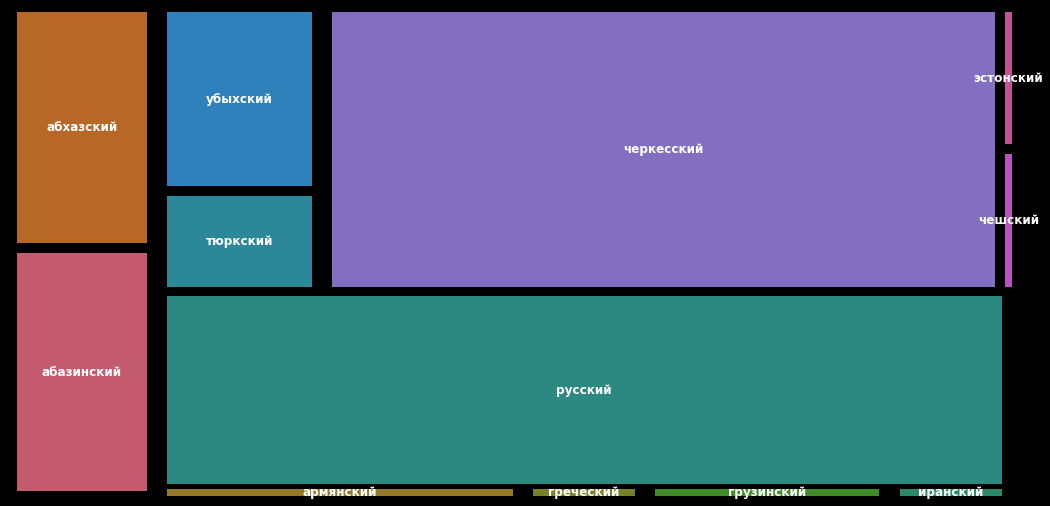

In [31]:
#построим таблицу распределения официальных топонимов по побережью Краснодарского края
plt.figure(figsize=(18, 9))
squarify.plot(
    sizes=df_count_avg["origin"],
    label=df_count_avg["index"],
    alpha=0.8,
    color=sns.color_palette("husl", 12),
    pad=True,
    text_kwargs={"fontsize": 12, "weight": "bold"},
)
plt.axis("off")
plt.show()

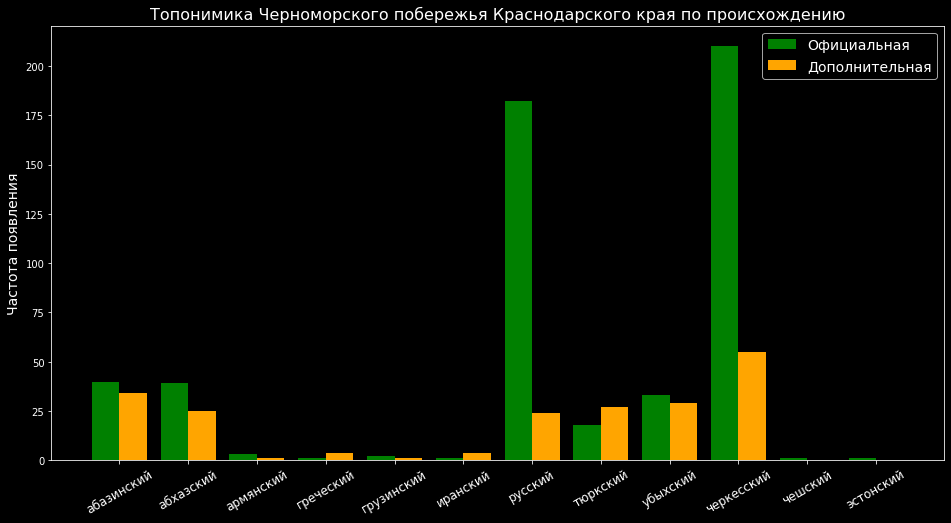

In [32]:
#создадим таблицу данных для построения графика распределения топонимики
dataALL = df_count_avg["index"]
originALL = df_count_avg["origin"]
origin2ALL = df_count_avg["origin2"]
X_axisALL = np.arange(len(dataALL))

#построим график распределения официальных и дополнительных топонимических имён по Черноморскому побероежью Краснодарского края
f, ax = plt.subplots(figsize=(16, 8))
plt.subplot(1, 1, 1)
plt.bar(X_axisALL - 0.2, originALL, 0.4, label="Официальная", color="green")
plt.bar(X_axisALL + 0.2, origin2ALL, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axisALL, dataALL, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title(
    "Топонимика Черноморского побережья Краснодарского края по происхождению",
    fontsize=16,
)
plt.legend(fontsize=14)

plt.show()

In [33]:
#сформируем данные с подсчетом единиц топонических объектов по району Большого Сочи
count_sochi = df.loc[df["territory"] == "Сочи", ["territory", "origin", "origin2"]]
df_count_avg_sochi = count_sochi[["origin", "origin2"]].apply(pd.Series.value_counts)
df_count_avg_sochi.reset_index(inplace=True)
df_count_avg_sochi.fillna(0)

#сформируем данные с подсчетом единиц топонических объектов по Центральному мкр Большого Сочи
count_sochi_center = df.loc[df["sub_territory"] == "Центральный", ["sub_territory", "origin", "origin2"]]
df_count_avg_sochi_center = count_sochi_center[["origin", "origin2"]].apply(pd.Series.value_counts)
df_count_avg_sochi_center.reset_index(inplace=True)
df_count_avg_sochi_center.fillna(0)

#сформируем данные с подсчетом единиц топонических объектов по Хостинскому мкр Большого Сочи
count_sochi_khosta = df.loc[df["sub_territory"] == "Хостинский", ["sub_territory", "origin", "origin2"]]
df_count_avg_sochi_khosta = count_sochi_khosta[["origin", "origin2"]].apply(pd.Series.value_counts)
df_count_avg_sochi_khosta.reset_index(inplace=True)
df_count_avg_sochi_khosta.fillna(0)

#сформируем данные с подсчетом единиц топонических объектов по Лазаревскому мкр Большого Сочи
count_sochi_lazarev = df.loc[df["sub_territory"] == "Лазаревский", ["sub_territory", "origin", "origin2"]]
df_count_avg_sochi_lazarev = count_sochi_lazarev[["origin", "origin2"]].apply(pd.Series.value_counts)
df_count_avg_sochi_lazarev.reset_index(inplace=True)
df_count_avg_sochi_lazarev.fillna(0)

#сформируем данные с подсчетом единиц топонических объектов по Адлерскому мкр Большого Сочи
count_sochi_adler = df.loc[df["sub_territory"] == "Адлерский",["sub_territory", "origin", "origin2"]]
df_count_avg_sochi_adler = count_sochi_adler[["origin", "origin2"]].apply(pd.Series.value_counts)
df_count_avg_sochi_adler.reset_index(inplace=True)
df_count_avg_sochi_adler.fillna(0)

#сформируем данные с подсчетом единиц топонических объектов по Туапсинскому району Краснодарского края
count_tuapse = df.loc[df["territory"] == "Туапсе", ["territory", "origin", "origin2"]]
df_count_avg_tuapse = count_tuapse[["origin", "origin2"]].apply(pd.Series.value_counts)
df_count_avg_tuapse.reset_index(inplace=True)
df_count_avg_tuapse.fillna(0)

#сформируем данные с подсчетом единиц топонических объектов по Геленджикскому району Краснодарского края
count_gelenjik = df.loc[df["territory"] == "Геленджик", ["territory", "origin", "origin2"]]
df_count_avg_gelenjik = count_gelenjik[["origin", "origin2"]].apply(pd.Series.value_counts)
df_count_avg_gelenjik.reset_index(inplace=True)
df_count_avg_gelenjik.fillna(0)

#сформируем данные с подсчетом единиц топонических объектов по Новороссийскому району Краснодарского края
count_novoross = df.loc[df["territory"] == "Новороссийск", ["territory", "origin", "origin2"]]
df_count_avg_novoross = count_novoross[["origin", "origin2"]].apply(pd.Series.value_counts)
df_count_avg_novoross.reset_index(inplace=True)
df_count_avg_novoross.fillna(0)

#сформируем данные с подсчетом единиц топонических объектов по Анапскому району Краснодарского края
count_anapa = df.loc[df["territory"] == "Анапа", ["territory", "origin", "origin2"]]
df_count_avg_anapa = count_anapa[["origin", "origin2"]].apply(pd.Series.value_counts)
df_count_avg_anapa.reset_index(inplace=True)
df_count_avg_anapa.fillna(0)

#сформируем данные с подсчетом единиц топонических объектов по приграничным районам Абхазии
count_abkhaz = df.loc[df["territory"] == "Абхазия", ["territory", "origin", "origin2"]]
df_count_avg_abkhaz = count_abkhaz[["origin", "origin2"]].apply(pd.Series.value_counts)
df_count_avg_abkhaz.reset_index(inplace=True)
df_count_avg_abkhaz.fillna(0)

,index,origin,origin2
0,абазинский,5,3.0
1,абхазский,22,10.0
2,греческий,1,0.0
3,грузинский,2,0.0
4,иранский,1,1.0
5,русский,3,3.0
6,тюркский,1,1.0
7,убыхский,2,2.0
8,черкесский,7,4.0


In [34]:
#Сформируем данные для построения графиков распределение топонимики по районам Черноморского побережья Краснодарского края
dataS = df_count_avg_sochi["index"]
originS = df_count_avg_sochi["origin"]
origin2S = df_count_avg_sochi["origin2"]

dataT = df_count_avg_tuapse["index"]
originT = df_count_avg_tuapse["origin"]
origin2T = df_count_avg_tuapse["origin2"]

dataG = df_count_avg_gelenjik["index"]
originG = df_count_avg_gelenjik["origin"]
origin2G = df_count_avg_gelenjik["origin2"]

dataN = df_count_avg_novoross["index"]
originN = df_count_avg_novoross["origin"]
origin2N = df_count_avg_novoross["origin2"]

dataA = df_count_avg_anapa["index"]
originA = df_count_avg_anapa["origin"]
origin2A = df_count_avg_anapa["origin2"]

dataSC = df_count_avg_sochi_center["index"]
originSC = df_count_avg_sochi_center["origin"]
origin2SC = df_count_avg_sochi_center["origin2"]

dataSKh = df_count_avg_sochi_khosta["index"]
originSKh = df_count_avg_sochi_khosta["origin"]
origin2SKh = df_count_avg_sochi_khosta["origin2"]

dataSA = df_count_avg_sochi_adler["index"]
originSA = df_count_avg_sochi_adler["origin"]
origin2SA = df_count_avg_sochi_adler["origin2"]

dataSL = df_count_avg_sochi_lazarev["index"]
originSL = df_count_avg_sochi_lazarev["origin"]
origin2SL = df_count_avg_sochi_lazarev["origin2"]

dataAb = df_count_avg_abkhaz["index"]
originAb = df_count_avg_abkhaz["origin"]
origin2Ab = df_count_avg_abkhaz["origin2"]

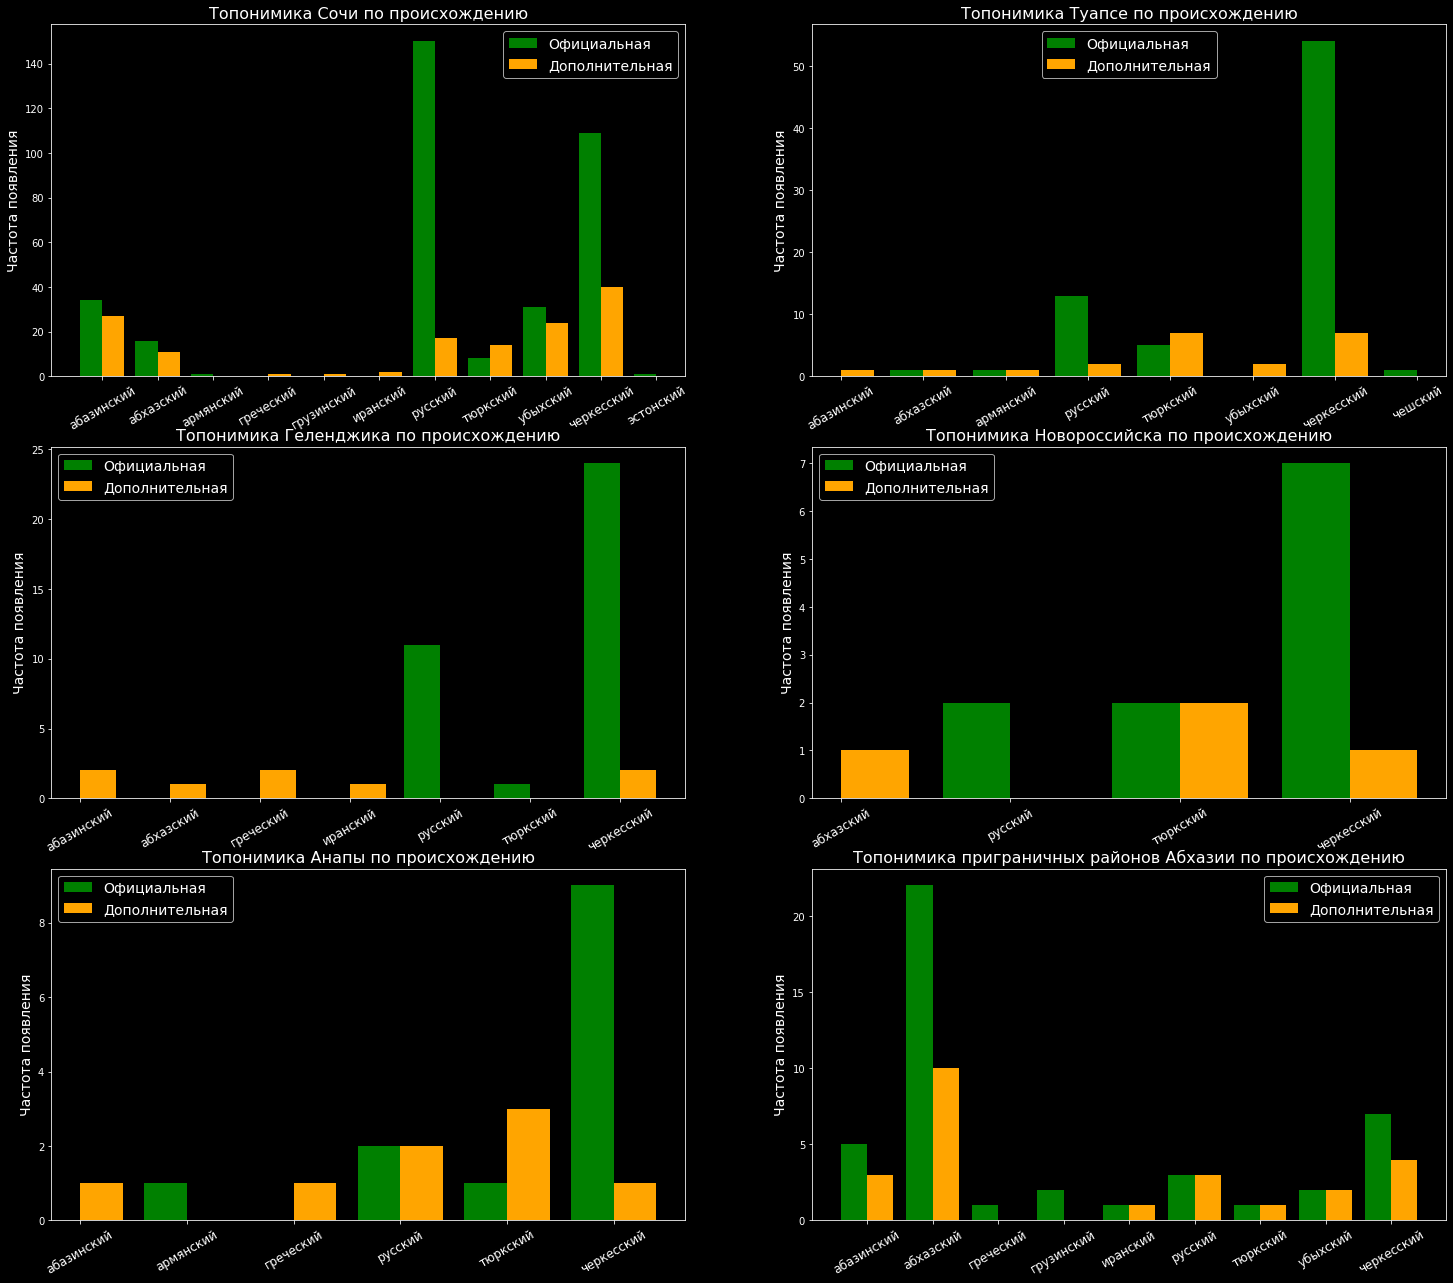

In [35]:
#построим группу графиков распределения происхождения топонимики
#по районам Черноморского побережья Краснодарского края и приграничной Абхазии

f, ax = plt.subplots(figsize=(25, 22))
X_axisS = np.arange(len(dataS))
X_axisT = np.arange(len(dataT))
X_axisG = np.arange(len(dataG))
X_axisN = np.arange(len(dataN))
X_axisA = np.arange(len(dataA))
X_axisAb = np.arange(len(dataAb))

plt.subplot(3, 2, 1)
plt.bar(X_axisS - 0.2, originS, 0.4, label="Официальная", color="green")
plt.bar(X_axisS + 0.2, origin2S, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axisS, dataS, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Топонимика Сочи по происхождению", fontsize=16)
plt.legend(fontsize=14)

plt.subplot(3, 2, 2)
plt.bar(X_axisT - 0.2, originT, 0.4, label="Официальная", color="green")
plt.bar(X_axisT + 0.2, origin2T, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axisT, dataT, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Топонимика Туапсе по происхождению", fontsize=16)
plt.legend(fontsize=14)

plt.subplot(3, 2, 3)
plt.bar(X_axisG - 0.2, originG, 0.4, label="Официальная", color="green")
plt.bar(X_axisG + 0.2, origin2G, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axisG, dataG, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Топонимика Геленджика по происхождению", fontsize=16)
plt.legend(fontsize=14, loc="upper left")

plt.subplot(3, 2, 4)
plt.bar(X_axisN - 0.2, originN, 0.4, label="Официальная", color="green")
plt.bar(X_axisN + 0.2, origin2N, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axisN, dataN, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Топонимика Новороссийска по происхождению", fontsize=16)
plt.legend(fontsize=14, loc="upper left")

plt.subplot(3, 2, 5)
plt.bar(X_axisA - 0.2, originA, 0.4, label="Официальная", color="green")
plt.bar(X_axisA + 0.2, origin2A, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axisA, dataA, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Топонимика Анапы по происхождению", fontsize=16)
plt.legend(fontsize=14, loc="upper left")

plt.subplot(3, 2, 6)
plt.bar(X_axisAb - 0.2, originAb, 0.4, label="Официальная", color="green")
plt.bar(X_axisAb + 0.2, origin2Ab, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axisAb, dataAb, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Топонимика приграничных районов Абхазии по происхождению", fontsize=16)
plt.legend(fontsize=14)

plt.show()

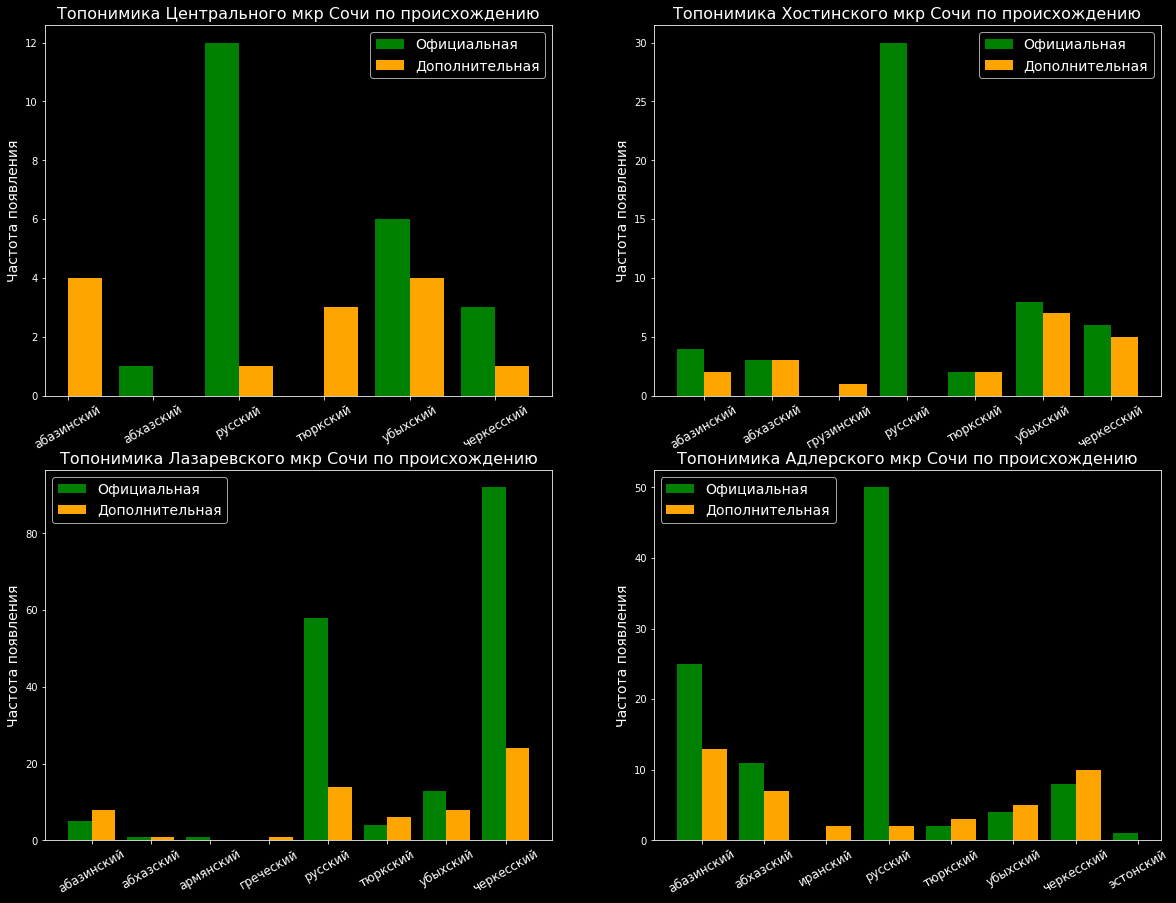

In [36]:
#построим группу графиков распределения происхождения топонимики по микрорайонам Большого Сочи

f, ax = plt.subplots(figsize=(20, 15))
X_axisSC = np.arange(len(dataSC))
X_axisSKh = np.arange(len(dataSKh))
X_axisSL = np.arange(len(dataSL))
X_axisSA = np.arange(len(dataSA))

plt.subplot(2, 2, 1)
plt.bar(X_axisSC - 0.2, originSC, 0.4, label="Официальная", color="green")
plt.bar(X_axisSC + 0.2, origin2SC, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axisSC, dataSC, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Топонимика Центрального мкр Сочи по происхождению", fontsize=16)
plt.legend(fontsize=14)

plt.subplot(2, 2, 2)
plt.bar(X_axisSKh - 0.2, originSKh, 0.4, label="Официальная", color="green")
plt.bar(X_axisSKh + 0.2, origin2SKh, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axisSKh, dataSKh, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Топонимика Хостинского мкр Сочи по происхождению", fontsize=16)
plt.legend(fontsize=14)

plt.subplot(2, 2, 3)
plt.bar(X_axisSL - 0.2, originSL, 0.4, label="Официальная", color="green")
plt.bar(X_axisSL + 0.2, origin2SL, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axisSL, dataSL, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Топонимика Лазаревского мкр Сочи по происхождению", fontsize=16)
plt.legend(fontsize=14, loc="upper left")

plt.subplot(2, 2, 4)
plt.bar(X_axisSA - 0.2, originSA, 0.4, label="Официальная", color="green")
plt.bar(X_axisSA + 0.2, origin2SA, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axisSA, dataSA, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Топонимика Адлерского мкр Сочи по происхождению", fontsize=16)
plt.legend(fontsize=14, loc="upper left")

plt.show()

### Предварительные выводы по распределению топонимики:

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
- В `Большом Сочи` лидер топонимики - русские названия - 150 из 350. По второстепенным значениям лидируют черкесские названия - 40 из 137: 
    - Внутри Сочи, `Лазаревский район` лидер по черкесской топонимике и вообще по количеству топонимики в базе данных. **Причина - тут расположено большинство черкесских аулов сегодня.** 92 из 174 названий в официальной базе и 24 из 92 в дополнительной; 
    - `Адлерский, Хостинский и Центральный микрорайоны Сочи` преимущественно русская топонимика. В дополнительных версиях сохранились убыхские названия в `Хостинском мкр`(7 из 20) и абазинские в `Центральном мкр` (4 из 13) и `Адлерском мкр` (13 из 42). **Это логично, поскольку ядро бывшей Убыхии расположено в горах и предгорьях `Хостинского мкр`, а абазинские селения встречались больше вдоль Мзымты и по берегу моря до центра Сочи;**
    - По разнообразию языковых названий убывание по Большому Сочи идёт в порядке `Лазаревский-Хостинский-Центральный мкр`.
    
    
- В `Туапсинском районе` лидер топонимики - черкесские названия - 54 из 75. В дополнительных значениях в лидерах тюркские названия - 7 из 21. **Тут также, как в `Лазаревском мкр Сочи`, расположены черкесские аулы. Интересно, что такая же ситуация в `Анапском районе` (9 из 13 черкесские и 3 из 8 тюркские) и `Новороссийском районе` (7 из 11 черкесские и 2 из 4 тюркские), где местная топонимика оказалась весьма устойчива к переменам. Тюркские названия в обоих случаях отражают бурное турецкое прошлое этих районов;**
- По прилегающим к Сочи районам `Абхазии` лидерство в обоих случаях у абхазской топонимики;
- По `Геленджикому району` лидер топонимики черкесские названия - 24 из 36, и 2 из 8 в дополнительных значениях. **Это интересно, местная топонимика также, как в `Анапе`, оказалась устойчива к переменам.**
 
</div>

**Проверим наличие корелляции между официальными и дополнительными значениями топонимики:**

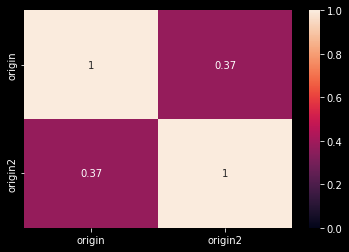

In [37]:
#Проверим корреляцию между официальными и второстепенными версиями происхождения топонимики
sns.heatmap(df_count_avg_sochi.corr(), annot=True, vmax=1, vmin=0)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
**Вывод по корелляции:**
    
**- Как таковой, корелляции не видно, он случайна. Где-то высокая, где-то наоборот.**
 
</div>

## 3. Распределение топонимики по природному и жилому происхождению:

**Попробуем посчитать распределение топонимики по Черноморскому побережью Краснодарского края с точки зрения происхождения и типа - природного или жилого (поселения, города, посты, аулы и т.д.):**

In [38]:
df["type"].value_counts()

река             165
село             129
гора              70
урочище           44
хребет            28
аул               27
озеро             12
ручей             10
скалы              8
мыс                7
город              6
перевал            5
балка              4
пост               3
ущелье             2
долина             2
хутор              2
утёс               1
водохранилище      1
место              1
пещера             1
бухта              1
ледник             1
родник             1
Name: type, dtype: int64

In [39]:
df["add_type"].value_counts()

село       23
река       13
урочище    11
гора        8
аул         8
хребет      5
мыс         5
руины       3
перевал     2
озеро       2
ручей       2
район       1
долина      1
водопад     1
бухта       1
Name: add_type, dtype: int64

In [40]:
#создадим срез данных по типам топонимического объекта (основного и дополнительного) только для природных объектов
f_nature = df[~df[['type', 'add_type']].isin(["село", "аул", "город", "пост", "хутор", "место", 'руины', 'район']).any(axis=1)]

In [41]:
#создадим базу данных топонимики по происхождению со срезом по природным объектам
f_nature_count_avg = f_nature[["origin", "origin2"]].apply(pd.Series.value_counts)
f_nature_count_avg = f_nature_count_avg.fillna(0).astype("int")
f_nature_count_avg.reset_index(inplace=True)
f_nature_count_avg

,index,origin,origin2
0,абазинский,24,18
1,абхазский,33,15
2,армянский,1,0
3,греческий,0,1
4,грузинский,0,1
5,иранский,0,4
6,русский,75,12
7,тюркский,10,13
8,убыхский,21,17
9,черкесский,169,32


In [42]:
#создадим срез данных по типам топонимического объекта (основного и дополнительного) только для жилых объектов
f_art = df[df[["type", "add_type"]].isin(["село", "аул", "город", "пост", "хутор", "место", "руины", "район"]).any(axis=1)]
f_artificial = f_art[~f_art[["type", "add_type"]].isin(["урочище", "мыс", "балка", "хребет", "бухта", "река", "перевал", "водопад", "гора", "ручей"]).any(axis=1)]

In [43]:
#создадим базу данных топонимики по происхождению со срезом по природным объектам
f_artificial_count_avg = f_artificial[["origin", "origin2"]].apply(pd.Series.value_counts)
f_artificial_count_avg = f_artificial_count_avg.fillna(0).astype("int")
f_artificial_count_avg.reset_index(inplace=True)
f_artificial_count_avg

,index,origin,origin2
0,абазинский,7,12
1,абхазский,5,5
2,армянский,2,1
3,греческий,0,2
4,грузинский,2,0
5,иранский,1,0
6,русский,97,6
7,тюркский,4,9
8,убыхский,4,10
9,черкесский,17,16


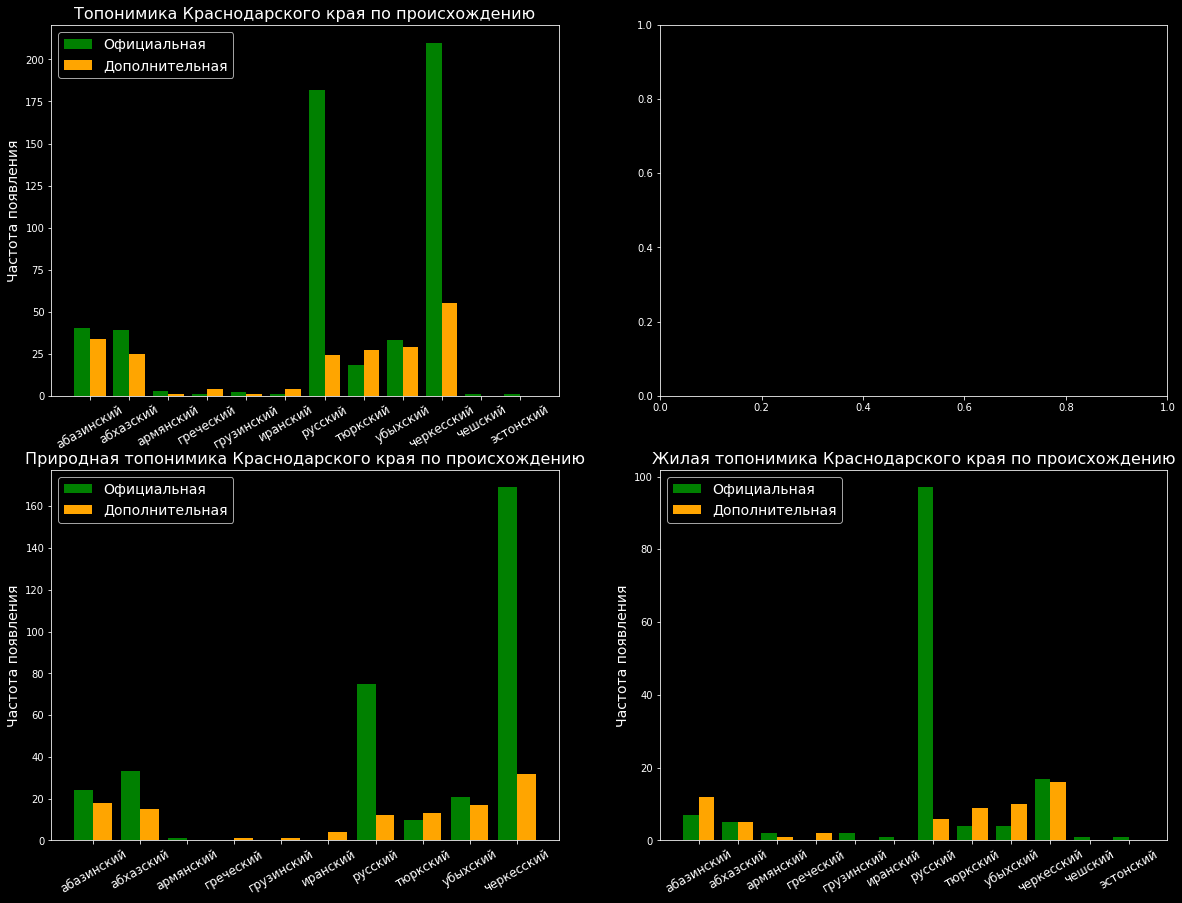

In [44]:
#построим графики распространения топонимики Черноморского побережья Краснодарского края по происхождению 
#и типу топонимического объекта

#подготовим базы данных по необходимым срезам и для сравнения добавим общую таблицу распространения топонимики
#общая база
f, ax = plt.subplots(figsize=(20, 15))
dataALL = df_count_avg["index"]
originALL = df_count_avg["origin"]
origin2ALL = df_count_avg["origin2"]
X_axisALL = np.arange(len(dataALL))

#срез по природным типам
dataALL_nature = f_nature_count_avg["index"]
originALL_nature = f_nature_count_avg["origin"]
origin2ALL_nature = f_nature_count_avg["origin2"]
X_axisALL_nature = np.arange(len(dataALL_nature))

#срез по жилым типам
dataALL_artificial = f_artificial_count_avg["index"]
originALL_artificial = f_artificial_count_avg["origin"]
origin2ALL_artificial = f_artificial_count_avg["origin2"]
X_axisALL_artificial = np.arange(len(dataALL_artificial))

#строим графики
plt.subplot(2, 2, 1)
plt.bar(X_axisALL - 0.2, originALL, 0.4, label="Официальная", color="green")
plt.bar(X_axisALL + 0.2, origin2ALL, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axisALL, dataALL, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Топонимика Краснодарского края по происхождению", fontsize=16)
plt.legend(fontsize=14)

#здесь для удобства картинки второй табицей справа от общей создадим пустышку
plt.subplot(2, 2, 2)

plt.subplot(2, 2, 3)
plt.bar(X_axisALL_nature - 0.2, originALL_nature, 0.4, label="Официальная", color="green")
plt.bar(X_axisALL_nature + 0.2, origin2ALL_nature, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axisALL_nature, dataALL_nature, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Природная топонимика Краснодарского края по происхождению", fontsize=16)
plt.legend(fontsize=14)

plt.subplot(2, 2, 4)
plt.bar(X_axisALL_artificial - 0.2, originALL_artificial, 0.4, label="Официальная", color="green")
plt.bar(X_axisALL_artificial + 0.2, origin2ALL_artificial, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axisALL_artificial, dataALL_artificial, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Жилая топонимика Краснодарского края по происхождению", fontsize=16)
plt.legend(fontsize=14, loc="upper left")

plt.show()

### Предварительные выводы по распределению природной и жилой топонимики по ЧП КК:

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
- Природная топонимика Черноморского побережья Краснодарского края в целом примерно также распределена, как общая топонимика;\
    **Значительно выделяется черкесская природная топонимика, которая с отрывом лидирует, по отношению к остальным видам;**
- Абазинская, убыхская и тюркская природная топонимика также в среднем чуть более представлена, чем русская;
- Жилая топонимика Черноморского побережья Краснодарского края в подавляющем большинстве русская, в мелких деталях переселенческая греческая, абхазская, грузинская, иранская;
- Языки коренных народов представлены в жилой топонимике в основном, как дополнительные названия, данные объектам местными коренными жителями на свой лад и на своем языке.
    
**По графикам заметно, что природная топонимика на побережье хорошо сохраняет автохтонные названия, связанные с языками коренных жителей региона. На неё меньше влияет процесс русификации и замещения, который более связан с процессами урбанизации. Жилая топонимика напрямую связана с переселенческими миграционными процессами.**
 
</div>

**Взглянем теперь ближе на распределение природной топонимики по каждому району Черноморского побережья и приграничью Абхазии в отдельности.**

In [45]:
#создадим срезы данных по природной топонимике для каждого района
first_natureS = df.query(
    'territory == "Сочи" & type not in ["село", "аул", "город", "пост", "хутор", "место"] & add_type not in ["село", "аул", "город", "пост", "хутор", "место"]'
)
first_natureT = df.query(
    'territory == "Туапсе" & type not in ["село", "аул", "город", "пост", "хутор", "место"] & add_type not in ["село", "аул", "город", "пост", "хутор", "место"]'
)
first_natureG = df.query(
    'territory == "Геленджик" & type not in ["село", "аул", "город", "пост", "хутор", "место"] & add_type not in ["село", "аул", "город", "пост", "хутор", "место"]'
)
first_natureN = df.query(
    'territory == "Новороссийск" & type not in ["село", "аул", "город", "пост", "хутор", "место"] & add_type not in ["село", "аул", "город", "пост", "хутор", "место"]'
)
first_natureA = df.query(
    'territory == "Анапа" & type not in ["село", "аул", "город", "пост", "хутор", "место"] & add_type not in ["село", "аул", "город", "пост", "хутор", "место"]'
)
first_natureAb = df.query(
    'territory == "Абхазия" & type not in ["село", "аул", "город", "пост", "хутор", "место"] & add_type not in ["село", "аул", "город", "пост", "хутор", "место"]'
)

In [46]:
#посчитаем значения для Большого Сочи
count_first_natureS = first_natureS.loc[first_natureS["territory"] == "Сочи", ["territory", "origin", "origin2"]]
count_avg_first_natureS = count_first_natureS[["origin", "origin2"]].apply(pd.Series.value_counts)
count_avg_first_natureS.reset_index(inplace=True)
count_avg_first_natureS.fillna(0)

#посчитаем значения для Туапсинского района
count_first_natureT = first_natureT.loc[first_natureT["territory"] == "Туапсе", ["territory", "origin", "origin2"]]
count_avg_first_natureT = count_first_natureT[["origin", "origin2"]].apply(pd.Series.value_counts)
count_avg_first_natureT.reset_index(inplace=True)
count_avg_first_natureT.fillna(0)

#посчитаем значения для Геленджикского района
count_first_natureG = first_natureG.loc[first_natureG["territory"] == "Геленджик", ["territory", "origin", "origin2"]]
count_avg_first_natureG = count_first_natureG[["origin", "origin2"]].apply(pd.Series.value_counts)
count_avg_first_natureG.reset_index(inplace=True)
count_avg_first_natureG.fillna(0)

#посчитаем значения для Новороссийского района
count_first_natureN = first_natureN.loc[first_natureN["territory"] == "Новороссийск", ["territory", "origin", "origin2"]]
count_avg_first_natureN = count_first_natureN[["origin", "origin2"]].apply(pd.Series.value_counts)
count_avg_first_natureN.reset_index(inplace=True)
count_avg_first_natureN.fillna(0)

#посчитаем значения для Анапского района
count_first_natureA = first_natureA.loc[first_natureA["territory"] == "Анапа", ["territory", "origin", "origin2"]]
count_avg_first_natureA = count_first_natureA[["origin", "origin2"]].apply(pd.Series.value_counts)
count_avg_first_natureA.reset_index(inplace=True)
count_avg_first_natureA.fillna(0)

#посчитаем значения для приграничных районов Абхазии
count_first_natureAb = first_natureAb.loc[first_natureAb["territory"] == "Абхазия", ["territory", "origin", "origin2"]]
count_avg_first_natureAb = count_first_natureAb[["origin", "origin2"]].apply(pd.Series.value_counts)
count_avg_first_natureAb.reset_index(inplace=True)
count_avg_first_natureAb.fillna(0)

,index,origin,origin2
0,абазинский,4.0,2.0
1,абхазский,19.0,5.0
2,иранский,0.0,1.0
3,русский,1.0,3.0
4,тюркский,1.0,0.0
5,убыхский,2.0,2.0
6,черкесский,6.0,3.0


In [47]:
#создадим перемерные со срезами данных для построения графиков

#Большой Сочи
data_nature_s = count_avg_first_natureS["index"]
origin_nature_s = count_avg_first_natureS["origin"]
origin2_nature_s = count_avg_first_natureS["origin2"]
X_axis_nature_s = np.arange(len(data_nature_s))

#Туапсинский район
data_nature_t = count_avg_first_natureT["index"]
origin_nature_t = count_avg_first_natureT["origin"]
origin2_nature_t = count_avg_first_natureT["origin2"]
X_axis_nature_t = np.arange(len(data_nature_t))

#Геленджикский район
data_nature_g = count_avg_first_natureG["index"]
origin_nature_g = count_avg_first_natureG["origin"]
origin2_nature_g = count_avg_first_natureG["origin2"]
X_axis_nature_g = np.arange(len(data_nature_g))

#Геленджикский район
data_nature_n = count_avg_first_natureN["index"]
origin_nature_n = count_avg_first_natureN["origin"]
origin2_nature_n = count_avg_first_natureN["origin2"]
X_axis_nature_n = np.arange(len(data_nature_n))

#Анапский район
data_nature_a = count_avg_first_natureA["index"]
origin_nature_a = count_avg_first_natureA["origin"]
origin2_nature_a = count_avg_first_natureA["origin2"]
X_axis_nature_a = np.arange(len(data_nature_a))

#приграничные районы Абхазии
data_nature_ab = count_avg_first_natureAb["index"]
origin_nature_ab = count_avg_first_natureAb["origin"]
origin2_nature_ab = count_avg_first_natureAb["origin2"]
X_axis_nature_ab = np.arange(len(data_nature_ab))

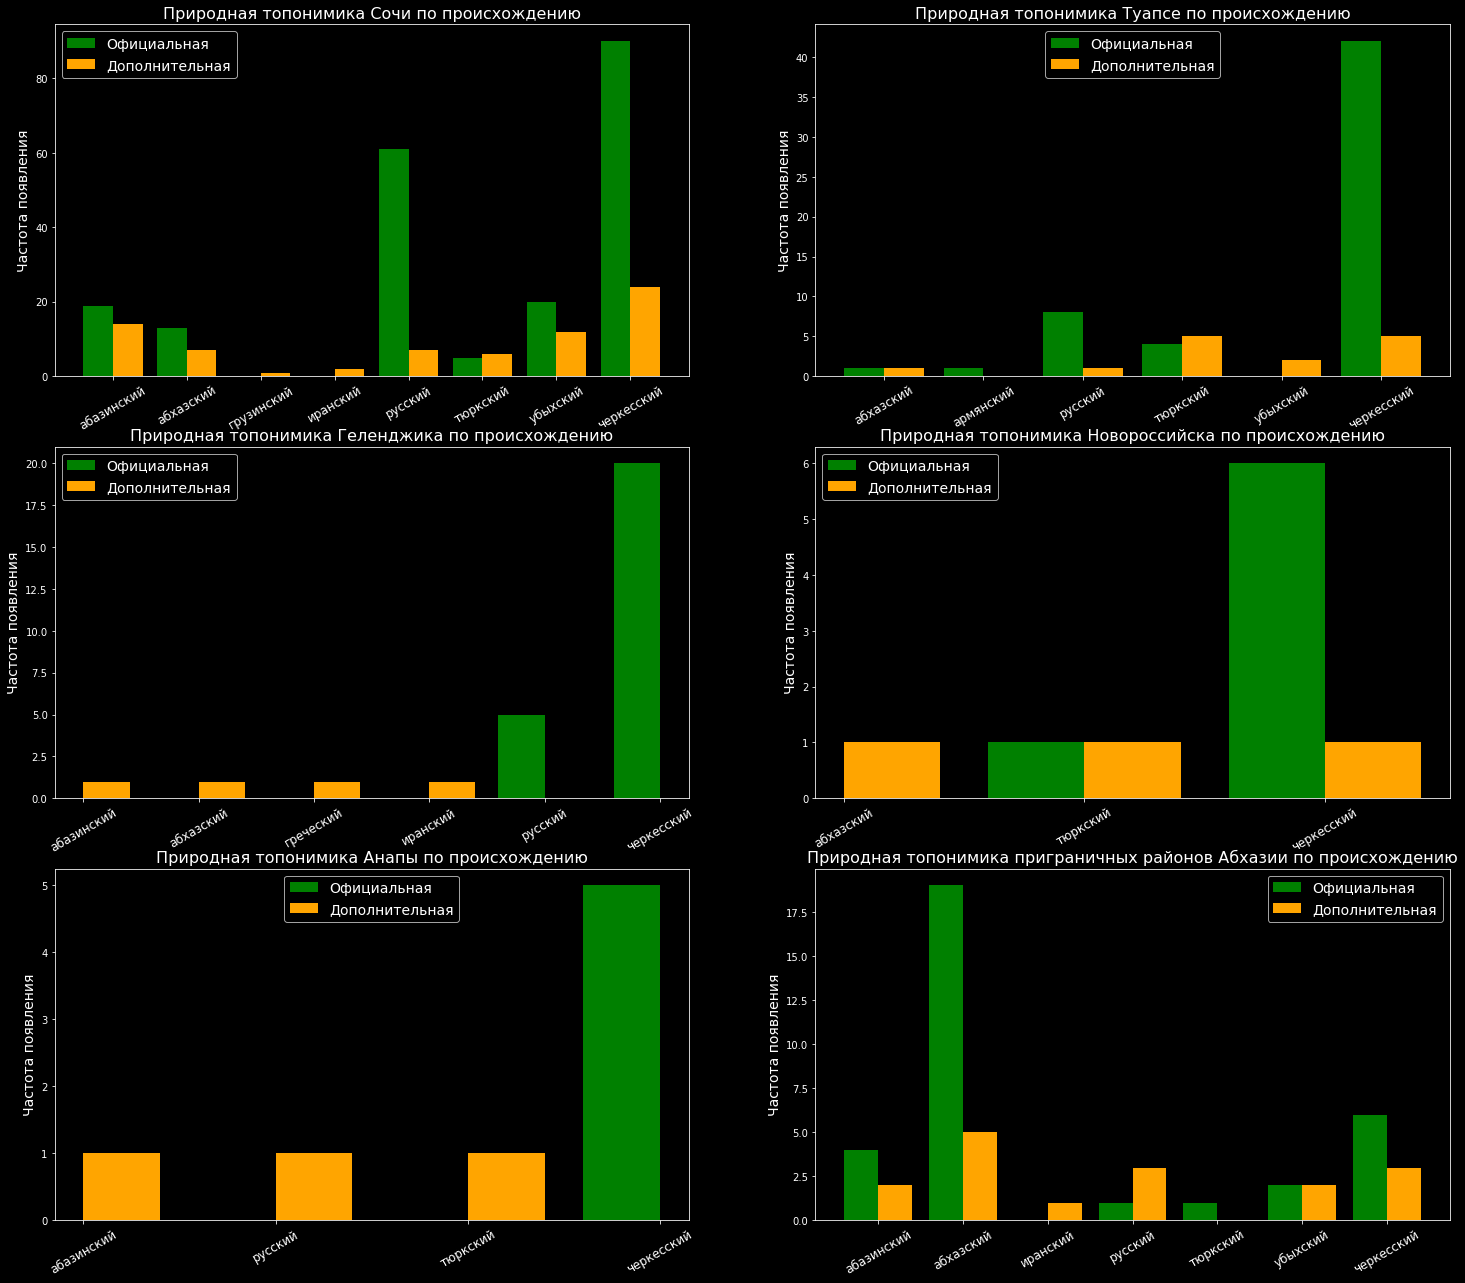

In [48]:
#построим графики распределения природной топонимики Черноморского побережья Краснодарского края по районам
f, ax = plt.subplots(figsize=(25, 22))

plt.subplot(3, 2, 1)
plt.bar(X_axis_nature_s - 0.2, origin_nature_s, 0.4, label="Официальная", color="green")
plt.bar(X_axis_nature_s + 0.2, origin2_nature_s, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_nature_s, data_nature_s, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Природная топонимика Сочи по происхождению", fontsize=16)
plt.legend(fontsize=14, loc="upper left")

plt.subplot(3, 2, 2)
plt.bar(X_axis_nature_t - 0.2, origin_nature_t, 0.4, label="Официальная", color="green")
plt.bar(X_axis_nature_t + 0.2, origin2_nature_t, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_nature_t, data_nature_t, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Природная топонимика Туапсе по происхождению", fontsize=16)
plt.legend(fontsize=14)

plt.subplot(3, 2, 3)
plt.bar(X_axis_nature_g - 0.2, origin_nature_g, 0.4, label="Официальная", color="green")
plt.bar(X_axis_nature_g + 0.2, origin2_nature_g, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_nature_g, data_nature_g, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Природная топонимика Геленджика по происхождению", fontsize=16)
plt.legend(fontsize=14, loc="upper left")

plt.subplot(3, 2, 4)
plt.bar(X_axis_nature_n - 0.2, origin_nature_n, 0.4, label="Официальная", color="green")
plt.bar(X_axis_nature_n + 0.2, origin2_nature_n, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_nature_n, data_nature_n, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Природная топонимика Новороссийска по происхождению", fontsize=16)
plt.legend(fontsize=14, loc="upper left")

plt.subplot(3, 2, 5)
plt.bar(X_axis_nature_a - 0.2, origin_nature_a, 0.4, label="Официальная", color="green")
plt.bar(X_axis_nature_a + 0.2, origin2_nature_a, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_nature_a, data_nature_a, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Природная топонимика Анапы по происхождению", fontsize=16)
plt.legend(fontsize=14)

plt.subplot(3, 2, 6)
plt.bar(X_axis_nature_ab - 0.2, origin_nature_ab, 0.4, label="Официальная", color="green")
plt.bar(X_axis_nature_ab + 0.2, origin2_nature_ab, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_nature_ab, data_nature_ab, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Природная топонимика приграничных районов Абхазии по происхождению", fontsize=16)
plt.legend(fontsize=14)

plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
- Природная топонимика по районам в целом соответствует общему тренду;
- Сочинская природная топонимика наиболее похожа на общие данные в силу наибольшей выборки данных. Хотя по ней заметно, что черкесская топонимика распространена с меньшим отрывом от русской;
- В Абхазии лидирует абхазская природная топонимика, есть черкесские и абазинские варианты, остальные языки представлены дополнительными именами.
    
**Туапсинская, Геленджикская, Новороссийская и Анапская природная топонимика выделяется использованием языков коренных народов. Здесь черкесские варианты в подавляющем большинстве.**
 
</div>

**Взглянем теперь ближе на распределение природной топонимики по микрорайонам Большого Сочи в отдельности.**

In [49]:
#создадим срезы данных по природной топонимике для микрорайонов Большого Сочи
first_natureSC = df.query(
    'sub_territory == "Центральный" & type not in ["село", "аул", "город", "пост", "хутор", "место"] & add_type not in ["село", "аул", "город", "пост", "хутор", "место"]'
)
first_natureSKh = df.query(
    'sub_territory == "Хостинский" & type not in ["село", "аул", "город", "пост", "хутор", "место"] & add_type not in ["село", "аул", "город", "пост", "хутор", "место"]'
)
first_natureSA = df.query(
    'sub_territory == "Адлерский" & type not in ["село", "аул", "город", "пост", "хутор", "место"] & add_type not in ["село", "аул", "город", "пост", "хутор", "место"]'
)
first_natureSL = df.query(
    'sub_territory == "Лазаревский" & type not in ["село", "аул", "город", "пост", "хутор", "место"] & add_type not in ["село", "аул", "город", "пост", "хутор", "место"]'
)

In [50]:
#посчитаем значения для Центрального района Большого Сочи
count_first_natureSC = first_natureSC.loc[first_natureSC["sub_territory"] == "Центральный", ["sub_territory", "origin", "origin2"]]
count_avg_first_natureSC = count_first_natureSC[["origin", "origin2"]].apply(pd.Series.value_counts)
count_avg_first_natureSC.reset_index(inplace=True)
count_avg_first_natureSC.fillna(0)

#посчитаем значения для Хостинского района Большого Сочи
count_first_natureSKh = first_natureSKh.loc[first_natureSKh["sub_territory"] == "Хостинский", ["sub_territory", "origin", "origin2"]]
count_avg_first_natureSKh = count_first_natureSKh[["origin", "origin2"]].apply(pd.Series.value_counts)
count_avg_first_natureSKh.reset_index(inplace=True)
count_avg_first_natureSKh.fillna(0)

#посчитаем значения для Адлерского района Большого Сочи
count_first_natureSA = first_natureSA.loc[first_natureSA["sub_territory"] == "Адлерский", ["sub_territory", "origin", "origin2"]]
count_avg_first_natureSA = count_first_natureSA[["origin", "origin2"]].apply(pd.Series.value_counts)
count_avg_first_natureSA.reset_index(inplace=True)
count_avg_first_natureSA.fillna(0)

#посчитаем значения для Лазаревского района Большого Сочи
count_first_natureSL = first_natureSL.loc[first_natureSL["sub_territory"] == "Лазаревский", ["sub_territory", "origin", "origin2"]]
count_avg_first_natureSL = count_first_natureSL[["origin", "origin2"]].apply(pd.Series.value_counts)
count_avg_first_natureSL.reset_index(inplace=True)
count_avg_first_natureSL.fillna(0)

,index,origin,origin2
0,черкесский,77,12
1,русский,19,5
2,убыхский,7,3
3,тюркский,3,3
4,абазинский,2,2
5,абхазский,1,1


In [51]:
#создадим перемерные со срезами данных для построения графиков

#Центральный микрорайон
data_nature_sc = count_avg_first_natureSC["index"]
origin_nature_sc = count_avg_first_natureSC["origin"]
origin2_nature_sc = count_avg_first_natureSC["origin2"]
X_axis_nature_sc = np.arange(len(data_nature_sc))

#Хостинский микрорайон
data_nature_skh = count_avg_first_natureSKh["index"]
origin_nature_skh = count_avg_first_natureSKh["origin"]
origin2_nature_skh = count_avg_first_natureSKh["origin2"]
X_axis_nature_skh = np.arange(len(data_nature_skh))

#Адлерский микрорайон
data_nature_sa = count_avg_first_natureSA["index"]
origin_nature_sa = count_avg_first_natureSA["origin"]
origin2_nature_sa = count_avg_first_natureSA["origin2"]
X_axis_nature_sa = np.arange(len(data_nature_sa))

#Лазаревский микрорайон
data_nature_sl = count_avg_first_natureSL["index"]
origin_nature_sl = count_avg_first_natureSL["origin"]
origin2_nature_sl = count_avg_first_natureSL["origin2"]
X_axis_nature_sl = np.arange(len(data_nature_sl))

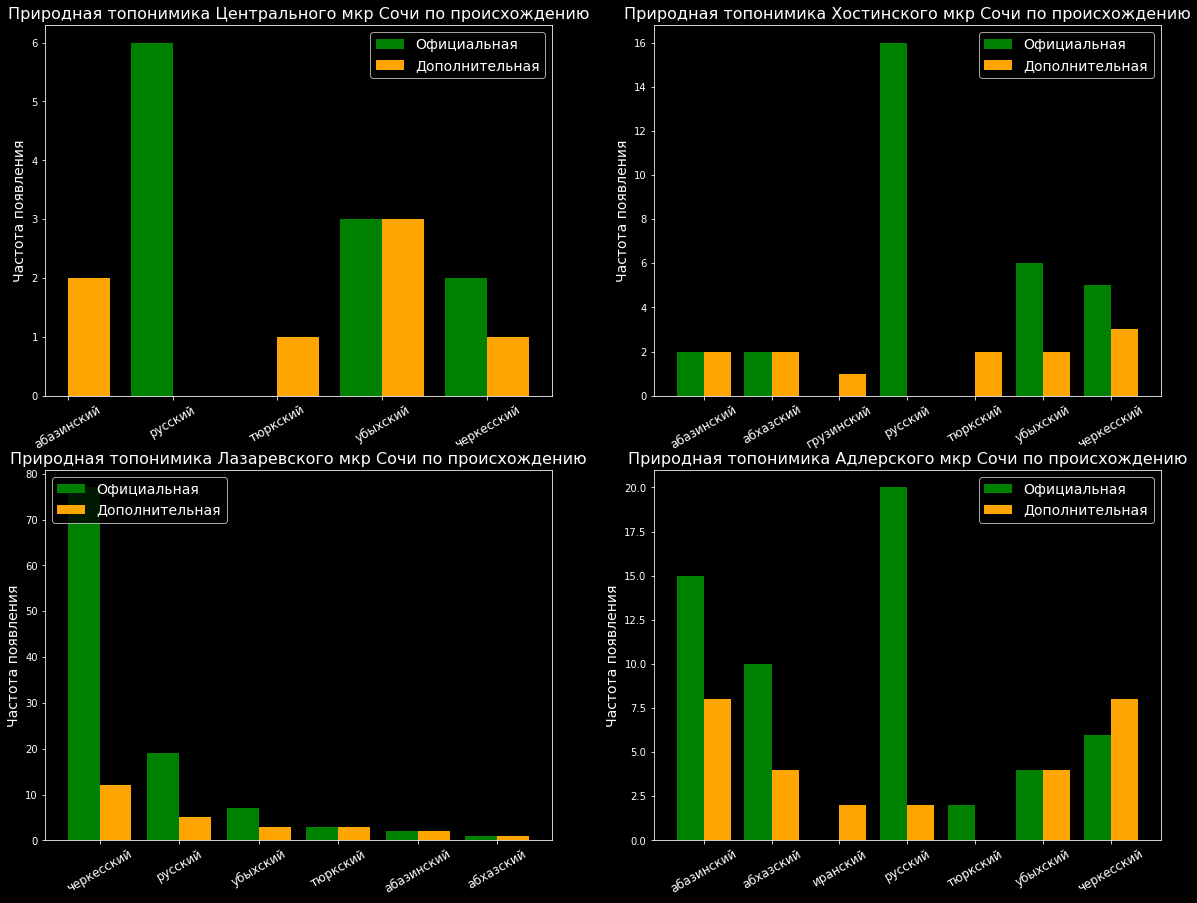

In [52]:
#построим графики распределения природной топонимики Большого Сочи по микрорайонам
f, ax = plt.subplots(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.bar(X_axis_nature_sc - 0.2, origin_nature_sc, 0.4, label="Официальная", color="green")
plt.bar(X_axis_nature_sc + 0.2, origin2_nature_sc, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_nature_sc, data_nature_sc, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Природная топонимика Центрального мкр Сочи по происхождению", fontsize=16)
plt.legend(fontsize=14)

plt.subplot(2, 2, 2)
plt.bar(X_axis_nature_skh - 0.2, origin_nature_skh, 0.4, label="Официальная", color="green")
plt.bar(X_axis_nature_skh + 0.2, origin2_nature_skh, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_nature_skh, data_nature_skh, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Природная топонимика Хостинского мкр Сочи по происхождению", fontsize=16)
plt.legend(fontsize=14)

plt.subplot(2, 2, 3)
plt.bar(X_axis_nature_sl - 0.2, origin_nature_sl, 0.4, label="Официальная", color="green")
plt.bar(X_axis_nature_sl + 0.2, origin2_nature_sl, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_nature_sl, data_nature_sl, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Природная топонимика Лазаревского мкр Сочи по происхождению", fontsize=16)
plt.legend(fontsize=14, loc="upper left")

plt.subplot(2, 2, 4)
plt.bar(X_axis_nature_sa - 0.2, origin_nature_sa, 0.4, label="Официальная", color="green")
plt.bar(X_axis_nature_sa + 0.2, origin2_nature_sa, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_nature_sa, data_nature_sa, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Природная топонимика Адлерского мкр Сочи по происхождению", fontsize=16)
plt.legend(fontsize=14, loc="upper right")

plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
- Природная топонимика по микрорайонам не соответствует общей по региону и по району;
- В других микрорайонах лидирует русская топонимика, а автохтонная значительно меньше, и более дополнительного характера, убыхская и черкесская. Убыхской больше в центре;
- Исключение составляет Адлерский микрорайон, где значительно выделяется абхазские и и абазинские природные топонимы.
    
**Лидирует по микрорайонам русская топонимика. Но выбивающаяся на общих графиках района черкесская топонимика по Большому Сочи лидирует за счёт Лазаревского микрорайона, где в целом выборка топонимики намного более представительная. Убыхская топонимика и абазинская неплохо представлена Центральным и Хостинским районами.**
 
</div>

**Взглянем на распределение жилой топонимики по районам Черноморского побережья Краснодарского края в отдельности.**

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
**По какой-то причине срез через query у меня не сработал для выборки по жилой топонимике. Буду благодарен за подсказку!**
    
</div>

In [53]:
#создадим срезы данных по жилой топонимике для районов Черноморского побережья Краснодарского края
df_sochi = df.loc[df["territory"] == "Сочи", ["territory", "type", "add_type", "origin", "origin2"]]
f_artS = df_sochi[df_sochi[["type", "add_type"]].isin(["село", "аул", "город", "пост", "хутор", "место", "руины", "район"]).any(axis=1)]
first_artificialS = f_artS[~f_artS[["type", "add_type"]].isin(["урочище", "мыс", "балка", "хребет", "бухта", "река", "перевал", "водопад", "гора", "ручей"]).any(axis=1)]

df_tuapse = df.loc[df["territory"] == "Туапсе", ["territory", "type", "add_type", "origin", "origin2"]]
f_artT = df_tuapse[df_tuapse[["type", "add_type"]].isin(["село", "аул", "город", "пост", "хутор", "место", "руины", "район"]).any(axis=1)]
first_artificialT = f_artT[~f_artT[["type", "add_type"]].isin(["урочище", "мыс", "балка", "хребет", "бухта", "река", "перевал", "водопад", "гора", "ручей"]).any(axis=1)]

df_gelenjik = df.loc[df["territory"] == "Геленджик", ["territory", "type", "add_type", "origin", "origin2"]]
f_artG = df_gelenjik[df_gelenjik[["type", "add_type"]].isin(["село", "аул", "город", "пост", "хутор", "место", "руины", "район"]).any(axis=1)]
first_artificialG = f_artG[~f_artG[["type", "add_type"]].isin(["урочище", "мыс", "балка", "хребет", "бухта", "река", "перевал", "водопад", "гора", "ручей"]).any(axis=1)]

df_novoross = df.loc[df["territory"] == "Новороссийск", ["territory", "type", "add_type", "origin", "origin2"]]
f_artN = df_novoross[df_novoross[["type", "add_type"]].isin(["село", "аул", "город", "пост", "хутор", "место", "руины", "район"]).any(axis=1)]
first_artificialN = f_artN[~f_artN[["type", "add_type"]].isin(["урочище", "мыс", "балка", "хребет", "бухта", "река", "перевал", "водопад", "гора", "ручей"]).any(axis=1)]

df_anapa = df.loc[df["territory"] == "Анапа", ["territory", "type", "add_type", "origin", "origin2"]]
f_artA = df_anapa[df_anapa[["type", "add_type"]].isin(["село", "аул", "город", "пост", "хутор", "место", "руины", "район"]).any(axis=1)]
first_artificialA = f_artA[~f_artA[["type", "add_type"]].isin(["урочище", "мыс", "балка", "хребет", "бухта", "река", "перевал", "водопад", "гора", "ручей"]).any(axis=1)]

df_abkhaz = df.loc[df["territory"] == "Абхазия", ["territory", "type", "add_type", "origin", "origin2"]]
f_artAb = df_abkhaz[df_abkhaz[["type", "add_type"]].isin(["село", "аул", "город", "пост", "хутор", "место", "руины", "район"]).any(axis=1)]
first_artificialAb = f_artAb[~f_artAb[["type", "add_type"]].isin(["урочище", "мыс", "балка", "хребет", "бухта", "река", "перевал", "водопад", "гора", "ручей"]).any(axis=1)]


In [54]:
#посчитаем значения для Большого Сочи
count_first_artificialS = first_artificialS.loc[first_artificialS["territory"] == "Сочи", ["territory", "origin", "origin2"]]
count_avg_first_artificialS = count_first_artificialS[["origin", "origin2"]].apply(pd.Series.value_counts)
count_avg_first_artificialS.reset_index(inplace=True)
count_avg_first_artificialS.fillna(0)

#посчитаем значения для Туапсинского района
count_first_artificialT = first_artificialT.loc[first_artificialT["territory"] == "Туапсе", ["territory", "origin", "origin2"]]
count_avg_first_artificialT = count_first_artificialT[["origin", "origin2"]].apply(pd.Series.value_counts)
count_avg_first_artificialT.reset_index(inplace=True)
count_avg_first_artificialT.fillna(0)

#посчитаем значения для Геленджикского района
count_first_artificialG = first_artificialG.loc[first_artificialG["territory"] == "Геленджик", ["territory", "origin", "origin2"]]
count_avg_first_artificialG = count_first_artificialG[["origin", "origin2"]].apply(pd.Series.value_counts)
count_avg_first_artificialG.reset_index(inplace=True)
count_avg_first_artificialG.fillna(0)

#посчитаем значения для Новороссийского района
count_first_artificialN = first_artificialN.loc[first_artificialN["territory"] == "Новороссийск", ["territory", "origin", "origin2"]]
count_avg_first_artificialN = count_first_artificialN[["origin", "origin2"]].apply(pd.Series.value_counts)
count_avg_first_artificialN.reset_index(inplace=True)
count_avg_first_artificialN.fillna(0)

#посчитаем значения для Анапского района
count_first_artificialA = first_artificialA.loc[first_artificialA["territory"] == "Анапа", ["territory", "origin", "origin2"]]
count_avg_first_artificialA = count_first_artificialA[["origin", "origin2"]].apply(pd.Series.value_counts)
count_avg_first_artificialA.reset_index(inplace=True)
count_avg_first_artificialA.fillna(0)

#посчитаем значения для приграничных районов Абхазии
count_first_artificialAb = first_artificialAb.loc[first_artificialAb["territory"] == "Абхазия", ["territory", "origin", "origin2"]]
count_avg_first_artificialAb = count_first_artificialAb[["origin", "origin2"]].apply(pd.Series.value_counts)
count_avg_first_artificialAb.reset_index(inplace=True)
count_avg_first_artificialAb.fillna(0)

,index,origin,origin2
0,абазинский,1.0,1.0
1,абхазский,3.0,3.0
2,грузинский,2.0,0.0
3,иранский,1.0,0.0
4,русский,2.0,0.0
5,тюркский,0.0,1.0
6,черкесский,0.0,1.0


In [55]:
#создадим перемерные со срезами данных для построения графиков

#Большой Сочи
data_artificial_s = count_avg_first_artificialS["index"]
origin_artificial_s = count_avg_first_artificialS["origin"]
origin2_artificial_s = count_avg_first_artificialS["origin2"]
X_axis_artificial_s = np.arange(len(data_artificial_s))

#Туапсинский район
data_artificial_t = count_avg_first_artificialT["index"]
origin_artificial_t = count_avg_first_artificialT["origin"]
origin2_artificial_t = count_avg_first_artificialT["origin2"]
X_axis_artificial_t = np.arange(len(data_artificial_t))

#Геленджик
data_artificial_g = count_avg_first_artificialG["index"]
origin_artificial_g = count_avg_first_artificialG["origin"]
origin2_artificial_g = count_avg_first_artificialG["origin2"]
X_axis_artificial_g = np.arange(len(data_artificial_g))

#Новороссийск
data_artificial_n = count_avg_first_artificialN["index"]
origin_artificial_n = count_avg_first_artificialN["origin"]
origin2_artificial_n = count_avg_first_artificialN["origin2"]
X_axis_artificial_n = np.arange(len(data_artificial_n))

#Анапа
data_artificial_a = count_avg_first_artificialA["index"]
origin_artificial_a = count_avg_first_artificialA["origin"]
origin2_artificial_a = count_avg_first_artificialA["origin2"]
X_axis_artificial_a = np.arange(len(data_artificial_a))

#Абхазия
data_artificial_ab = count_avg_first_artificialAb["index"]
origin_artificial_ab = count_avg_first_artificialAb["origin"]
origin2_artificial_ab = count_avg_first_artificialAb["origin2"]
X_axis_artificial_ab = np.arange(len(data_artificial_ab))

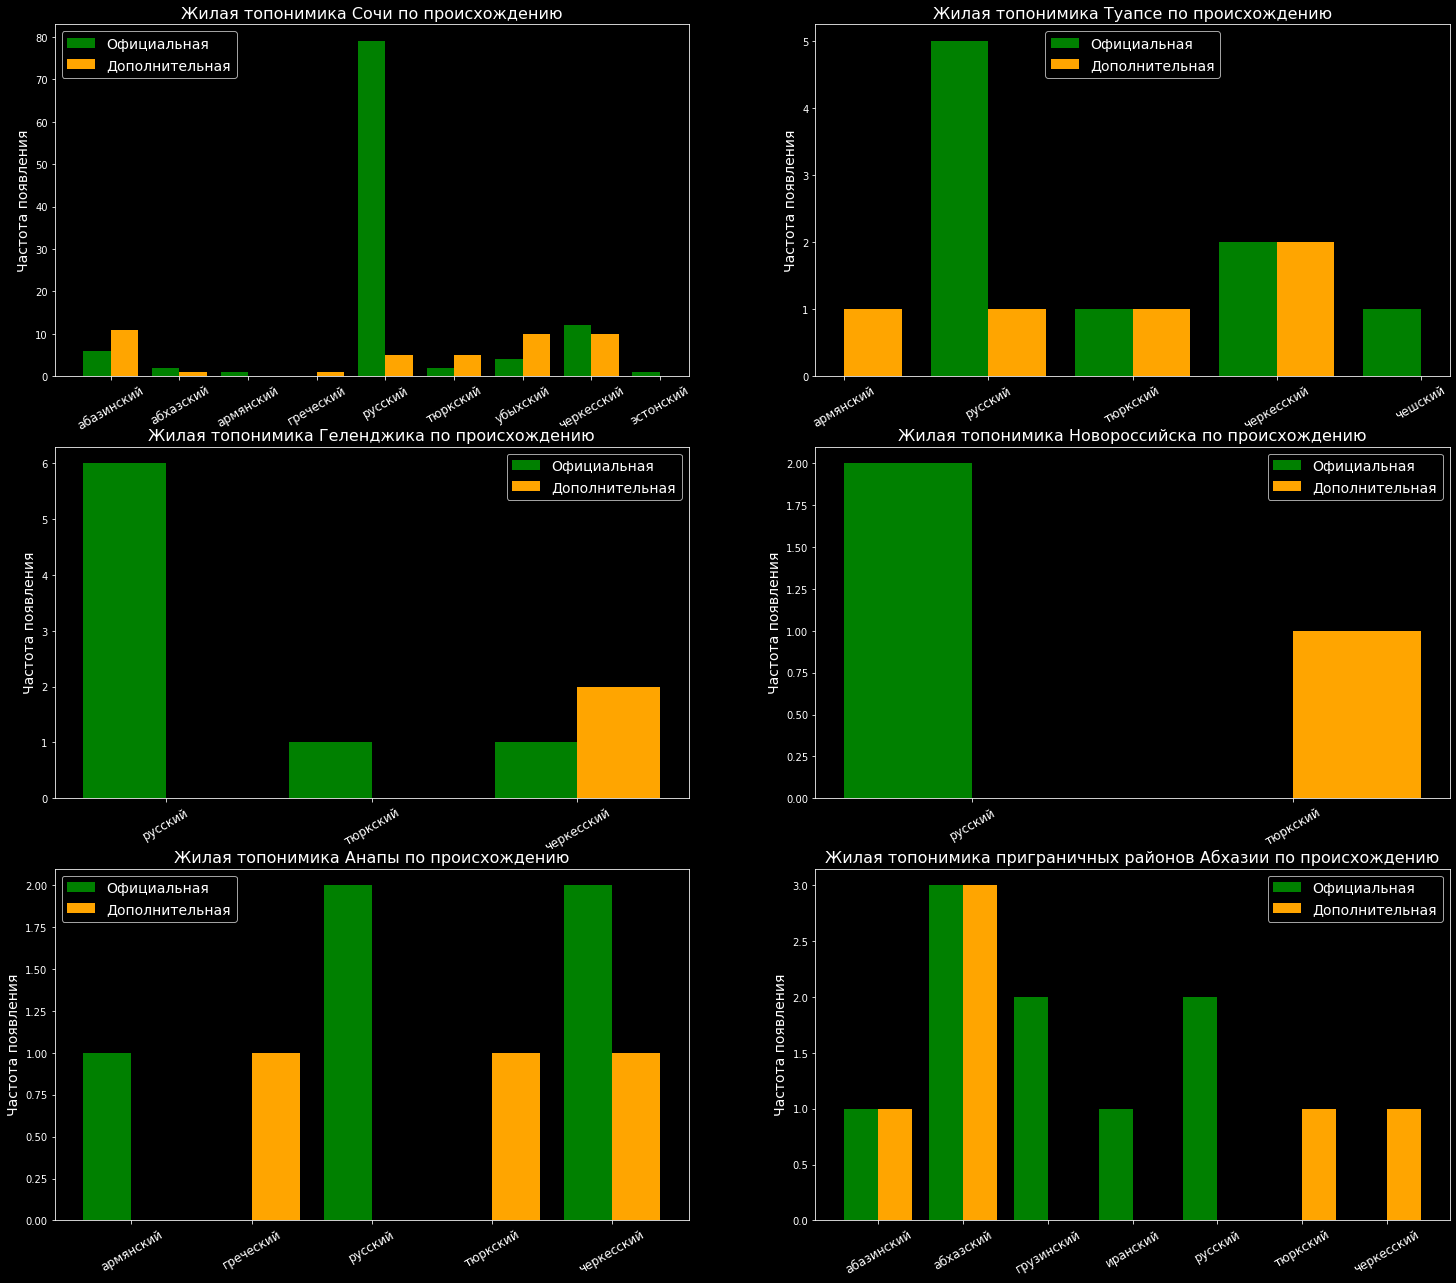

In [56]:
#построим графики распределения жилой топонимики Черноморского побережья Краснодарского края и приграничных районов Абхазии
f, ax = plt.subplots(figsize=(25, 22))

plt.subplot(3, 2, 1)
plt.bar(X_axis_artificial_s - 0.2, origin_artificial_s, 0.4, label="Официальная", color="green")
plt.bar(X_axis_artificial_s + 0.2, origin2_artificial_s, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_artificial_s, data_artificial_s, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Жилая топонимика Сочи по происхождению", fontsize=16)
plt.legend(fontsize=14)

plt.subplot(3, 2, 2)
plt.bar(X_axis_artificial_t - 0.2, origin_artificial_t, 0.4, label="Официальная", color="green")
plt.bar(X_axis_artificial_t + 0.2, origin2_artificial_t, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_artificial_t, data_artificial_t, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Жилая топонимика Туапсе по происхождению", fontsize=16)
plt.legend(fontsize=14)

plt.subplot(3, 2, 3)
plt.bar(X_axis_artificial_g - 0.2, origin_artificial_g, 0.4, label="Официальная", color="green")
plt.bar(X_axis_artificial_g + 0.2, origin2_artificial_g, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_artificial_g, data_artificial_g, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Жилая топонимика Геленджика по происхождению", fontsize=16)
plt.legend(fontsize=14, loc="upper right")

plt.subplot(3, 2, 4)
plt.bar(X_axis_artificial_n - 0.2, origin_artificial_n, 0.4, label="Официальная", color="green")
plt.bar(X_axis_artificial_n + 0.2, origin2_artificial_n, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_artificial_n, data_artificial_n, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Жилая топонимика Новороссийска по происхождению", fontsize=16)
plt.legend(fontsize=14, loc="upper right")

plt.subplot(3, 2, 5)
plt.bar(X_axis_artificial_a - 0.2, origin_artificial_a, 0.4, label="Официальная", color="green")
plt.bar(X_axis_artificial_a + 0.2, origin2_artificial_a, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_artificial_a, data_artificial_a, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Жилая топонимика Анапы по происхождению", fontsize=16)
plt.legend(fontsize=14, loc="upper left")

plt.subplot(3, 2, 6)
plt.bar(X_axis_artificial_ab - 0.2, origin_artificial_ab, 0.4, label="Официальная", color="green")
plt.bar(X_axis_artificial_ab + 0.2, origin2_artificial_ab, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_artificial_ab, data_artificial_ab, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Жилая топонимика приграничных районов Абхазии по происхождению", fontsize=16)
plt.legend(fontsize=14, loc="upper right")

plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
- Жилая топонимика по районам преимущественно русская, но есть нюансы;
- В Туапсе жилая топонимика встречается черкесская, как официальная, так и дополнительная;
- Анапа отличается в равной степени русской и черкесской топонимикой, но вторая выигрывает за счёт дополнительных названий. Тут также виден след армянских переселенцев;
- Абхазская топонимика также, как природная, преимущественно абхазская, но встречается довольно большое число грузинских и русских названий. Абазинский след сложно отделить от абхазского, он тоже довольно большой. Тут же видна особенность миграционной волны курдов, либо какой-то более старой.
    
**Лидирует по районам края русская жилая топонимика. Есть особенности в Анапе и Абхазии, но они, вполне вероятно, следствие маленькой выборки данных.**
 
</div>

**Взглянем на распределение жилой топонимики по микрорайонам Большого Сочи в отдельности.**

In [57]:
#создадим срезы данных по жилой топонимике для микрорайонов Большого Сочи
df_sochi_center = df.loc[df["sub_territory"] == "Центральный", ["sub_territory", "type", "add_type", "origin", "origin2"]]
f_artSС = df_sochi_center[df_sochi_center[["type", "add_type"]].isin(["село", "аул", "город", "пост", "хутор", "место", "руины", "район"]).any(axis=1)]
first_artificialSC = f_artSС[~f_artSС[["type", "add_type"]].isin(["урочище", "мыс", "балка", "хребет", "бухта", "река", "перевал", "водопад", "гора", "ручей"]).any(axis=1)]

df_sochi_khosta = df.loc[df["sub_territory"] == "Хостинский", ["sub_territory", "type", "add_type", "origin", "origin2"]]
f_artSKh = df_sochi_khosta[df_sochi_khosta[["type", "add_type"]].isin(["село", "аул", "город", "пост", "хутор", "место", "руины", "район"]).any(axis=1)]
first_artificialSKh = f_artSKh[~f_artSKh[["type", "add_type"]].isin(["урочище", "мыс", "балка", "хребет", "бухта", "река", "перевал", "водопад", "гора", "ручей"]).any(axis=1)]

df_sochi_adler = df.loc[df["sub_territory"] == "Адлерский", ["sub_territory", "type", "add_type", "origin", "origin2"]]
f_artA = df_sochi_adler[df_sochi_adler[["type", "add_type"]].isin(["село", "аул", "город", "пост", "хутор", "место", "руины", "район"]).any(axis=1)]
first_artificialSA = f_artA[~f_artA[["type", "add_type"]].isin(["урочище", "мыс", "балка", "хребет", "бухта", "река", "перевал", "водопад", "гора", "ручей"]).any(axis=1)]

df_sochi_lazarev = df.loc[df["sub_territory"] == "Лазаревский", ["sub_territory", "type", "add_type", "origin", "origin2"]]
f_artL = df_sochi_lazarev[df_sochi_lazarev[["type", "add_type"]].isin(["село", "аул", "город", "пост", "хутор", "место", "руины", "район"]).any(axis=1)]
first_artificialSL = f_artL[~f_artL[["type", "add_type"]].isin(["урочище", "мыс", "балка", "хребет", "бухта", "река", "перевал", "водопад", "гора", "ручей"]).any(axis=1)]

In [58]:
#посчитаем значения для Центрального микрорайона Сочи
count_first_artificialSC = first_artificialSC.loc[first_artificialSC["sub_territory"] == "Центральный", ["sub_territory", "origin", "origin2"]]
count_avg_first_artificialSC = count_first_artificialSC[["origin", "origin2"]].apply(pd.Series.value_counts)
count_avg_first_artificialSC.reset_index(inplace=True)
count_avg_first_artificialSC.fillna(0)

#посчитаем значения для Хостинского микрорайона Сочи
count_first_artificialSKh = first_artificialSKh.loc[first_artificialSKh["sub_territory"] == "Хостинский", ["sub_territory", "origin", "origin2"]]
count_avg_first_artificialSKh = count_first_artificialSKh[["origin", "origin2"]].apply(pd.Series.value_counts)
count_avg_first_artificialSKh.reset_index(inplace=True)
count_avg_first_artificialSKh.fillna(0)

#посчитаем значения для Адлерского микрорайона Сочи
count_first_artificialSA = first_artificialSA.loc[first_artificialSA["sub_territory"] == "Адлерский", ["sub_territory", "origin", "origin2"]]
count_avg_first_artificialSA = count_first_artificialSA[["origin", "origin2"]].apply(pd.Series.value_counts)
count_avg_first_artificialSA.reset_index(inplace=True)
count_avg_first_artificialSA.fillna(0)

#посчитаем значения для Лазаревского микрорайона Сочи
count_first_artificialSL = first_artificialSL.loc[first_artificialSL["sub_territory"] == "Лазаревский", ["sub_territory", "origin", "origin2"]]
count_avg_first_artificialSL = count_first_artificialSL[["origin", "origin2"]].apply(pd.Series.value_counts)
count_avg_first_artificialSL.reset_index(inplace=True)
count_avg_first_artificialSL.fillna(0)

,index,origin,origin2
0,абазинский,0.0,4.0
1,армянский,1.0,0.0
2,греческий,0.0,1.0
3,русский,31.0,5.0
4,тюркский,0.0,2.0
5,убыхский,2.0,4.0
6,черкесский,9.0,8.0


In [59]:
#создадим перемерные со срезами данных для построения графиков
#Центральный микрорайон
data_artificial_sc = count_avg_first_artificialSC["index"]
origin_artificial_sc = count_avg_first_artificialSC["origin"]
origin2_artificial_sc = count_avg_first_artificialSC["origin2"]
X_axis_artificial_sc = np.arange(len(data_artificial_sc))

#Хостинский микрорайон
data_artificial_skh = count_avg_first_artificialSKh["index"]
origin_artificial_skh = count_avg_first_artificialSKh["origin"]
origin2_artificial_skh = count_avg_first_artificialSKh["origin2"]
X_axis_artificial_skh = np.arange(len(data_artificial_skh))

#Адлерский микрорайон
data_artificial_sa = count_avg_first_artificialSA["index"]
origin_artificial_sa = count_avg_first_artificialSA["origin"]
origin2_artificial_sa = count_avg_first_artificialSA["origin2"]
X_axis_artificial_sa = np.arange(len(data_artificial_sa))

#Лазаревский микрорайон
data_artificial_sl = count_avg_first_artificialSL["index"]
origin_artificial_sl = count_avg_first_artificialSL["origin"]
origin2_artificial_sl = count_avg_first_artificialSL["origin2"]
X_axis_artificial_sl = np.arange(len(data_artificial_sl))

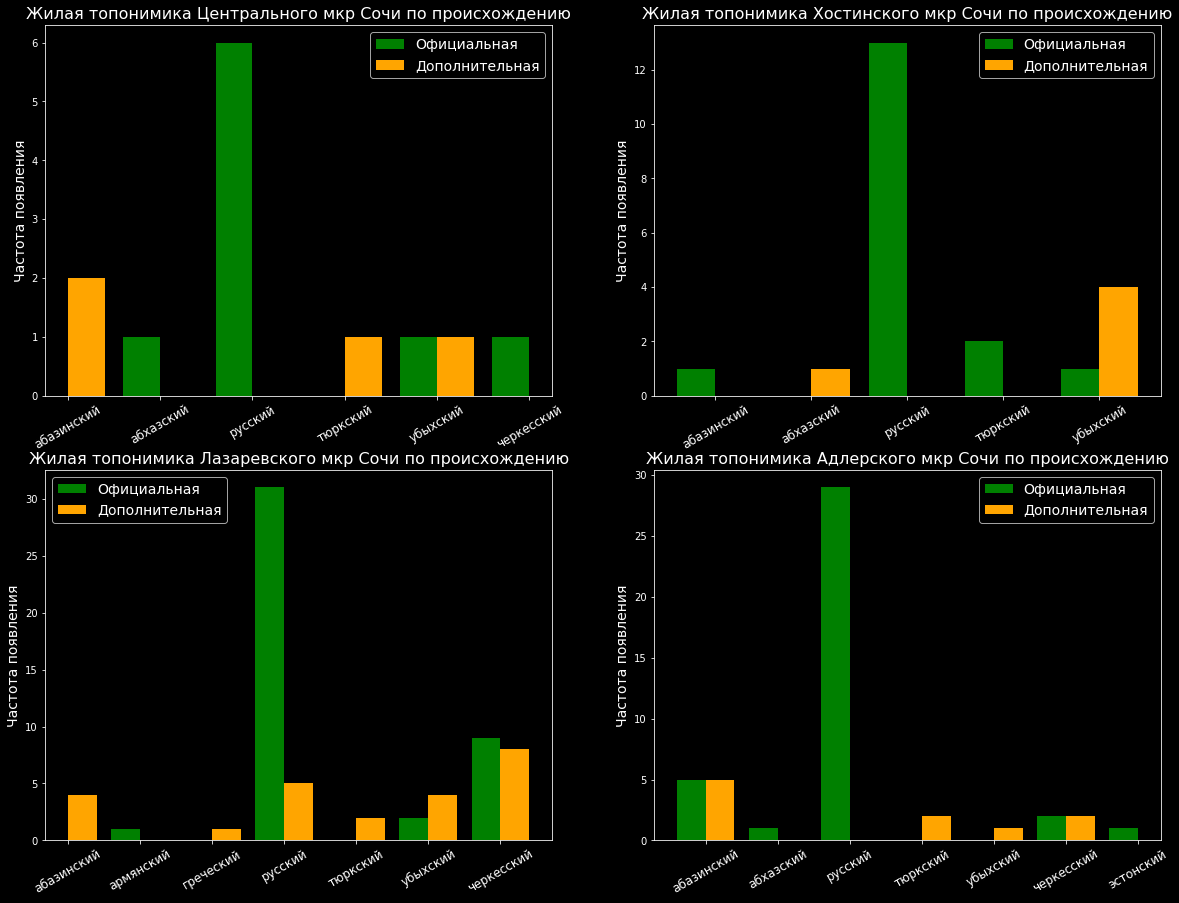

In [60]:
#построим графики распределения жилой топонимики микрорайонов Большого Сочи
f, ax = plt.subplots(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.bar(X_axis_artificial_sc - 0.2, origin_artificial_sc, 0.4, label="Официальная", color="green")
plt.bar(X_axis_artificial_sc + 0.2, origin2_artificial_sc, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_artificial_sc, data_artificial_sc, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Жилая топонимика Центрального мкр Сочи по происхождению", fontsize=16)
plt.legend(fontsize=14)

plt.subplot(2, 2, 2)
plt.bar(X_axis_artificial_skh - 0.2, origin_artificial_skh, 0.4, label="Официальная", color="green")
plt.bar(X_axis_artificial_skh + 0.2, origin2_artificial_skh, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_artificial_skh, data_artificial_skh, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Жилая топонимика Хостинского мкр Сочи по происхождению", fontsize=16)
plt.legend(fontsize=14)

plt.subplot(2, 2, 3)
plt.bar(X_axis_artificial_sl - 0.2, origin_artificial_sl, 0.4, label="Официальная", color="green")
plt.bar(X_axis_artificial_sl + 0.2, origin2_artificial_sl, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_artificial_sl, data_artificial_sl, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Жилая топонимика Лазаревского мкр Сочи по происхождению", fontsize=16)
plt.legend(fontsize=14, loc="upper left")

plt.subplot(2, 2, 4)
plt.bar(X_axis_artificial_sa - 0.2, origin_artificial_sa, 0.4, label="Официальная", color="green")
plt.bar(X_axis_artificial_sa + 0.2, origin2_artificial_sa, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_artificial_sa, data_artificial_sa, rotation=30, fontsize=12)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Жилая топонимика Адлерского мкр Сочи по происхождению", fontsize=16)
plt.legend(fontsize=14, loc="upper right")

plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
- Жилая топонимика по микрорайонам преимущественно русская, без особых нюансов;
- Чуть больше черкесской топонимики присутствует традицонно в Лазаревском мкр;
- В Центральном районе есть небольшой всплеск абазинской дополнительной топонимики, а в Хостинском убыхской.
    
**Лидирует по районам края русская жилая топонимика.**
 
</div>

**Для истории и для сравнения соединим данные по природной и жилой топонимике районов Черноморского побережья Краснодарского края и микрорайонов Большого Сочи в два разных единых дашборда.**

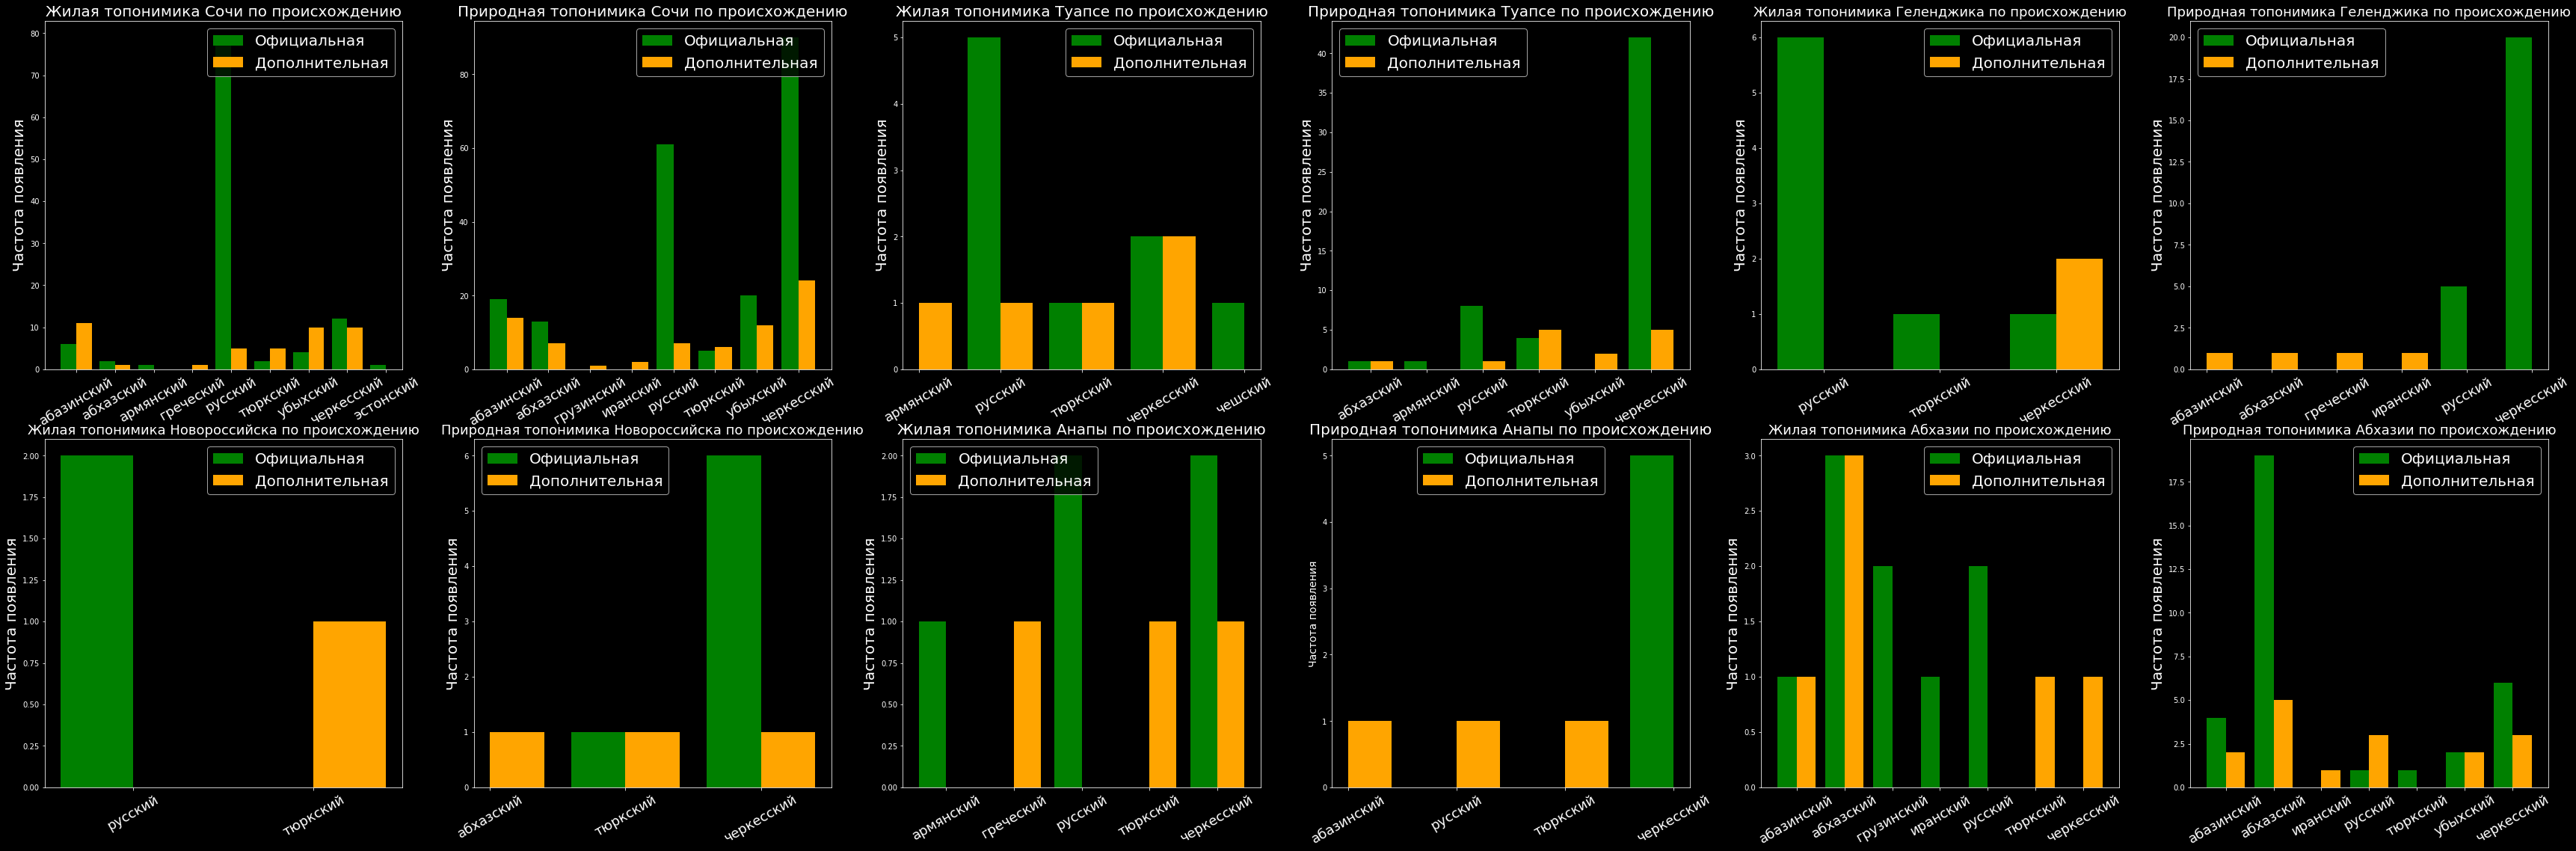

In [61]:
#объединим таблицы жилой и природной топонимике по районам ЧМ КК
f, ax = plt.subplots(figsize=(60, 60))

plt.subplot(6, 6, 1)
plt.bar(X_axis_artificial_s - 0.2, origin_artificial_s, 0.4, label="Официальная", color="green")
plt.bar(X_axis_artificial_s + 0.2, origin2_artificial_s, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_artificial_s, data_artificial_s, rotation=30, fontsize=18)
plt.ylabel("Частота появления", fontsize=20)
plt.title("Жилая топонимика Сочи по происхождению", fontsize=20)
plt.legend(fontsize=20)

plt.subplot(6, 6, 2)
plt.bar(X_axis_nature_s - 0.2, origin_nature_s, 0.4, label="Официальная", color="green")
plt.bar(X_axis_nature_s + 0.2, origin2_nature_s, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_nature_s, data_nature_s, rotation=30, fontsize=18)
plt.ylabel("Частота появления", fontsize=20)
plt.title("Природная топонимика Сочи по происхождению", fontsize=20)
plt.legend(fontsize=20)

plt.subplot(6, 6, 3)
plt.bar(X_axis_artificial_t - 0.2, origin_artificial_t, 0.4, label="Официальная", color="green")
plt.bar(X_axis_artificial_t + 0.2, origin2_artificial_t, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_artificial_t, data_artificial_t, rotation=30, fontsize=18)
plt.ylabel("Частота появления", fontsize=20)
plt.title("Жилая топонимика Туапсе по происхождению", fontsize=20)
plt.legend(fontsize=20)

plt.subplot(6, 6, 4)
plt.bar(X_axis_nature_t - 0.2, origin_nature_t, 0.4, label="Официальная", color="green")
plt.bar(X_axis_nature_t + 0.2, origin2_nature_t, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_nature_t, data_nature_t, rotation=30, fontsize=18)
plt.ylabel("Частота появления", fontsize=20)
plt.title("Природная топонимика Туапсе по происхождению", fontsize=20)
plt.legend(fontsize=20)

plt.subplot(6, 6, 5)
plt.bar(X_axis_artificial_g - 0.2, origin_artificial_g, 0.4, label="Официальная", color="green")
plt.bar(X_axis_artificial_g + 0.2, origin2_artificial_g, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_artificial_g, data_artificial_g, rotation=30, fontsize=18)
plt.ylabel("Частота появления", fontsize=20)
plt.title("Жилая топонимика Геленджика по происхождению", fontsize=18,)
plt.legend(fontsize=20, loc="upper right")

plt.subplot(6, 6, 6)
plt.bar(X_axis_nature_g - 0.2, origin_nature_g, 0.4, label="Официальная", color="green")
plt.bar(X_axis_nature_g + 0.2, origin2_nature_g, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_nature_g, data_nature_g, rotation=30, fontsize=18)
plt.ylabel("Частота появления", fontsize=20)
plt.title("Природная топонимика Геленджика по происхождению", fontsize=18)
plt.legend(fontsize=20, loc="upper left")

plt.subplot(6, 6, 7)
plt.bar(X_axis_artificial_n - 0.2, origin_artificial_n, 0.4, label="Официальная", color="green")
plt.bar(X_axis_artificial_n + 0.2, origin2_artificial_n, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_artificial_n, data_artificial_n, rotation=30, fontsize=18)
plt.ylabel("Частота появления", fontsize=20)
plt.title("Жилая топонимика Новороссийска по происхождению", fontsize=18)
plt.legend(fontsize=20, loc="upper right")

plt.subplot(6, 6, 8)
plt.bar(X_axis_nature_n - 0.2, origin_nature_n, 0.4, label="Официальная", color="green")
plt.bar(X_axis_nature_n + 0.2, origin2_nature_n, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_nature_n, data_nature_n, rotation=30, fontsize=18)
plt.ylabel("Частота появления", fontsize=20)
plt.title("Природная топонимика Новороссийска по происхождению", fontsize=18)
plt.legend(fontsize=20, loc="upper left")

plt.subplot(6, 6, 9)
plt.bar(X_axis_artificial_a - 0.2, origin_artificial_a, 0.4, label="Официальная", color="green")
plt.bar(X_axis_artificial_a + 0.2, origin2_artificial_a, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_artificial_a, data_artificial_a, rotation=30, fontsize=18)
plt.ylabel("Частота появления", fontsize=20)
plt.title("Жилая топонимика Анапы по происхождению", fontsize=20)
plt.legend(fontsize=20, loc="upper left")

plt.subplot(6, 6, 10)
plt.bar(X_axis_nature_a - 0.2, origin_nature_a, 0.4, label="Официальная", color="green")
plt.bar(X_axis_nature_a + 0.2, origin2_nature_a, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_nature_a, data_nature_a, rotation=30, fontsize=18)
plt.ylabel("Частота появления", fontsize=14)
plt.title("Природная топонимика Анапы по происхождению", fontsize=20)
plt.legend(fontsize=20)

plt.subplot(6, 6, 11)
plt.bar(X_axis_artificial_ab - 0.2, origin_artificial_ab, 0.4, label="Официальная", color="green")
plt.bar(X_axis_artificial_ab + 0.2, origin2_artificial_ab, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_artificial_ab, data_artificial_ab, rotation=30, fontsize=18)
plt.ylabel("Частота появления", fontsize=20)
plt.title("Жилая топонимика Абхазии по происхождению", fontsize=18)
plt.legend(fontsize=20, loc="upper right")

plt.subplot(6, 6, 12)
plt.bar(X_axis_nature_ab - 0.2, origin_nature_ab, 0.4, label="Официальная", color="green")
plt.bar(X_axis_nature_ab + 0.2, origin2_nature_ab, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_nature_ab, data_nature_ab, rotation=30, fontsize=18)
plt.ylabel("Частота появления", fontsize=20)
plt.title("Природная топонимика Абхазии по происхождению", fontsize=18)
plt.legend(fontsize=20)

plt.show()

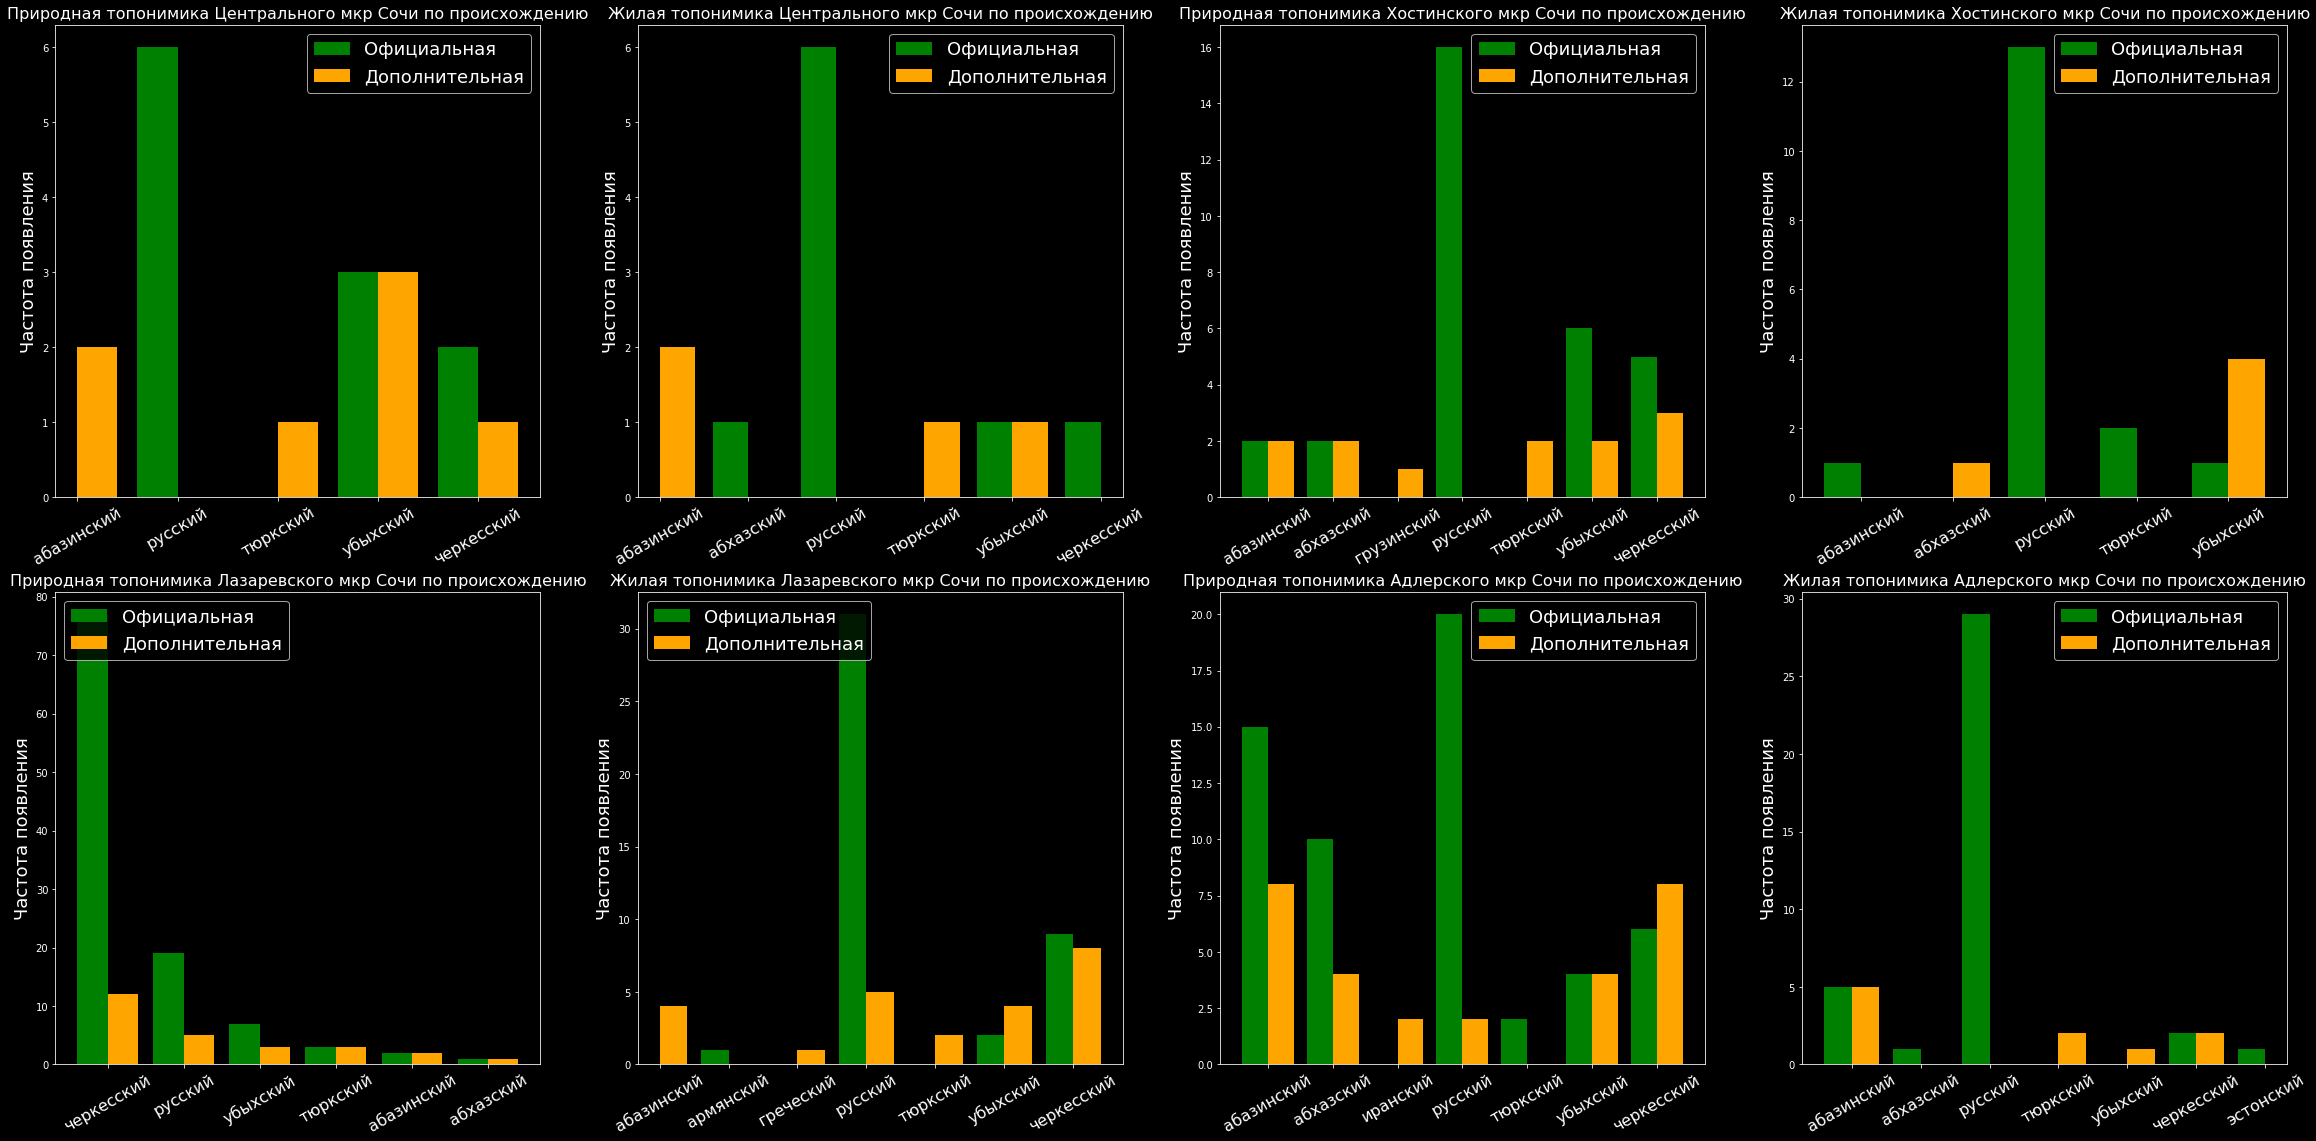

In [62]:
#объединим таблицы жилой и природной топонимике по микрорайонам Большого Сочи
f, ax = plt.subplots(figsize=(40, 40))

plt.subplot(4, 4, 1)
plt.bar(X_axis_nature_sc - 0.2, origin_nature_sc, 0.4, label="Официальная", color="green")
plt.bar(X_axis_nature_sc + 0.2, origin2_nature_sc, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_nature_sc, data_nature_sc, rotation=30, fontsize=16)
plt.ylabel("Частота появления", fontsize=18)
plt.title("Природная топонимика Центрального мкр Сочи по происхождению", fontsize=16)
plt.legend(fontsize=18)

plt.subplot(4, 4, 2)
plt.bar(X_axis_artificial_sc - 0.2, origin_artificial_sc, 0.4, label="Официальная", color="green")
plt.bar(X_axis_artificial_sc + 0.2, origin2_artificial_sc, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_artificial_sc, data_artificial_sc, rotation=30, fontsize=16)
plt.ylabel("Частота появления", fontsize=18)
plt.title("Жилая топонимика Центрального мкр Сочи по происхождению", fontsize=16)
plt.legend(fontsize=18)

plt.subplot(4, 4, 3)
plt.bar(X_axis_nature_skh - 0.2, origin_nature_skh, 0.4, label="Официальная", color="green")
plt.bar(X_axis_nature_skh + 0.2, origin2_nature_skh, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_nature_skh, data_nature_skh, rotation=30, fontsize=16)
plt.ylabel("Частота появления", fontsize=18)
plt.title("Природная топонимика Хостинского мкр Сочи по происхождению", fontsize=16)
plt.legend(fontsize=18)

plt.subplot(4, 4, 4)
plt.bar(X_axis_artificial_skh - 0.2, origin_artificial_skh, 0.4, label="Официальная", color="green")
plt.bar(X_axis_artificial_skh + 0.2, origin2_artificial_skh, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_artificial_skh, data_artificial_skh, rotation=30, fontsize=16)
plt.ylabel("Частота появления", fontsize=18)
plt.title("Жилая топонимика Хостинского мкр Сочи по происхождению", fontsize=16)
plt.legend(fontsize=18)

plt.subplot(4, 4, 5)
plt.bar(X_axis_nature_sl - 0.2, origin_nature_sl, 0.4, label="Официальная", color="green")
plt.bar(X_axis_nature_sl + 0.2, origin2_nature_sl, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_nature_sl, data_nature_sl, rotation=30, fontsize=16)
plt.ylabel("Частота появления", fontsize=18)
plt.title("Природная топонимика Лазаревского мкр Сочи по происхождению", fontsize=16)
plt.legend(fontsize=18, loc="upper left")

plt.subplot(4, 4, 6)
plt.bar(X_axis_artificial_sl - 0.2, origin_artificial_sl, 0.4, label="Официальная", color="green")
plt.bar(X_axis_artificial_sl + 0.2, origin2_artificial_sl, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_artificial_sl, data_artificial_sl, rotation=30, fontsize=16)
plt.ylabel("Частота появления", fontsize=18)
plt.title("Жилая топонимика Лазаревского мкр Сочи по происхождению", fontsize=16)
plt.legend(fontsize=18, loc="upper left")

plt.subplot(4, 4, 7)
plt.bar(X_axis_nature_sa - 0.2, origin_nature_sa, 0.4, label="Официальная", color="green")
plt.bar(X_axis_nature_sa + 0.2, origin2_nature_sa, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_nature_sa, data_nature_sa, rotation=30, fontsize=16)
plt.ylabel("Частота появления", fontsize=18)
plt.title("Природная топонимика Адлерского мкр Сочи по происхождению", fontsize=16)
plt.legend(fontsize=18, loc="upper right")

plt.subplot(4, 4, 8)
plt.bar(X_axis_artificial_sa - 0.2, origin_artificial_sa, 0.4, label="Официальная", color="green")
plt.bar(X_axis_artificial_sa + 0.2, origin2_artificial_sa, 0.4, label="Дополнительная", color="orange")
plt.xticks(X_axis_artificial_sa, data_artificial_sa, rotation=30, fontsize=16)
plt.ylabel("Частота появления", fontsize=18)
plt.title("Жилая топонимика Адлерского мкр Сочи по происхождению", fontsize=16)
plt.legend(fontsize=18, loc="upper right")

plt.show()

## 4. Пропорциональное распределение топонимики:

**Посчитаем отношение русской топонимики к черкесской на Черноморском побережье Краснодарского края и в приграничных районах Абхазии**

In [63]:
#создадим срезы данных и сохраним датафрейм с пропорциональным отношением русской к черкесской
proportion_russian = df_count_avg.query('index == "русский"')
proportion_circassian = df_count_avg.query('index == "черкесский"')
proportion_all_temp = (
    proportion_russian["origin"].sum() + proportion_russian["origin2"].sum()
) / (proportion_circassian["origin"].sum() + proportion_circassian["origin2"].sum())
proportion_all = pd.DataFrame({"proportion_all": [proportion_all_temp]})
proportion_all

,proportion_all
0,0.777358


In [64]:
#создадим такой же срез данных с отношением русской к черкесской топонимике по региону Большого Сочи
proportion_russian = df_count_avg_sochi.query('index == "русский"')
proportion_circassian = df_count_avg_sochi.query('index == "черкесский"')
proportion_sochi_temp = (
    proportion_russian["origin"].sum() + proportion_russian["origin2"].sum()
) / (proportion_circassian["origin"].sum() + proportion_circassian["origin2"].sum())
proportion_sochi = pd.DataFrame({"proportion_sochi": [proportion_sochi_temp]})

#создадим такой же срез данных с отношением русской к черкесской топонимике по Туапсинскому региону
proportion_russian = df_count_avg_tuapse.query('index == "русский"')
proportion_circassian = df_count_avg_tuapse.query('index == "черкесский"')
proportion_tuapse_temp = (
    proportion_russian["origin"].sum() + proportion_russian["origin2"].sum()
) / (proportion_circassian["origin"].sum() + proportion_circassian["origin2"].sum())
proportion_tuapse = pd.DataFrame({"proportion_tuapse": [proportion_tuapse_temp]})

#создадим такой же срез данных с отношением русской к черкесской топонимике по Геленджикскому региону
proportion_russian = df_count_avg_gelenjik.query('index == "русский"')
proportion_circassian = df_count_avg_gelenjik.query('index == "черкесский"')
proportion_gelenjik_temp = (
    proportion_russian["origin"].sum() + proportion_russian["origin2"].sum()
) / (proportion_circassian["origin"].sum() + proportion_circassian["origin2"].sum())
proportion_gelenjik = pd.DataFrame({"proportion_gelenjik": [proportion_gelenjik_temp]})

#создадим такой же срез данных с отношением русской к черкесской топонимике по Новороссийскому региону
proportion_russian = df_count_avg_novoross.query('index == "русский"')
proportion_circassian = df_count_avg_novoross.query('index == "черкесский"')
proportion_novoross_temp = (
    proportion_russian["origin"].sum() + proportion_russian["origin2"].sum()
) / (proportion_circassian["origin"].sum() + proportion_circassian["origin2"].sum())
proportion_novoross = pd.DataFrame({"proportion_novoross": [proportion_novoross_temp]})

#создадим такой же срез данных с отношением русской к черкесской топонимике по Анапскому региону
proportion_russian = df_count_avg_anapa.query('index == "русский"')
proportion_circassian = df_count_avg_anapa.query('index == "черкесский"')
proportion_anapa_temp = (
    proportion_russian["origin"].sum() + proportion_russian["origin2"].sum()
) / (proportion_circassian["origin"].sum() + proportion_circassian["origin2"].sum())
proportion_anapa = pd.DataFrame({"proportion_anapa": [proportion_anapa_temp]})

#создадим такой же срез данных с отношением русской к черкесской топонимике по приграничным районам Абхазии
proportion_russian = df_count_avg_abkhaz.query('index == "русский"')
proportion_circassian = df_count_avg_abkhaz.query('index == "черкесский"')
proportion_abkhaz_temp = (
    proportion_russian["origin"].sum() + proportion_russian["origin2"].sum()
) / (proportion_circassian["origin"].sum() + proportion_circassian["origin2"].sum())
proportion_abkhaz = pd.DataFrame({"proportion_abkhaz": [proportion_abkhaz_temp]})
proportion_abkhaz

,proportion_abkhaz
0,0.545455


**Дополним картину также данными об отношении русской к убыхской и к абазинской топонимике на ЧМ КК**

In [65]:
#создадим срез данных с отношением русской к убыхской топонимике по Черноморскому побережью Краснодарского края и Абхазии
proportion_russian = df_count_avg.query('index == "русский"')
proportion_ubykh = df_count_avg.query('index == "убыхский"')
proportion_all2_temp = (
    proportion_russian["origin"].sum() + proportion_russian["origin2"].sum()
) / (proportion_ubykh["origin"].sum() + proportion_ubykh["origin2"].sum())
proportion_all2 = pd.DataFrame({"proportion_all2": [proportion_all2_temp]})
proportion_all2

,proportion_all2
0,3.322581


In [66]:
#создадим срез данных с отношением русской к абазинской топонимике по Черноморскому побережью Краснодарского края и Абхазии
proportion_russian = df_count_avg.query('index == "русский"')
proportion_abazin = df_count_avg.query('index == "абазинский"')
proportion_all3_temp = (
    proportion_russian["origin"].sum() + proportion_russian["origin2"].sum()
) / (proportion_abazin["origin"].sum() + proportion_abazin["origin2"].sum())
proportion_all3 = pd.DataFrame({"proportion_all3": [proportion_all3_temp]})
proportion_all3

,proportion_all3
0,2.783784


**Теперь построим графики**

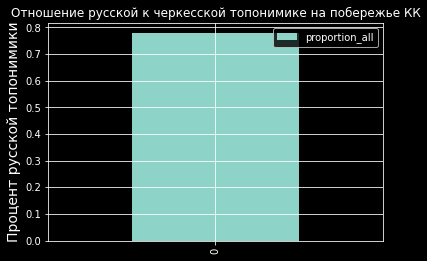

In [67]:
#строим график пропорций русской к черкесской топонимике по всей базе данных
proportion_all.plot.bar(grid=True, figsize=(6, 4))
plt.title("Отношение русской к черкесской топонимике на побережье КК")
plt.ylabel("Процент русской топонимики", fontsize=14)
plt.show()

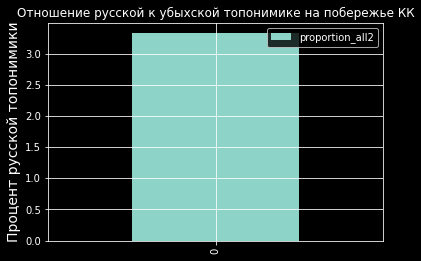

In [68]:
#строим график пропорций русской к убыхской топонимике по всей базе данных
proportion_all2.plot.bar(grid=True, figsize=(6, 4))
plt.title("Отношение русской к убыхской топонимике на побережье КК")
plt.ylabel("Процент русской топонимики", fontsize=14)
plt.show()

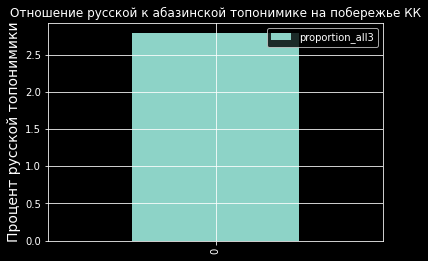

In [69]:
#строим график пропорций русской к абазинской топонимике по всей базе данных
proportion_all3.plot.bar(grid=True, figsize=(6, 4))
plt.title("Отношение русской к абазинской топонимике на побережье КК")
plt.ylabel("Процент русской топонимики", fontsize=14)
plt.show()

 <div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
**Из трех автохтонных языков, черкесский единственный выигрывает с точки зрения топонимики у русского языка (10 черкесских наименований на ~7,8 русских)**
    
    
- Убыхская топонимка наименее представлена (~34 русских названий на 10 убыхских);
- Абазинская топонимика представлена чуть лучше убыхской (~28 русских на 10 абазинских).

</div>

**Проверим, такая же ситуация будет, если оставить только официальную топонимику?**

In [70]:
#создадим срезы данных по русской и черкесской топонимике с той же пропорцией, но только по официальным данным
proportion_russian = df_count_avg.query('index == "русский"')
proportion_circassian = df_count_avg.query('index == "черкесский"')
proportion_all_temp_off = proportion_russian["origin"].sum() / proportion_circassian["origin"].sum()
proportion_all_off = pd.DataFrame({"proportion_all_off": [proportion_all_temp_off]})
proportion_all_off

,proportion_all_off
0,0.866667


In [71]:
#создадим срезы данных по русской и убыхской топонимике с той же пропорцией, но только по официальным данным
proportion_russian = df_count_avg.query('index == "русский"')
proportion_ubykh = df_count_avg.query('index == "убыхский"')
proportion_all2_temp_off = proportion_russian["origin"].sum() / proportion_ubykh["origin"].sum()
proportion_all2_off = pd.DataFrame({"proportion_all2_off": [proportion_all2_temp_off]})
proportion_all2_off

,proportion_all2_off
0,5.515152


In [72]:
#создадим срезы данных по русской и абазинской топонимике с той же пропорцией, но только по официальным данным
proportion_russian = df_count_avg.query('index == "русский"')
proportion_abazin = df_count_avg.query('index == "абазинский"')
proportion_all3_temp_off = proportion_russian["origin"].sum() / proportion_abazin["origin"].sum()
proportion_all3_off = pd.DataFrame({"proportion_all3_off": [proportion_all3_temp_off]})
proportion_all3_off

,proportion_all3_off
0,4.55


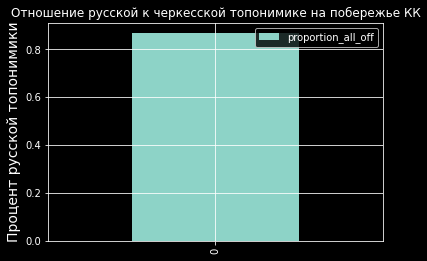

In [73]:
#строим график пропорций русской к черкесской официальной топонимике по всей базе данных
proportion_all_off.plot.bar(grid=True, figsize=(6, 4))
plt.title("Отношение русской к черкесской топонимике на побережье КК")
plt.ylabel("Процент русской топонимики", fontsize=14)
plt.show()

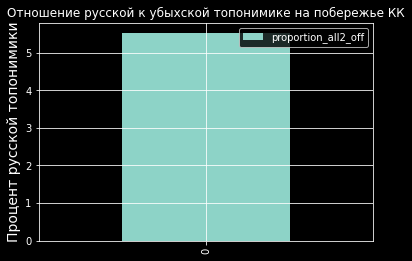

In [74]:
#строим график пропорций русской к убыхской официальной топонимике по всей базе данных
proportion_all2_off.plot.bar(grid=True, figsize=(6, 4))
plt.title("Отношение русской к убыхской топонимике на побережье КК")
plt.ylabel("Процент русской топонимики", fontsize=14)
plt.show()

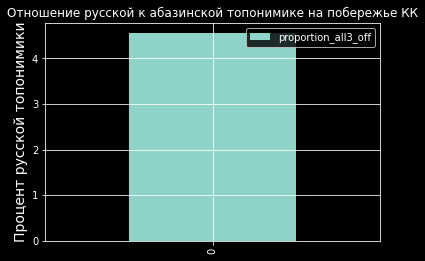

In [75]:
#строим график пропорций русской к абазинской официальной топонимике по всей базе данных
proportion_all3_off.plot.bar(grid=True, figsize=(6, 4))
plt.title("Отношение русской к абазинской топонимике на побережье КК")
plt.ylabel("Процент русской топонимики", fontsize=14)
plt.show()

 <div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

**Тендеция с официальными топонимами та же, но значительно более в пользу русской топонимики. При этом убыхская топонимика уступает очень сильно, даже абазинской.** 
- Черкесский язык также единственный выигрывает у русского (10 черкесских наименований на ~9 русских);
- Убыхская топонимка наименее представлена (~60 русских названий на 10 убыхских);
- Абазинская топонимика представлена чуть лучше убыхской (~50 русских на 10 абазинских).

</div>

**Теперь проведём то же исследование по каждому району Черноморского побережья КК и приграничным районам Абхазии.**

In [76]:
#создадим срезы данных с высчитанными пропорциями русского языка к черкесскому по районам
proportions = [
    proportion_sochi,
    proportion_tuapse,
    proportion_gelenjik,
    proportion_novoross,
    proportion_anapa,
    proportion_abkhaz,
]
proportions_frame = pd.concat(
    proportions,
    join="outer",
    axis=1,
    keys=[
        "proportion_sochi",
        "proportion_tuapse",
        "proportion_gelenjik",
        "proportion_novoross",
        "proportion_anapa",
        "proportion_abkhaz",
    ],
    names=["territory", "indexes"],
)
proportions_frame.columns = (
    "_".join(col).strip() for col in proportions_frame.columns.values
)
proportions_frame = proportions_frame.rename(
    columns={
        "proportion_sochi_proportion_sochi": "сочи",
        "proportion_tuapse_proportion_tuapse": "туапсе",
        "proportion_gelenjik_proportion_gelenjik": "геленджик",
        "proportion_novoross_proportion_novoross": "новороссийск",
        "proportion_anapa_proportion_anapa": "анапа",
        "proportion_abkhaz_proportion_abkhaz": "абхазия",
    }
)
proportions_frame

,сочи,туапсе,геленджик,новороссийск,анапа,абхазия
0,1.120805,0.245902,0.423077,0.25,0.4,0.545455


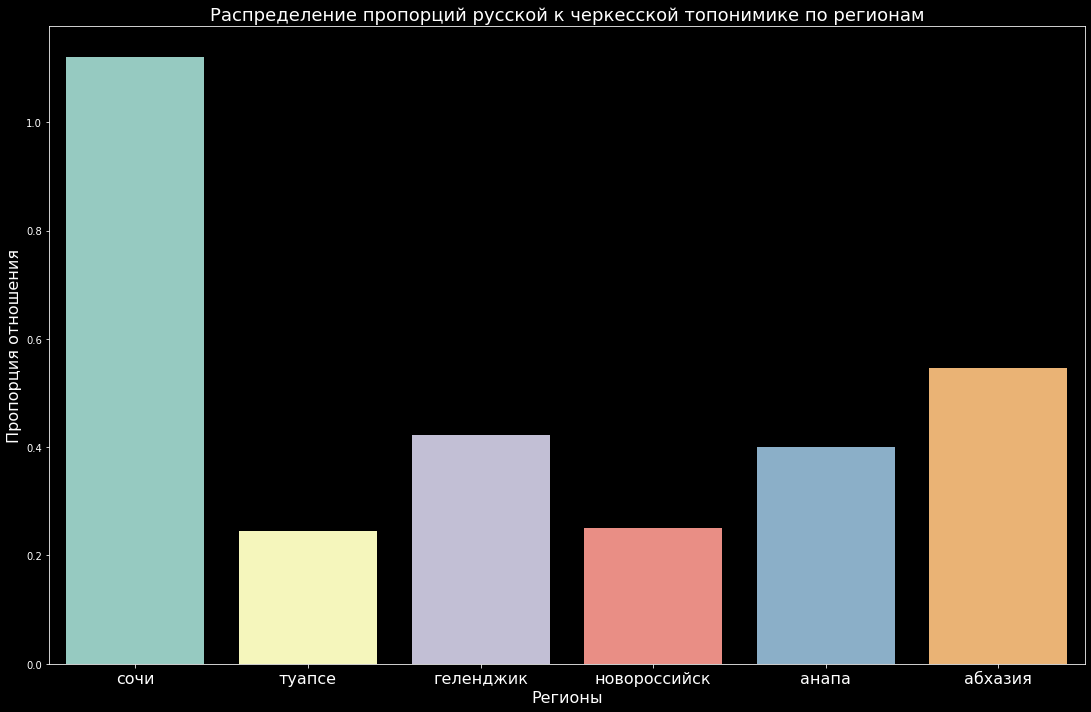

In [77]:
#построим график распределения русской топонимики к черкесской по районам КК и Абхазии
plt.figure(figsize=(15, 10))
sns.barplot(
    data=proportions_frame,
)
plt.title(
    "Распределение пропорций русской к черкесской топонимике по регионам", fontsize=18
)
plt.xlabel("Регионы", fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.ylabel("Пропорция отношения", fontsize=16)
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
**Сочи значительно выбивается, как район с преобладающей русской топонимикой (~11 русских названий на 10 черкесских).**
- В остальных районах русская топонимика значительно уступает черкесской, кроме Абхазии, где пропорция примерно 1 русское название к 2 черкесским;
- Районы наибольшего представления черкесской топонимики - Туапсинский и Новороссийский (~2,5 русских названий на 10 черкесских)

</div>

**Теперь повторим исследование для выборки только по официальной топонимике. Насколько изменятся пропорции?**

In [78]:
#создадим срез данных с отношением русской к черкесской официальной топонимике по региону Большого Сочи
proportion_russian = df_count_avg_sochi.query('index == "русский"')
proportion_circassian = df_count_avg_sochi.query('index == "черкесский"')
proportion_sochi_temp_off = proportion_russian["origin"].sum() / proportion_circassian["origin"].sum()
proportion_sochi_off = pd.DataFrame({"proportion_sochi_off": [proportion_sochi_temp_off]})

#создадим срез данных с отношением русской к официальной черкесской топонимике по Туапсинскому региону
proportion_russian = df_count_avg_tuapse.query('index == "русский"')
proportion_circassian = df_count_avg_tuapse.query('index == "черкесский"')
proportion_tuapse_temp_off = proportion_russian["origin"].sum() / proportion_circassian["origin"].sum()
proportion_tuapse_off = pd.DataFrame({"proportion_tuapse_off": [proportion_tuapse_temp_off]})

#создадим срез данных с отношением русской к официальной черкесской топонимике по Геленджикскому региону
proportion_russian = df_count_avg_gelenjik.query('index == "русский"')
proportion_circassian = df_count_avg_gelenjik.query('index == "черкесский"')
proportion_gelenjik_temp_off = proportion_russian["origin"].sum() / proportion_circassian["origin"].sum()
proportion_gelenjik_off = pd.DataFrame({"proportion_gelenjik_off": [proportion_gelenjik_temp_off]})

#создадим срез данных с отношением русской к черкесской официальной топонимике по Новороссийскому региону
proportion_russian = df_count_avg_novoross.query('index == "русский"')
proportion_circassian = df_count_avg_novoross.query('index == "черкесский"')
proportion_novoross_temp_off = proportion_russian["origin"].sum() / proportion_circassian["origin"].sum()
proportion_novoross_off = pd.DataFrame({"proportion_novoross_off": [proportion_novoross_temp_off]})

#создадим срез данных с отношением русской к черкесской официальной топонимике по Анапскому региону
proportion_russian = df_count_avg_anapa.query('index == "русский"')
proportion_circassian = df_count_avg_anapa.query('index == "черкесский"')
proportion_anapa_temp_off = proportion_russian["origin"].sum() / proportion_circassian["origin"].sum()
proportion_anapa_off = pd.DataFrame({"proportion_anapa_off": [proportion_anapa_temp_off]})

#создадим срез данных с отношением русской к черкесской официальной топонимике по приграничным районам Абхазии
proportion_russian = df_count_avg_abkhaz.query('index == "русский"')
proportion_circassian = df_count_avg_abkhaz.query('index == "черкесский"')
proportion_abkhaz_temp_off = proportion_russian["origin"].sum() / proportion_circassian["origin"].sum()
proportion_abkhaz_off = pd.DataFrame({"proportion_abkhaz_off": [proportion_abkhaz_temp_off]})
proportion_abkhaz_off

,proportion_abkhaz_off
0,0.428571


In [79]:
#создадим срезы данных с высчитанными пропорциями официальной топонимики русского языка к черкесскому по районам
proportions_off = [
    proportion_sochi_off,
    proportion_tuapse_off,
    proportion_gelenjik_off,
    proportion_novoross_off,
    proportion_anapa_off,
    proportion_abkhaz_off,
]
proportions_frame_off = pd.concat(
    proportions_off,
    join="outer",
    axis=1,
    keys=[
        "proportion_sochi_off",
        "proportion_tuapse_off",
        "proportion_gelenjik_off",
        "proportion_novoross_off",
        "proportion_anapa_off",
        "proportion_abkhaz_off",
    ],
    names=["territory", "indexes"],
)
proportions_frame_off.columns = (
    "_".join(col).strip() for col in proportions_frame_off.columns.values
)
proportions_frame_off = proportions_frame_off.rename(
    columns={
        "proportion_sochi_off_proportion_sochi_off": "сочи",
        "proportion_tuapse_off_proportion_tuapse_off": "туапсе",
        "proportion_gelenjik_off_proportion_gelenjik_off": "геленджик",
        "proportion_novoross_off_proportion_novoross_off": "новороссийск",
        "proportion_anapa_off_proportion_anapa_off": "анапа",
        "proportion_abkhaz_off_proportion_abkhaz_off": "абхазия",
    }
)
proportions_frame_off

,сочи,туапсе,геленджик,новороссийск,анапа,абхазия
0,1.376147,0.240741,0.458333,0.285714,0.222222,0.428571


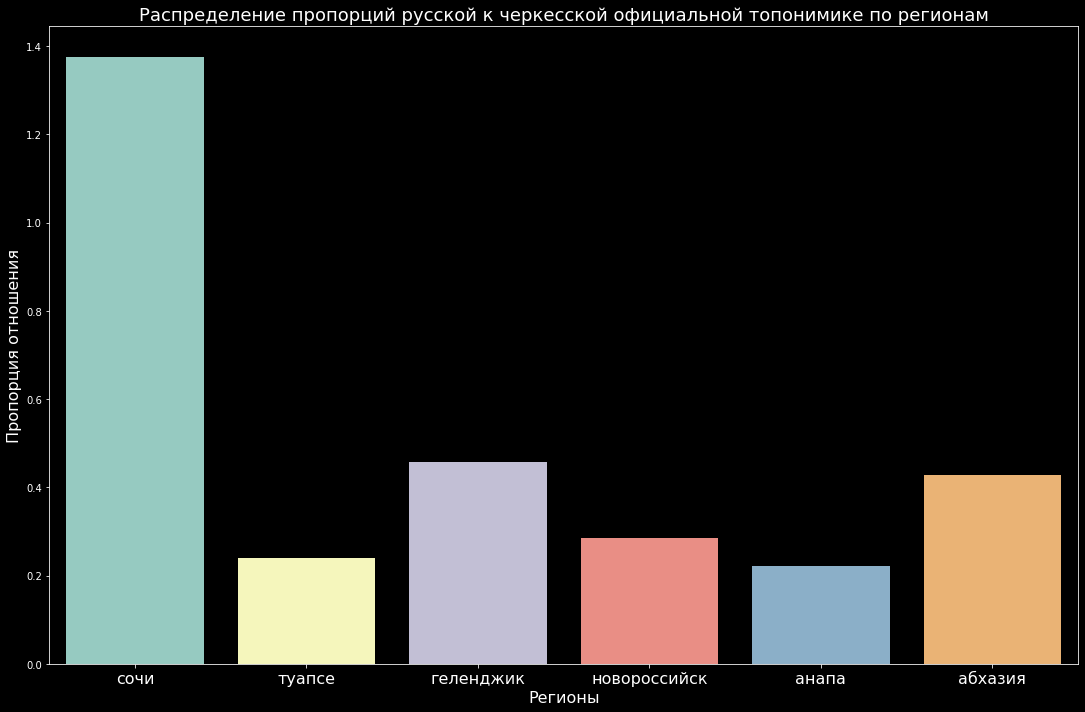

In [80]:
#построим график распределения русской официальной топонимики к черкесской по районам КК и Абхазии
plt.figure(figsize=(15, 10))
sns.barplot(
    data=proportions_frame_off,
)
plt.title(
    "Распределение пропорций русской к черкесской официальной топонимике по регионам", fontsize=18
)
plt.xlabel("Регионы", fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.ylabel("Пропорция отношения", fontsize=16)
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

**Сочи также значительно выбивается, как район с преобладающей русской топонимикой (~14 русских названий на 10 черкесских).**
- В остальных районах преобладание сохраняется в тех же пропорциях. Русская топонимика значительно уступает черкесской, кроме Абхазии, где пропрорции близки к середине, но официальной русской топонимикии всё же меньше (~42 русских названия к 100 черкесским);
- Районы наибольшего представления черкесской топонимики те же - Туапсинский и Новороссийский (~24 и 29 русских названий на 100 черкесских)
    
</div>

**Проведём то же исследование по каждому микрорайону Большого Сочи. Посмотрим на распределение отношения к общей топонимике**

In [81]:
#создадим срез данных с отношением русской к черкесской топонимике по Центральному микрорайону Сочи
proportion_russian = df_count_avg_sochi_center.query('index == "русский"')
proportion_circassian = df_count_avg_sochi_center.query('index == "черкесский"')
proportion_sochi_center_temp = (
    proportion_russian["origin"].sum() + proportion_russian["origin2"].sum()
) / (proportion_circassian["origin"].sum() + proportion_circassian["origin2"].sum())
proportion_sochi_center = pd.DataFrame({"proportion_sochi_center": [proportion_sochi_center_temp]})

#создадим срез данных с отношением русской к черкесской топонимике по Хостинскому микрорайону Сочи
proportion_russian = df_count_avg_sochi_khosta.query('index == "русский"')
proportion_circassian = df_count_avg_sochi_khosta.query('index == "черкесский"')
proportion_sochi_khosta_temp = (
    proportion_russian["origin"].sum() + proportion_russian["origin2"].sum()
) / (proportion_circassian["origin"].sum() + proportion_circassian["origin2"].sum())
proportion_sochi_khosta = pd.DataFrame({"proportion_sochi_khosta": [proportion_sochi_khosta_temp]})

#создадим срез данных с отношением русской к черкесской топонимике по Адлерскому микрорайону Сочи
proportion_russian = df_count_avg_sochi_adler.query('index == "русский"')
proportion_circassian = df_count_avg_sochi_adler.query('index == "черкесский"')
proportion_sochi_adler_temp = (
    proportion_russian["origin"].sum() + proportion_russian["origin2"].sum()
) / (proportion_circassian["origin"].sum() + proportion_circassian["origin2"].sum())
proportion_sochi_adler = pd.DataFrame({"proportion_sochi_adler": [proportion_sochi_adler_temp]})

#создадим срез данных с отношением русской к черкесской топонимике по Лазаревскому микрорайону Сочи
proportion_russian = df_count_avg_sochi_lazarev.query('index == "русский"')
proportion_circassian = df_count_avg_sochi_lazarev.query('index == "черкесский"')
proportion_sochi_lazarev_temp = (
    proportion_russian["origin"].sum() + proportion_russian["origin2"].sum()
) / (proportion_circassian["origin"].sum() + proportion_circassian["origin2"].sum())
proportion_sochi_lazarev = pd.DataFrame({"proportion_sochi_lazarev": [proportion_sochi_lazarev_temp]})
proportion_sochi_lazarev

,proportion_sochi_lazarev
0,0.62069


In [82]:
#создадим срезы данных с высчитанными пропорциями топонимики русского языка к черкесскому по микрорайонам Сочи
proportions_sub = [
    proportion_sochi_center,
    proportion_sochi_khosta,
    proportion_sochi_adler,
    proportion_sochi_lazarev,
]
proportions_frame_sub = pd.concat(
    proportions_sub,
    join="outer",
    axis=1,
    keys=[
        "proportion_sochi_center",
        "proportion_sochi_khosta",
        "proportion_sochi_adler",
        "proportion_sochi_lazarev",
    ],
    names=["sub_territory", "indexes"],
)
proportions_frame_sub.columns = (
    "_".join(col).strip() for col in proportions_frame_sub.columns.values
)
proportions_frame_sub = proportions_frame_sub.rename(
    columns={
        "proportion_sochi_center_proportion_sochi_center": "центральный",
        "proportion_sochi_khosta_proportion_sochi_khosta": "хостинский",
        "proportion_sochi_adler_proportion_sochi_adler": "адлерский",
        "proportion_sochi_lazarev_proportion_sochi_lazarev": "лазаревский",
    }
)
proportions_frame_sub

,центральный,хостинский,адлерский,лазаревский
0,3.25,2.727273,2.888889,0.62069


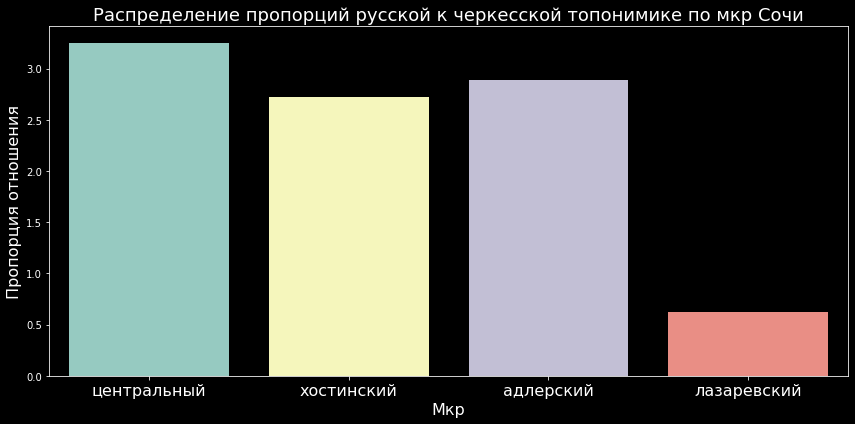

In [83]:
#построим график распределения русской топонимики к черкесской по микрорайонам Большого Сочи
plt.figure(figsize=(12, 6))
sns.barplot(
    data=proportions_frame_sub,
)
plt.title(
    "Распределение пропорций русской к черкесской топонимике по мкр Сочи", fontsize=18
)
plt.xlabel("Мкр", fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.ylabel("Пропорция отношения", fontsize=16)
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
**Русская топонимика значительно превалирует в большинстве микрорайонов, кроме Лазаревского (62 черкесских названия к 10 русским).**
    
- Русская топонимика доминирует от 27 русских названий к 10 черкесским в Хостинском мкр, до лидера Центрального мкр с 33 русскими названиями к 10 черкесским.
    
</div>

**Проверим теперь, как распределится русская топонимика к черкесской в официальных названиях топонимики мкр Большого Сочи**

In [84]:
#создадим срез данных с отношением русской к черкесской официальной топонимике по Центральному микрорайону
proportion_russian = df_count_avg_sochi_center.query('index == "русский"')
proportion_circassian = df_count_avg_sochi_center.query('index == "черкесский"')
proportion_sochi_center_temp_off = proportion_russian["origin"].sum() / proportion_circassian["origin"].sum()
proportion_sochi_center_off = pd.DataFrame({"proportion_sochi_center_off": [proportion_sochi_center_temp_off]})

#создадим срез данных с отношением русской к черкесской официальной топонимике по Хостинскому микрорайону
proportion_russian = df_count_avg_sochi_khosta.query('index == "русский"')
proportion_circassian = df_count_avg_sochi_khosta.query('index == "черкесский"')
proportion_sochi_khosta_temp_off = proportion_russian["origin"].sum() / proportion_circassian["origin"].sum()
proportion_sochi_khosta_off = pd.DataFrame({"proportion_sochi_khosta_off": [proportion_sochi_khosta_temp_off]})

#создадим срез данных с отношением русской к черкесской официальной топонимике по Адлерскому микрорайону
proportion_russian = df_count_avg_sochi_adler.query('index == "русский"')
proportion_circassian = df_count_avg_sochi_adler.query('index == "черкесский"')
proportion_sochi_adler_temp_off = proportion_russian["origin"].sum() / proportion_circassian["origin"].sum()
proportion_sochi_adler_off = pd.DataFrame({"proportion_sochi_adler_off": [proportion_sochi_adler_temp_off]})

#создадим срез данных с отношением русской к черкесской официальной топонимике по Лазаревскому микрорайону
proportion_russian = df_count_avg_sochi_lazarev.query('index == "русский"')
proportion_circassian = df_count_avg_sochi_lazarev.query('index == "черкесский"')
proportion_sochi_lazarev_temp_off = proportion_russian["origin"].sum() / proportion_circassian["origin"].sum()
proportion_sochi_lazarev_off = pd.DataFrame({"proportion_sochi_lazarev_off": [proportion_sochi_lazarev_temp_off]})
proportion_sochi_lazarev

,proportion_sochi_lazarev
0,0.62069


In [85]:
#создадим срезы данных с высчитанными пропорциями официальной топонимики русского языка к черкесскому по микрорайонам Большого Сочи
proportions_sub_off = [
    proportion_sochi_center_off,
    proportion_sochi_khosta_off,
    proportion_sochi_adler_off,
    proportion_sochi_lazarev_off,
]
proportions_frame_sub_off = pd.concat(
    proportions_sub_off,
    join="outer",
    axis=1,
    keys=[
        "proportion_sochi_center_off",
        "proportion_sochi_khosta_off",
        "proportion_sochi_adler_off",
        "proportion_sochi_lazarev_off",
    ],
    names=["sub_territory", "indexes"],
)
proportions_frame_sub_off.columns = (
    "_".join(col).strip() for col in proportions_frame_sub_off.columns.values
)
proportions_frame_sub_off = proportions_frame_sub_off.rename(
    columns={
        "proportion_sochi_center_off_proportion_sochi_center_off": "центральный",
        "proportion_sochi_khosta_off_proportion_sochi_khosta_off": "хостинский",
        "proportion_sochi_adler_off_proportion_sochi_adler_off": "адлерский",
        "proportion_sochi_lazarev_off_proportion_sochi_lazarev_off": "лазаревский",
    }
)
proportions_frame_sub_off

,центральный,хостинский,адлерский,лазаревский
0,4.0,5.0,6.25,0.630435


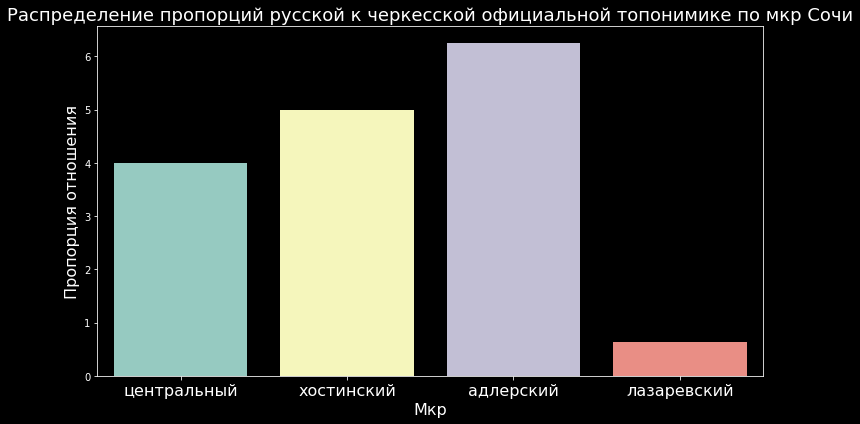

In [86]:
#построим график распределения русской официальной топонимики к черкесской по микрорайонам Большого Сочи
plt.figure(figsize=(12, 6))
sns.barplot(
    data=proportions_frame_sub_off,
)
plt.title(
    "Распределение пропорций русской к черкесской официальной топонимике по мкр Сочи", fontsize=18
)
plt.xlabel("Мкр", fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.ylabel("Пропорция отношения", fontsize=16)
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
**Русская топонимика по-прежнему значительно превалирует в большинстве микрорайонов, но пропорции чуть изменились в пользу Адлерского мкр.**

- Русская топонимика доминирует от 40 русских названий к 10 черкесским в Центральном мкр, до лидера Адлерского мкр с 63 русскими названиями к 10 черкесским;
- Черкесская топонимика в Лазаревском мкр зеркальна Адлерскому и сохранилась примерно на том же уровне, даже чуть подросла (63 черкесских названия к 10 русским).
    
</div>

## 5. Пропорциональное распределение убыхской и абазинской топонимики:

**Посчитаем отношение русской топонимики к убыхской и абазинской в мкр Большого Сочи, как самой большой и актуальной выборки данных.**

Начнём исследование с выборки по общей топонимике

In [87]:
#создадим срез данных с отношением русской к убыхской топонимике по Центральному микрорайону
proportion_russian = df_count_avg_sochi_center.query('index == "русский"')
proportion_ubykh = df_count_avg_sochi_center.query('index == "убыхский"')
proportion_sochi_сenter_ubykh_temp = (
    proportion_russian["origin"].sum() + proportion_russian["origin2"].sum()
) / (proportion_ubykh["origin"].sum() + proportion_ubykh["origin2"].sum())
proportion_sochi_сenter_ubykh = pd.DataFrame({"proportion_sochi_сenter_ubykh": [proportion_sochi_сenter_ubykh_temp]})

#создадим срез данных с отношением русской к убыхской топонимике по Хостинскому микрорайону
proportion_russian = df_count_avg_sochi_khosta.query('index == "русский"')
proportion_ubykh = df_count_avg_sochi_khosta.query('index == "убыхский"')
proportion_sochi_khosta_ubykh_temp = (
    proportion_russian["origin"].sum() + proportion_russian["origin2"].sum()
) / (proportion_ubykh["origin"].sum() + proportion_ubykh["origin2"].sum())
proportion_sochi_khosta_ubykh = pd.DataFrame({"proportion_sochi_khosta_ubykh": [proportion_sochi_khosta_ubykh_temp]})

#создадим срез данных с отношением русской к убыхской топонимике по Адлерскому микрорайону
proportion_russian = df_count_avg_sochi_adler.query('index == "русский"')
proportion_ubykh = df_count_avg_sochi_adler.query('index == "убыхский"')
proportion_sochi_adler_ubykh_temp = (
    proportion_russian["origin"].sum() + proportion_russian["origin2"].sum()
) / (proportion_ubykh["origin"].sum() + proportion_ubykh["origin2"].sum())
proportion_sochi_adler_ubykh = pd.DataFrame({"proportion_sochi_adler_ubykh": [proportion_sochi_adler_ubykh_temp]})

#создадим срез данных с отношением русской к убыхской топонимике по Лазаревскому микрорайону
proportion_russian = df_count_avg_sochi_lazarev.query('index == "русский"')
proportion_ubykh = df_count_avg_sochi_lazarev.query('index == "убыхский"')
proportion_sochi_lazarev_ubykh_temp = (
    proportion_russian["origin"].sum() + proportion_russian["origin2"].sum()
) / (proportion_ubykh["origin"].sum() + proportion_ubykh["origin2"].sum())
proportion_sochi_lazarev_ubykh = pd.DataFrame({"proportion_sochi_lazarev_ubykh": [proportion_sochi_lazarev_ubykh_temp]})
proportion_sochi_lazarev_ubykh

,proportion_sochi_lazarev_ubykh
0,3.428571


In [88]:
#создадим срезы данных с высчитанными пропорциями топонимики русского языка к убыхскому по микрорайонам Большого Сочи
proportions_ubykh = [
    proportion_sochi_сenter_ubykh,
    proportion_sochi_khosta_ubykh,
    proportion_sochi_adler_ubykh,
    proportion_sochi_lazarev_ubykh,
]
proportions_frame_ubykh = pd.concat(
    proportions_ubykh,
    join="outer",
    axis=1,
    keys=[
        "proportion_sochi_сenter_ubykh",
        "proportion_sochi_khosta_ubykh",
        "proportion_sochi_adler_ubykh",
        "proportion_sochi_lazarev_ubykh",
    ],
    names=["sub_territory", "indexes"],
)
proportions_frame_ubykh.columns = (
    "_".join(col).strip() for col in proportions_frame_ubykh.columns.values
)
proportions_frame_ubykh = proportions_frame_ubykh.rename(
    columns={
        "proportion_sochi_сenter_ubykh_proportion_sochi_сenter_ubykh": "центральный",
        "proportion_sochi_khosta_ubykh_proportion_sochi_khosta_ubykh": "хостинский",
        "proportion_sochi_adler_ubykh_proportion_sochi_adler_ubykh": "адлерский",
        "proportion_sochi_lazarev_ubykh_proportion_sochi_lazarev_ubykh": "лазаревский",
    }
)
proportions_frame_ubykh

,центральный,хостинский,адлерский,лазаревский
0,1.3,2.0,5.777778,3.428571


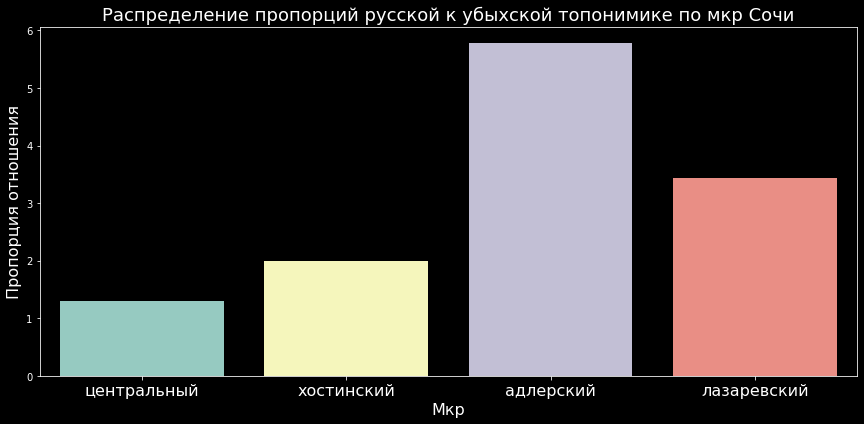

In [89]:
#построим график распределения русской топонимики к черкесской по микрорайонам Большого Сочи
plt.figure(figsize=(12, 6))
sns.barplot(
    data=proportions_frame_ubykh,
)
plt.title(
    "Распределение пропорций русской к убыхской топонимике по мкр Сочи", fontsize=18
)
plt.xlabel("Мкр", fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.ylabel("Пропорция отношения", fontsize=16)
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
**Русская топонимика доминирует в большинстве микрорайонов, но есть отличия.**

- Наиболее высокая доля доминирования русской топонимики над убыхской в Адлерском мкр (~60 русских названий на 10 убыхским);
- Наиболее презентативная доля убыхских топонимов в Центральном мкр (~13 русских названий к 10 убыхским);
- Более менее неплохо для убыхского языка представлен Хостинский мкр (2 к 1).
    
</div>

**Проведём такое же исследование с выборкой по официальной топонимике.**

In [90]:
#создадим срез данных с отношением русской к убыхской офицальной топонимике по Центральному микрорайону
proportion_russian = df_count_avg_sochi_center.query('index == "русский"')
proportion_ubykh = df_count_avg_sochi_center.query('index == "убыхский"')
proportion_sochi_сenter_ubykh_temp_off = proportion_russian["origin"].sum() / proportion_ubykh["origin"].sum()
proportion_sochi_сenter_ubykh_off = pd.DataFrame({"proportion_sochi_сenter_ubykh_off": [proportion_sochi_сenter_ubykh_temp_off]})

#создадим срез данных с отношением русской к убыхской офицальной топонимике по Хостинскому микрорайону
proportion_russian = df_count_avg_sochi_khosta.query('index == "русский"')
proportion_ubykh = df_count_avg_sochi_khosta.query('index == "убыхский"')
proportion_sochi_khosta_ubykh_temp_off = proportion_russian["origin"].sum() / proportion_ubykh["origin"].sum()
proportion_sochi_khosta_ubykh_off = pd.DataFrame({"proportion_sochi_khosta_ubykh_off": [proportion_sochi_khosta_ubykh_temp_off]})

#создадим срез данных с отношением русской к убыхской офицальной топонимике по Адлерскому микрорайону
proportion_russian = df_count_avg_sochi_adler.query('index == "русский"')
proportion_ubykh = df_count_avg_sochi_adler.query('index == "убыхский"')
proportion_sochi_adler_ubykh_temp_off = proportion_russian["origin"].sum() / proportion_ubykh["origin"].sum()
proportion_sochi_adler_ubykh_off = pd.DataFrame({"proportion_sochi_adler_ubykh_off": [proportion_sochi_adler_ubykh_temp_off]})

#создадим срез данных с отношением русской к убыхской офицальной топонимике по Лазаревскому микрорайону
proportion_russian = df_count_avg_sochi_lazarev.query('index == "русский"')
proportion_ubykh = df_count_avg_sochi_lazarev.query('index == "убыхский"')
proportion_sochi_lazarev_ubykh_temp_off = proportion_russian["origin"].sum() / proportion_ubykh["origin"].sum()
proportion_sochi_lazarev_ubykh_off = pd.DataFrame({"proportion_sochi_lazarev_ubykh_off": [proportion_sochi_lazarev_ubykh_temp_off]})
proportion_sochi_lazarev_ubykh_off

,proportion_sochi_lazarev_ubykh_off
0,4.461538


In [91]:
#создадим срезы данных с высчитанными пропорциями официальной топонимики русского языка к убыхскому по микрорайонам Большого Сочи
proportions_ubykh_off = [
    proportion_sochi_сenter_ubykh_off,
    proportion_sochi_khosta_ubykh_off,
    proportion_sochi_adler_ubykh_off,
    proportion_sochi_lazarev_ubykh_off,
]
proportions_frame_ubykh_off = pd.concat(
    proportions_ubykh_off,
    join="outer",
    axis=1,
    keys=[
        "proportion_sochi_сenter_ubykh_off",
        "proportion_sochi_khosta_ubykh_off",
        "proportion_sochi_adler_ubykh_off",
        "proportion_sochi_lazarev_ubykh_off",
    ],
    names=["sub_territory", "indexes"],
)
proportions_frame_ubykh_off.columns = (
    "_".join(col).strip() for col in proportions_frame_ubykh_off.columns.values
)
proportions_frame_ubykh_off = proportions_frame_ubykh_off.rename(
    columns={
        "proportion_sochi_сenter_ubykh_off_proportion_sochi_сenter_ubykh_off": "центральный",
        "proportion_sochi_khosta_ubykh_off_proportion_sochi_khosta_ubykh_off": "хостинский",
        "proportion_sochi_adler_ubykh_off_proportion_sochi_adler_ubykh_off": "адлерский",
        "proportion_sochi_lazarev_ubykh_off_proportion_sochi_lazarev_ubykh_off": "лазаревский",
    }
)
proportions_frame_ubykh_off

,центральный,хостинский,адлерский,лазаревский
0,2.0,3.75,12.5,4.461538


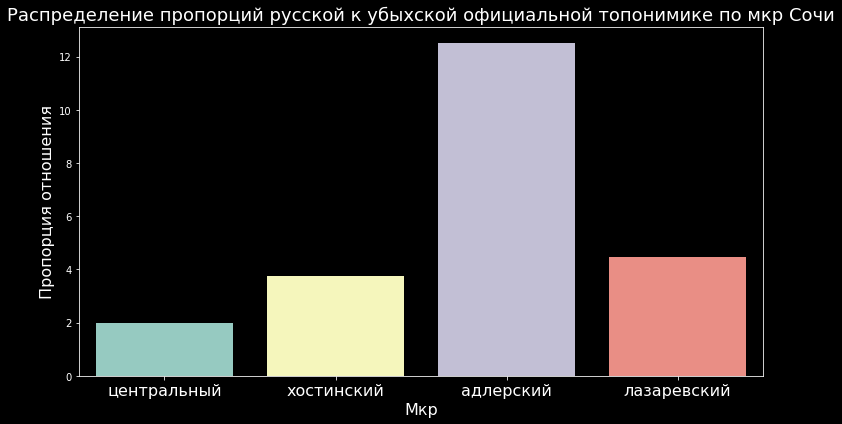

In [92]:
#построим график распределения русской официальной топонимики к черкесской по микрорайонам Большого Сочи
plt.figure(figsize=(12, 6))
sns.barplot(
    data=proportions_frame_ubykh_off,
)
plt.title(
    "Распределение пропорций русской к убыхской официальной топонимике по мкр Сочи", fontsize=18
)
plt.xlabel("Мкр", fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.ylabel("Пропорция отношения", fontsize=16)
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
**Русская топонимика доминирует в тех же пропорциях, но больше по выборке.**

- Огромная доля доминирования русской топонимики над убыхской также в Адлерском мкр (аж ~125 русских названий на 10 убыхских);
- Наиболее презентативная доля убыхских топонимов в Центральном мкр (~20 русских названий к 10 убыхским);
- Более менее неплохо для убыхского языка представлен Хостинский мкр (3,75 к 1).
    
</div>

**Таким же способом исследуем отношение русской топонимики к абазинской в мкр Большого Сочи.**

In [93]:
#создадим срез данных с отношением русской к абазинской топонимике по Центральному микрорайону
proportion_russian = df_count_avg_sochi_center.query('index == "русский"')
proportion_abazin = df_count_avg_sochi_center.query('index == "абазинский"')
proportion_sochi_сenter_abazin_temp = (
    proportion_russian["origin"].sum() + proportion_russian["origin2"].sum()
) / (proportion_abazin["origin"].sum() + proportion_abazin["origin2"].sum())
proportion_sochi_сenter_abazin = pd.DataFrame({"proportion_sochi_сenter_abazin": [proportion_sochi_сenter_abazin_temp]})

#создадим срез данных с отношением русской к абазинской топонимике по Хостинскому микрорайону
proportion_russian = df_count_avg_sochi_khosta.query('index == "русский"')
proportion_abazin = df_count_avg_sochi_khosta.query('index == "абазинский"')
proportion_sochi_khosta_abazin_temp = (
    proportion_russian["origin"].sum() + proportion_russian["origin2"].sum()
) / (proportion_abazin["origin"].sum() + proportion_abazin["origin2"].sum())
proportion_sochi_khosta_abazin = pd.DataFrame({"proportion_sochi_khosta_abazin": [proportion_sochi_khosta_abazin_temp]})

#создадим срез данных с отношением русской к абазинской топонимике по Адлерскому микрорайону
proportion_russian = df_count_avg_sochi_adler.query('index == "русский"')
proportion_abazin = df_count_avg_sochi_adler.query('index == "абазинский"')
proportion_sochi_adler_abazin_temp = (
    proportion_russian["origin"].sum() + proportion_russian["origin2"].sum()
) / (proportion_abazin["origin"].sum() + proportion_abazin["origin2"].sum())
proportion_sochi_adler_abazin = pd.DataFrame({"proportion_sochi_adler_abazin": [proportion_sochi_adler_abazin_temp]})

#создадим срез данных с отношением русской к абазинской топонимике по Лазаревскому микрорайону
proportion_russian = df_count_avg_sochi_lazarev.query('index == "русский"')
proportion_abazin = df_count_avg_sochi_lazarev.query('index == "абазинский"')
proportion_sochi_lazarev_abazin_temp = (
    proportion_russian["origin"].sum() + proportion_russian["origin2"].sum()
) / (proportion_abazin["origin"].sum() + proportion_abazin["origin2"].sum())
proportion_sochi_lazarev_abazin = pd.DataFrame({"proportion_sochi_lazarev_abazin": [proportion_sochi_lazarev_abazin_temp]})
proportion_sochi_lazarev_abazin

,proportion_sochi_lazarev_abazin
0,5.538462


In [94]:
#создадим срезы данных с высчитанными пропорциями топонимики русского языка к абазинскому по микрорайонам Большого Сочи
proportions_abazin = [
    proportion_sochi_сenter_abazin,
    proportion_sochi_khosta_abazin,
    proportion_sochi_adler_abazin,
    proportion_sochi_lazarev_abazin,
]
proportions_frame_abazin = pd.concat(
    proportions_abazin,
    join="outer",
    axis=1,
    keys=[
        "proportion_sochi_сenter_abazin",
        "proportion_sochi_khosta_abazin",
        "proportion_sochi_adler_abazin",
        "proportion_sochi_lazarev_abazin",
    ],
    names=["sub_territory", "indexes"],
)
proportions_frame_abazin.columns = (
    "_".join(col).strip() for col in proportions_frame_abazin.columns.values
)
proportions_frame_abazin = proportions_frame_abazin.rename(
    columns={
        "proportion_sochi_сenter_abazin_proportion_sochi_сenter_abazin": "центральный",
        "proportion_sochi_khosta_abazin_proportion_sochi_khosta_abazin": "хостинский",
        "proportion_sochi_adler_abazin_proportion_sochi_adler_abazin": "адлерский",
        "proportion_sochi_lazarev_abazin_proportion_sochi_lazarev_abazin": "лазаревский",
    }
)
proportions_frame_abazin

,центральный,хостинский,адлерский,лазаревский
0,3.25,5.0,1.368421,5.538462


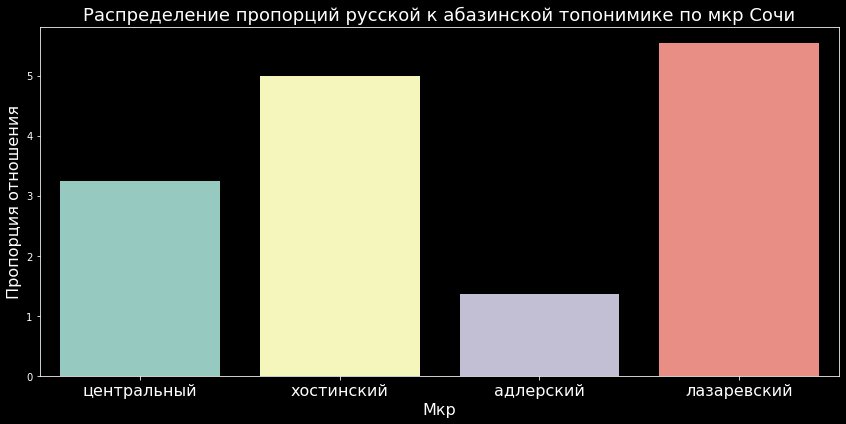

In [95]:
#построим график распределения русской топонимики к абазинской по микрорайонам Большого Сочи
plt.figure(figsize=(12, 6))
sns.barplot(
    data=proportions_frame_abazin,
)
plt.title(
    "Распределение пропорций русской к абазинской топонимике по мкр Сочи", fontsize=18
)
plt.xlabel("Мкр", fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.ylabel("Пропорция отношения", fontsize=16)
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
**Русская топонимика доминирует в большинстве районов, но есть нюансы.**

- Наиболее русская топонимика доминирует в Лазаревском и Хостинском районах (55 и 50 русских названий на 10 абазинских);
- Наиболее презентативная доля абазинских топонимов в Адлерском мкр (~14 русских названий к 10 абазинским).
    
</div>

**Исследуем официальную топонимику на соотношение пропорций с русской в мкр Большого Сочи.**

In [96]:
#создадим срез данных с отношением русской к абазинской официальной топонимике по Центральному микрорайону
proportion_russian = df_count_avg_sochi_center.query('index == "русский"')
proportion_abazin = df_count_avg_sochi_center.query('index == "абазинский"')
proportion_sochi_center_abazin_temp_off = proportion_russian["origin"].sum() / proportion_abazin["origin"].sum()
proportion_sochi_center_abazin_off = pd.DataFrame({"proportion_sochi_center_abazin_off": [proportion_sochi_center_abazin_temp_off]})

#создадим срез данных с отношением русской к абазинской официальной топонимике по Хостинскому микрорайону
proportion_russian = df_count_avg_sochi_khosta.query('index == "русский"')
proportion_abazin = df_count_avg_sochi_khosta.query('index == "абазинский"')
proportion_sochi_khosta_abazin_temp_off = proportion_russian["origin"].sum() / proportion_abazin["origin"].sum()
proportion_sochi_khosta_abazin_off = pd.DataFrame({"proportion_sochi_khosta_abazin_off": [proportion_sochi_khosta_abazin_temp_off]})

#создадим срез данных с отношением русской к абазинской официальной топонимике по Адлерскому микрорайону
proportion_russian = df_count_avg_sochi_adler.query('index == "русский"')
proportion_abazin = df_count_avg_sochi_adler.query('index == "абазинский"')
proportion_sochi_adler_abazin_temp_off = proportion_russian["origin"].sum() / proportion_abazin["origin"].sum()
proportion_sochi_adler_abazin_off = pd.DataFrame({"proportion_sochi_adler_abazin_off": [proportion_sochi_adler_abazin_temp_off]})

#создадим срез данных с отношением русской к абазинской официальной топонимике по Лазаревскому микрорайону
proportion_russian = df_count_avg_sochi_lazarev.query('index == "русский"')
proportion_abazin = df_count_avg_sochi_lazarev.query('index == "абазинский"')
proportion_sochi_lazarev_abazin_temp_off = proportion_russian["origin"].sum() / proportion_abazin["origin"].sum()
proportion_sochi_lazarev_abazin_off = pd.DataFrame({"proportion_sochi_lazarev_abazin_off": [proportion_sochi_lazarev_abazin_temp_off]})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


In [97]:
#создадим срезы данных с высчитанными пропорциями официальной топонимики русского языка к абазинскому по микрорайонам Большого Сочи
proportions_abazin_off = [
    proportion_sochi_center_abazin_off,
    proportion_sochi_khosta_abazin_off,
    proportion_sochi_adler_abazin_off,
    proportion_sochi_lazarev_abazin_off,
]
proportions_frame_abazin_off = pd.concat(
    proportions_abazin_off,
    join="outer",
    axis=1,
    keys=[
        "proportion_sochi_сenter_abazin_off",
        "proportion_sochi_khosta_abazin_off",
        "proportion_sochi_adler_abazin_off",
        "proportion_sochi_lazarev_abazin_off",
    ],
    names=["sub_territory", "indexes"],
)
proportions_frame_abazin_off.columns = (
    "_".join(col).strip() for col in proportions_frame_abazin_off.columns.values
)
proportions_frame_abazin_off = proportions_frame_abazin_off.rename(
    columns={
        "proportion_sochi_сenter_abazin_off_proportion_sochi_center_abazin_off": "центральный",
        "proportion_sochi_khosta_abazin_off_proportion_sochi_khosta_abazin_off": "хостинский",
        "proportion_sochi_adler_abazin_off_proportion_sochi_adler_abazin_off": "адлерский",
        "proportion_sochi_lazarev_abazin_off_proportion_sochi_lazarev_abazin_off": "лазаревский",
    }
)
proportions_frame_abazin_off

,центральный,хостинский,адлерский,лазаревский
0,inf,7.5,2.0,11.6


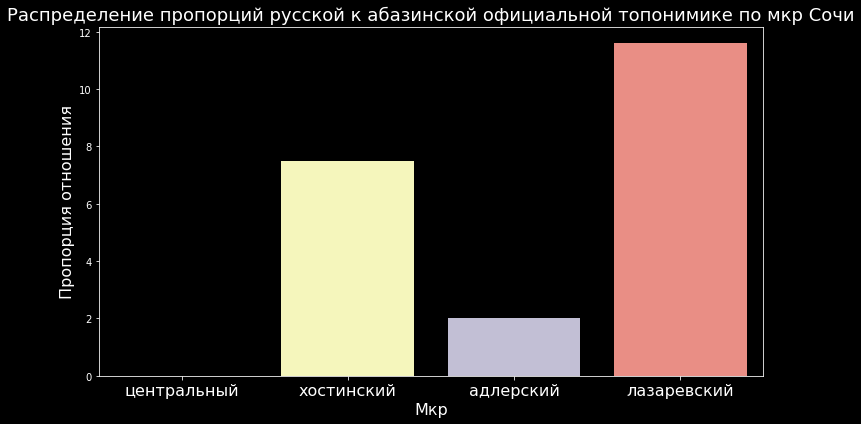

In [98]:
#построим график распределения русской топонимики к абазинской по микрорайонам Большого Сочи
plt.figure(figsize=(12, 6))
sns.barplot(
    data=proportions_frame_abazin_off,
)
plt.title(
    "Распределение пропорций русской к абазинской официальной топонимике по мкр Сочи", fontsize=18
)
plt.xlabel("Мкр", fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.ylabel("Пропорция отношения", fontsize=16)
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
**Русская топонимика доминирует в большинстве районов, но есть нюансы.**

- В Центральном мкр абазинской официальной абазинской топонимики в базе нет совсем;
- Также русская топонимика значительно доминирует в Лазаревском мкр (~116 русских названий к 10 абазинским);
- Наиболее презентативная доля абазинских топонимов в Адлерском мкр (2 к 1).
    
</div>

## 6. Пропорциональное распределение черкесской, убыхской и абазинской топонимики:

**Посчитаем отношение топонимики автохтонных языков топонимики друг к другу в мкр Большого Сочи, как самой большой и актуальной выборки данных.**

Исследуем данные по общей топонимике для соотношения черкесских и абазинских в мкр Большого Сочи.

In [99]:
#создадим срез данных с отношением черкесской к абазинской топонимике по Центральному микрорайону
proportion_circassian = df_count_avg_sochi_center.query('index == "черкесский"')
proportion_abazin = df_count_avg_sochi_center.query('index == "абазинский"')
proportion_sochi_сenter_abazin2_temp = (
    proportion_circassian["origin"].sum() + proportion_circassian["origin2"].sum()
) / (proportion_abazin["origin"].sum() + proportion_abazin["origin2"].sum())
proportion_sochi_сenter_abazin2 = pd.DataFrame({"proportion_sochi_сenter_abazin2": [proportion_sochi_сenter_abazin2_temp]})

#создадим срез данных с отношением черкесской к абазинской топонимике по Хостинскому микрорайону
proportion_circassian = df_count_avg_sochi_khosta.query('index == "черкесский"')
proportion_abazin = df_count_avg_sochi_khosta.query('index == "абазинский"')
proportion_sochi_khosta_abazin2_temp = (
    proportion_circassian["origin"].sum() + proportion_circassian["origin2"].sum()
) / (proportion_abazin["origin"].sum() + proportion_abazin["origin2"].sum())
proportion_sochi_khosta_abazin2 = pd.DataFrame({"proportion_sochi_khosta_abazin2": [proportion_sochi_khosta_abazin2_temp]})

#создадим срез данных с отношением черкесской к абазинской топонимике по Адлерскому микрорайону
proportion_circassian = df_count_avg_sochi_adler.query('index == "черкесский"')
proportion_abazin = df_count_avg_sochi_adler.query('index == "абазинский"')
proportion_sochi_adler_abazin2_temp = (
    proportion_circassian["origin"].sum() + proportion_circassian["origin2"].sum()
) / (proportion_abazin["origin"].sum() + proportion_abazin["origin2"].sum())
proportion_sochi_adler_abazin2 = pd.DataFrame({"proportion_sochi_adler_abazin2": [proportion_sochi_adler_abazin2_temp]})

#создадим срез данных с отношением черкесской к абазинской топонимике по Лазаревскому микрорайону
proportion_circassian = df_count_avg_sochi_lazarev.query('index == "черкесский"')
proportion_abazin = df_count_avg_sochi_lazarev.query('index == "абазинский"')
proportion_sochi_lazarev_abazin2_temp = (
    proportion_circassian["origin"].sum() + proportion_circassian["origin2"].sum()
) / (proportion_abazin["origin"].sum() + proportion_abazin["origin2"].sum())
proportion_sochi_lazarev_abazin2 = pd.DataFrame({"proportion_sochi_lazarev_abazin2": [proportion_sochi_lazarev_abazin2_temp]})
proportion_sochi_lazarev_abazin2

,proportion_sochi_lazarev_abazin2
0,8.923077


In [100]:
#создадим срезы данных с высчитанными пропорциями топонимики черкесского языка к абазинскому по микрорайонам Большого Сочи
proportions_abazin2 = [
    proportion_sochi_сenter_abazin2,
    proportion_sochi_khosta_abazin2,
    proportion_sochi_adler_abazin2,
    proportion_sochi_lazarev_abazin2,
]
proportions_frame_abazin2 = pd.concat(
    proportions_abazin2,
    join="outer",
    axis=1,
    keys=[
        "proportion_sochi_сenter_abazin2",
        "proportion_sochi_khosta_abazin2",
        "proportion_sochi_adler_abazin2",
        "proportion_sochi_lazarev_abazin2",
    ],
    names=["sub_territory", "indexes"],
)
proportions_frame_abazin2.columns = (
    "_".join(col).strip() for col in proportions_frame_abazin2.columns.values
)
proportions_frame_abazin2 = proportions_frame_abazin2.rename(
    columns={
        "proportion_sochi_сenter_abazin2_proportion_sochi_сenter_abazin2": "центральный",
        "proportion_sochi_khosta_abazin2_proportion_sochi_khosta_abazin2": "хостинский",
        "proportion_sochi_adler_abazin2_proportion_sochi_adler_abazin2": "адлерский",
        "proportion_sochi_lazarev_abazin2_proportion_sochi_lazarev_abazin2": "лазаревский",
    }
)
proportions_frame_abazin2

,центральный,хостинский,адлерский,лазаревский
0,1.0,1.833333,0.473684,8.923077


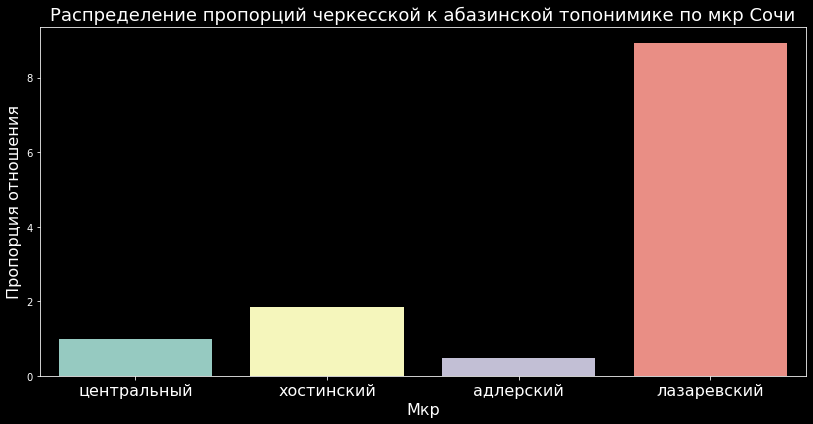

In [101]:
#построим график распределения черкесской топонимики к абазинской по микрорайонам Большого Сочи
plt.figure(figsize=(12, 6))
sns.barplot(
    data=proportions_frame_abazin2,
)
plt.title(
    "Распределение пропорций черкесской к абазинской топонимике по мкр Сочи",
    fontsize=18,
)
plt.xlabel("Мкр", fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.ylabel("Пропорция отношения", fontsize=16)
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
**Достаточно предсказуемое распределение с доминированием черкесской топонимики в Лазаревском мкр (~90 к 10)**

- Черкесская топонимика превалирует над абазинской везде, кроме Адлерского мкр (47 черкесских названий на 100 абазинских);
- Более менее черкесская топонимика представлена в Хостинском мкр (19 черкесских названий к 10 абазинским).
    
</div>

In [102]:
#создадим срез данных с отношением черкесской к абазинской официальной топонимике по Центральному микрорайону
proportion_circassian = df_count_avg_sochi_center.query('index == "черкесский"')
proportion_abazin = df_count_avg_sochi_center.query('index == "абазинский"')
proportion_sochi_сenter_abazin2_temp_off = proportion_circassian["origin"].sum() / proportion_abazin["origin"].sum()
proportion_sochi_сenter_abazin2_off = pd.DataFrame({"proportion_sochi_сenter_abazin2_off": [proportion_sochi_сenter_abazin2_temp_off]})

#создадим срез данных с отношением черкесской к абазинской официальной топонимике по Хостинскому микрорайону
proportion_circassian = df_count_avg_sochi_khosta.query('index == "черкесский"')
proportion_abazin = df_count_avg_sochi_khosta.query('index == "абазинский"')
proportion_sochi_khosta_abazin2_temp_off = proportion_circassian["origin"].sum() / proportion_abazin["origin"].sum()
proportion_sochi_khosta_abazin2_off = pd.DataFrame({"proportion_sochi_khosta_abazin2_off": [proportion_sochi_khosta_abazin2_temp_off]})

#создадим срез данных с отношением черкесской к абазинской официальной топонимике по Адлерскому микрорайону
proportion_circassian = df_count_avg_sochi_adler.query('index == "черкесский"')
proportion_abazin = df_count_avg_sochi_adler.query('index == "абазинский"')
proportion_sochi_adler_abazin2_temp_off = proportion_circassian["origin"].sum() / proportion_abazin["origin"].sum()
proportion_sochi_adler_abazin2_off = pd.DataFrame({"proportion_sochi_adler_abazin2_off": [proportion_sochi_adler_abazin2_temp_off]})

#создадим срез данных с отношением черкесской к абазинской официальной топонимике по Лазаревскому микрорайону
proportion_circassian = df_count_avg_sochi_lazarev.query('index == "черкесский"')
proportion_abazin = df_count_avg_sochi_lazarev.query('index == "абазинский"')
proportion_sochi_lazarev_abazin2_temp_off = proportion_circassian["origin"].sum() / proportion_abazin["origin"].sum()
proportion_sochi_lazarev_abazin2_off = pd.DataFrame({"proportion_sochi_lazarev_abazin2_off": [proportion_sochi_lazarev_abazin2_temp_off]})
proportion_sochi_lazarev_abazin2_off

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


,proportion_sochi_lazarev_abazin2_off
0,18.4


In [103]:
#создадим срезы данных с высчитанными пропорциями официальной топонимики черкесского языка к абазинскому по микрорайонам Большого Сочи
proportions_abazin2_off = [
    proportion_sochi_сenter_abazin2_off,
    proportion_sochi_khosta_abazin2_off,
    proportion_sochi_adler_abazin2_off,
    proportion_sochi_lazarev_abazin2_off,
]
proportions_frame_abazin2_off = pd.concat(
    proportions_abazin2_off,
    join="outer",
    axis=1,
    keys=[
        "proportion_sochi_сenter_abazin2_off",
        "proportion_sochi_khosta_abazin2_off",
        "proportion_sochi_adler_abazin2_off",
        "proportion_sochi_lazarev_abazin2_off",
    ],
    names=["sub_territory", "indexes"],
)
proportions_frame_abazin2_off.columns = (
    "_".join(col).strip() for col in proportions_frame_abazin2_off.columns.values
)
proportions_frame_abazin2_off = proportions_frame_abazin2_off.rename(
    columns={
        "proportion_sochi_сenter_abazin2_off_proportion_sochi_сenter_abazin2_off": "центральный",
        "proportion_sochi_khosta_abazin2_off_proportion_sochi_khosta_abazin2_off": "хостинский",
        "proportion_sochi_adler_abazin2_off_proportion_sochi_adler_abazin2_off": "адлерский",
        "proportion_sochi_lazarev_abazin2_off_proportion_sochi_lazarev_abazin2_off": "лазаревский",
    }
)
proportions_frame_abazin2_off

,центральный,хостинский,адлерский,лазаревский
0,inf,1.5,0.32,18.4


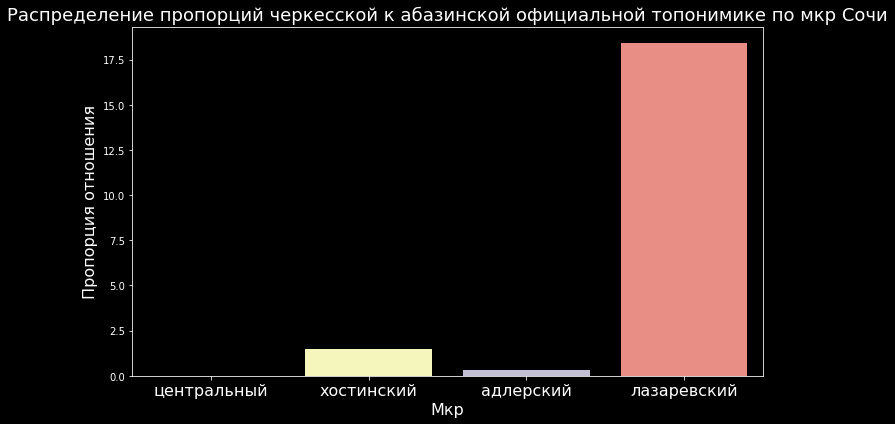

In [104]:
#построим график распределения черкесской официальной топонимики к абазинской по микрорайонам Большого Сочи
plt.figure(figsize=(12, 6))
sns.barplot(
    data=proportions_frame_abazin2_off,
)
plt.title(
    "Распределение пропорций черкесской к абазинской официальной топонимике по мкр Сочи",
    fontsize=18,
)
plt.xlabel("Мкр", fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.ylabel("Пропорция отношения", fontsize=16)
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
**Распределение стало ещё более выраженным. В Центральном мкр абазинских топонимов по базе данных нет**
- В Лазаревском мкр черкесская топонимика огромная (184 черкесских названий к 10 абазинским);
- Черкесская топонимика также превалирует над абазинской, кроме Адлерского мкр (32 черкесских названий на 100 абазинских);
- Также более менее черкесская топонимика представлена в Хостинском мкр (15 черкесских названий к 10 абазинским).
    
</div>

**Проведём такое же исследование для соотношения убыхских и абазинских топонимов Большого Сочи.**

In [105]:
#создадим срез данных с отношением убыхской к абазинской топонимике по Центральному микрорайону
proportion_ubykh = df_count_avg_sochi_center.query('index == "убыхский"')
proportion_abazin = df_count_avg_sochi_center.query('index == "абазинский"')
proportion_sochi_сenter_abazin3_temp = (
    proportion_ubykh["origin"].sum() + proportion_ubykh["origin2"].sum()
) / (proportion_abazin["origin"].sum() + proportion_abazin["origin2"].sum())
proportion_sochi_сenter_abazin3 = pd.DataFrame({"proportion_sochi_сenter_abazin3": [proportion_sochi_сenter_abazin3_temp]})

#создадим срез данных с отношением убыхской к абазинской топонимике по Хостинскому микрорайону
proportion_ubykh = df_count_avg_sochi_khosta.query('index == "убыхский"')
proportion_abazin = df_count_avg_sochi_khosta.query('index == "абазинский"')
proportion_sochi_khosta_abazin3_temp = (
    proportion_ubykh["origin"].sum() + proportion_ubykh["origin2"].sum()
) / (proportion_abazin["origin"].sum() + proportion_abazin["origin2"].sum())
proportion_sochi_khosta_abazin3 = pd.DataFrame({"proportion_sochi_khosta_abazin3": [proportion_sochi_khosta_abazin3_temp]})

#создадим срез данных с отношением убыхской к абазинской топонимике по Адлерскому микрорайону
proportion_ubykh = df_count_avg_sochi_adler.query('index == "убыхский"')
proportion_abazin = df_count_avg_sochi_adler.query('index == "абазинский"')
proportion_sochi_adler_abazin3_temp = (
    proportion_ubykh["origin"].sum() + proportion_ubykh["origin2"].sum()
) / (proportion_abazin["origin"].sum() + proportion_abazin["origin2"].sum())
proportion_sochi_adler_abazin3 = pd.DataFrame({"proportion_sochi_adler_abazin3": [proportion_sochi_adler_abazin3_temp]})

#создадим срез данных с отношением убыхской к абазинской топонимике по Лазаревскому микрорайону
proportion_ubykh = df_count_avg_sochi_lazarev.query('index == "убыхский"')
proportion_abazin = df_count_avg_sochi_lazarev.query('index == "абазинский"')
proportion_sochi_lazarev_abazin3_temp = (
    proportion_ubykh["origin"].sum() + proportion_ubykh["origin2"].sum()
) / (proportion_abazin["origin"].sum() + proportion_abazin["origin2"].sum())
proportion_sochi_lazarev_abazin3 = pd.DataFrame({"proportion_sochi_lazarev_abazin3": [proportion_sochi_lazarev_abazin3_temp]})
proportion_sochi_lazarev_abazin3

,proportion_sochi_lazarev_abazin3
0,1.615385


In [106]:
#создадим срезы данных с высчитанными пропорциями топонимики убыхского языка к абазинскому по микрорайонам Большого Сочи
proportions_abazin3 = [
    proportion_sochi_сenter_abazin3,
    proportion_sochi_khosta_abazin3,
    proportion_sochi_adler_abazin3,
    proportion_sochi_lazarev_abazin3,
]
proportions_frame_abazin3 = pd.concat(
    proportions_abazin3,
    join="outer",
    axis=1,
    keys=[
        "proportion_sochi_сenter_abazin3",
        "proportion_sochi_khosta_abazin3",
        "proportion_sochi_adler_abazin3",
        "proportion_sochi_lazarev_abazin3",
    ],
    names=["sub_territory", "indexes"],
)
proportions_frame_abazin3.columns = (
    "_".join(col).strip() for col in proportions_frame_abazin3.columns.values
)
proportions_frame_abazin3 = proportions_frame_abazin3.rename(
    columns={
        "proportion_sochi_сenter_abazin3_proportion_sochi_сenter_abazin3": "центральный",
        "proportion_sochi_khosta_abazin3_proportion_sochi_khosta_abazin3": "хостинский",
        "proportion_sochi_adler_abazin3_proportion_sochi_adler_abazin3": "адлерский",
        "proportion_sochi_lazarev_abazin3_proportion_sochi_lazarev_abazin3": "лазаревский",
    }
)
proportions_frame_abazin3

,центральный,хостинский,адлерский,лазаревский
0,2.5,2.5,0.236842,1.615385


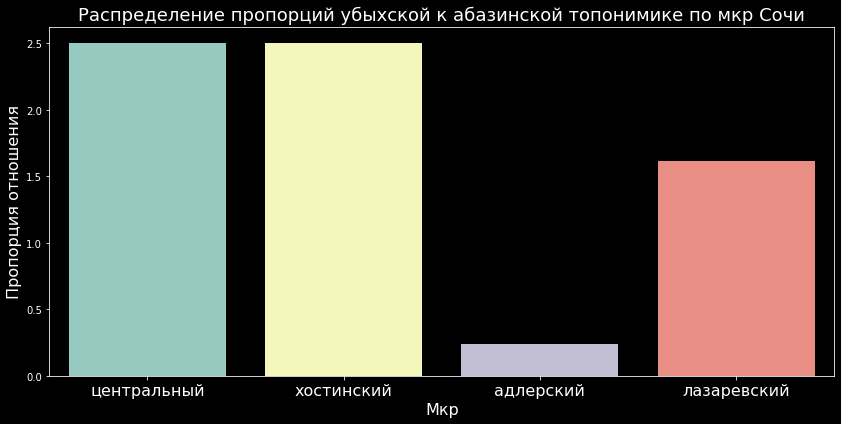

In [107]:
#построим график распределения убыхской топонимики к абазинской по микрорайонам Большого Сочи
plt.figure(figsize=(12, 6))
sns.barplot(
    data=proportions_frame_abazin3,
)
plt.title(
    "Распределение пропорций убыхской к абазинской топонимике по мкр Сочи", fontsize=18
)
plt.xlabel("Мкр", fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.ylabel("Пропорция отношения", fontsize=16)
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
**Более всего убыхская топонимика представлена в Центральном и Хостинском мкр (по 25 убыхских топонимов к 10 абазинским)**
- Неплохо представлены убыхские топонимы в Лазаревском мкр (16 к 10);
- В Адлерском мкр убыхские названия наоборот уступают абазинским (23 абазинских на 10 убыхских).
    
</div>

**Теперь исследуем то же распределение на базе только официальной топонимики**.

In [108]:
#создадим срез данных с отношением убыхской к абазинской официальной топонимике по Центральному микрорайону
proportion_ubykh = df_count_avg_sochi_center.query('index == "убыхский"')
proportion_abazin = df_count_avg_sochi_center.query('index == "абазинский"')
proportion_sochi_сenter_abazin3_temp_off = proportion_ubykh["origin"].sum() / proportion_abazin["origin"].sum()
proportion_sochi_сenter_abazin3_off = pd.DataFrame({"proportion_sochi_сenter_abazin3_off": [proportion_sochi_сenter_abazin3_temp_off]})

#создадим срез данных с отношением убыхской к абазинской официальной топонимике по Хостинскому микрорайону
proportion_ubykh = df_count_avg_sochi_khosta.query('index == "убыхский"')
proportion_abazin = df_count_avg_sochi_khosta.query('index == "абазинский"')
proportion_sochi_khosta_abazin3_temp_off = proportion_ubykh["origin"].sum() / proportion_abazin["origin"].sum()
proportion_sochi_khosta_abazin3_off = pd.DataFrame({"proportion_sochi_khosta_abazin3_off": [proportion_sochi_khosta_abazin3_temp_off]})

#создадим срез данных с отношением убыхской к абазинской официальной топонимике по Адлерскому микрорайону
proportion_ubykh = df_count_avg_sochi_adler.query('index == "убыхский"')
proportion_abazin = df_count_avg_sochi_adler.query('index == "абазинский"')
proportion_sochi_adler_abazin3_temp_off = proportion_ubykh["origin"].sum() / proportion_abazin["origin"].sum()
proportion_sochi_adler_abazin3_off = pd.DataFrame({"proportion_sochi_adler_abazin3_off": [proportion_sochi_adler_abazin3_temp_off]})

#создадим срез данных с отношением убыхской к абазинской официальной топонимике по Лазаревскому микрорайону
proportion_ubykh = df_count_avg_sochi_lazarev.query('index == "убыхский"')
proportion_abazin = df_count_avg_sochi_lazarev.query('index == "абазинский"')
proportion_sochi_lazarev_abazin3_temp_off = proportion_ubykh["origin"].sum() / proportion_abazin["origin"].sum()
proportion_sochi_lazarev_abazin3_off = pd.DataFrame({"proportion_sochi_lazarev_abazin3_off": [proportion_sochi_lazarev_abazin3_temp_off]})
proportion_sochi_lazarev_abazin3_off

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


,proportion_sochi_lazarev_abazin3_off
0,2.6


In [109]:
#создадим срезы данных с высчитанными пропорциями топонимики убыхского языка к абазинскому по микрорайонам Большого Сочи
proportions_abazin3_off = [
    proportion_sochi_сenter_abazin3_off,
    proportion_sochi_khosta_abazin3_off,
    proportion_sochi_adler_abazin3_off,
    proportion_sochi_lazarev_abazin3_off,
]
proportions_frame_abazin3_off = pd.concat(
    proportions_abazin3_off,
    join="outer",
    axis=1,
    keys=[
        "proportion_sochi_сenter_abazin3_off",
        "proportion_sochi_khosta_abazin3_off",
        "proportion_sochi_adler_abazin3_off",
        "proportion_sochi_lazarev_abazin3_off",
    ],
    names=["sub_territory", "indexes"],
)
proportions_frame_abazin3_off.columns = (
    "_".join(col).strip() for col in proportions_frame_abazin3_off.columns.values
)
proportions_frame_abazin3_off = proportions_frame_abazin3_off.rename(
    columns={
        "proportion_sochi_сenter_abazin3_off_proportion_sochi_сenter_abazin3_off": "центральный",
        "proportion_sochi_khosta_abazin3_off_proportion_sochi_khosta_abazin3_off": "хостинский",
        "proportion_sochi_adler_abazin3_off_proportion_sochi_adler_abazin3_off": "адлерский",
        "proportion_sochi_lazarev_abazin3_off_proportion_sochi_lazarev_abazin3_off": "лазаревский",
    }
)
proportions_frame_abazin3_off

,центральный,хостинский,адлерский,лазаревский
0,inf,2.0,0.16,2.6


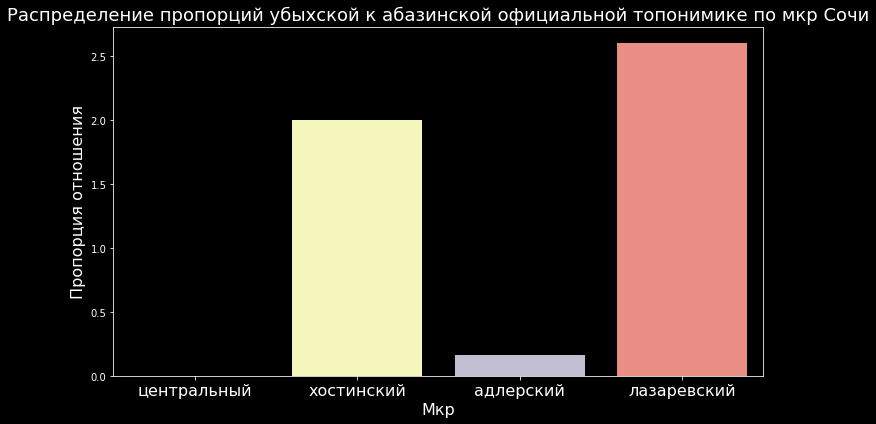

In [110]:
#построим график распределения убыхской официальной топонимики к абазинской по микрорайонам Большого Сочи
plt.figure(figsize=(12, 6))
sns.barplot(
    data=proportions_frame_abazin3_off,
)
plt.title(
    "Распределение пропорций убыхской к абазинской официальной топонимике по мкр Сочи", fontsize=18
)
plt.xlabel("Мкр", fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.ylabel("Пропорция отношения", fontsize=16)
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
**Ситуация с официальной топонимикой отличается от общей базы данных.**
- Более всего убыхская официальная топонимика представлена в Лазаревском мкр (26 убыхских топонимов к 10 абазинским) и Хостинском (2 к 1);
- В Центральном районе абазинские топонимы по базе данных не встречаются;
- В Адлерском мкр убыхские названия по-прежнему уступают абазинским (1,6 убыхских на 10 абазинских).
    
</div>

## 7. Пропорциональное распределение топонимики в приграничных районах Абхазии:

**Посчитаем отношение русской и черкесской топонимики к абхазской в приграничных районах Абхазии**

Исследуем данные по топонимике для соотношения русских и абхазских топонимов.

In [111]:
#создадим срез данных с отношением русской к абхазской топонимике по приграничным районам Абхазии
proportion_russian = df_count_avg_abkhaz.query('index == "русский"')
proportion_abkhaz = df_count_avg_abkhaz.query('index == "абхазский"')
proportion_abkhaz_temp = (
    proportion_russian["origin"].sum() + proportion_russian["origin2"].sum()
) / (proportion_abkhaz["origin"].sum() + proportion_abkhaz["origin2"].sum())
proportion_abkhaz = pd.DataFrame({"proportion_abkhaz": [proportion_abkhaz_temp]})
proportion_abkhaz

,proportion_abkhaz
0,0.1875


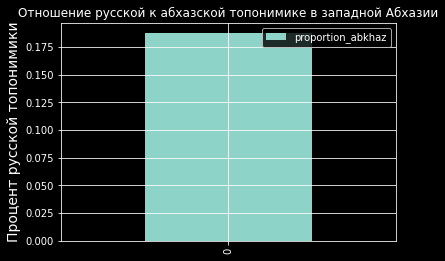

In [112]:
#построим график распределения русской к абхазской топонимике по приграничным районам Абхазии
proportion_abkhaz.plot.bar(grid=True, figsize=(6, 4))
plt.title("Отношение русской к абхазской топонимике в западной Абхазии")
plt.ylabel("Процент русской топонимики", fontsize=14)
plt.show()

In [113]:
#создадим срез данных с отношением русской к абхазской официальной топонимике по приграничным районам Абхазии
proportion_russian = df_count_avg_abkhaz.query('index == "русский"')
proportion_abkhaz = df_count_avg_abkhaz.query('index == "абхазский"')
proportion_abkhaz_temp_off = proportion_russian["origin"].sum() / proportion_abkhaz["origin"].sum()
proportion_abkhaz_off = pd.DataFrame({"proportion_abkhaz_off": [proportion_abkhaz_temp_off]})
proportion_abkhaz_off

,proportion_abkhaz_off
0,0.136364


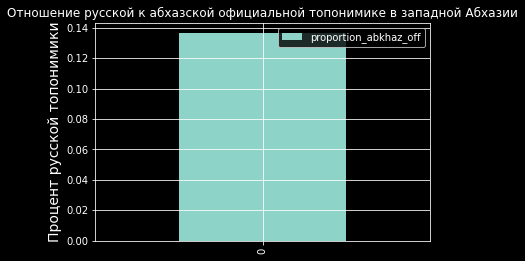

In [114]:
#построим график распределения русской к абхазской официальной топонимике по приграничным районам Абхазии
proportion_abkhaz_off.plot.bar(grid=True, figsize=(6, 4))
plt.title("Отношение русской к абхазской официальной топонимике в западной Абхазии")
plt.ylabel("Процент русской топонимики", fontsize=14)
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
**Русская топонимика значительно уступает абхазской в приграничных районах Абхазии**
- В среднем соотношение ~19 русских названий к 100 абхазским, а в официальном списке ещё меньше ~14 к 100.
    
</div>

Исследуем данные по топонимике для соотношения черкесских и абхазских топонимов.

In [115]:
#создадим срез данных с отношением черкесской к абхазской топонимике по приграничным районам Абхазии
proportion_circassian = df_count_avg_abkhaz.query('index == "черкесский"')
proportion_abkhaz = df_count_avg_abkhaz.query('index == "абхазский"')
proportion_abkhaz2_temp = (
    proportion_circassian["origin"].sum() + proportion_circassian["origin2"].sum()
) / (proportion_abkhaz["origin"].sum() + proportion_abkhaz["origin2"].sum())
proportion_abkhaz2 = pd.DataFrame({"proportion_abkhaz2": [proportion_abkhaz2_temp]})
proportion_abkhaz2

,proportion_abkhaz2
0,0.34375


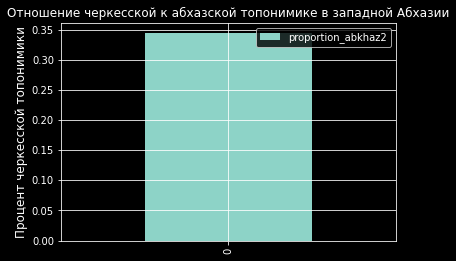

In [116]:
#построим график распределения черкесской к абхазской топонимике по приграничным районам Абхазии
proportion_abkhaz2.plot.bar(grid=True, figsize=(6, 4))
plt.title("Отношение черкесской к абхазской топонимике в западной Абхазии")
plt.ylabel("Процент черкесской топонимики", fontsize=12)
plt.show()

In [117]:
#создадим срез данных с отношением черкесской к абхазской официальной топонимике по приграничным районам Абхазии
proportion_circassian = df_count_avg_abkhaz.query('index == "черкесский"')
proportion_abkhaz = df_count_avg_abkhaz.query('index == "абхазский"')
proportion_abkhaz2_temp_off = proportion_circassian["origin"].sum() / proportion_abkhaz["origin"].sum()
proportion_abkhaz2_off = pd.DataFrame({"proportion_abkhaz2_off": [proportion_abkhaz2_temp_off]})
proportion_abkhaz2_off

,proportion_abkhaz2_off
0,0.318182


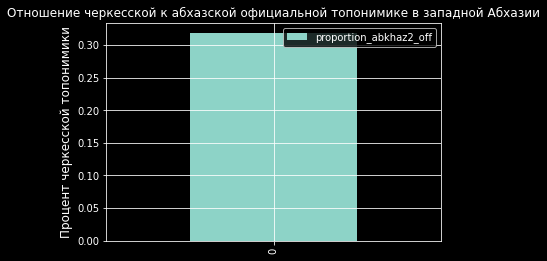

In [118]:
#построим график распределения черкесской к абхазской официальной топонимике по приграничным районам Абхазии
proportion_abkhaz2_off.plot.bar(grid=True, figsize=(6, 4))
plt.title("Отношение черкесской к абхазской официальной топонимике в западной Абхазии")
plt.ylabel("Процент черкесской топонимики", fontsize=12)
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
**Черкесская топонимика уступает абхазской в приграничных районах Абхазии, но не столь сильно, как русская**
- В среднем соотношение ~34 черкесских названий к 100 абхазским, в официальном списке примерно также ~32 к 100.
    
</div>

## 8. Общие выводы:

**Предварительная картина исследования:**

1. Общее распределение топонимики: \
    1.1. Чаще всего встречается черкесская и русская топонимика. Убыхской, абазинской и абхазской примерно поровну, но более чем в 3 раза меньше; \
    1.2. Черкесская топонимика превалирует в названиях. Русской тоже много, но у неё значительно меньше дополнительных версий названий; \
    1.3. В дополнительных версиях пропорция сохраняется только у абазинской и убыхской частей. Абхазская, наравне с русской и тюркской появляется в народных версиях названий значительно меньше; \
    1.4. По количеству представленных языков лидеры Сочи, Туапсе и Абхазия; \
    1.5. В Туапсинском районе лидер топонимики - черкесские названия - 54 из 75. В дополнительных значениях в лидерах тюркские названия - 7 из 21. Такая же ситуация в Анапском районе (9 из 13 черкесские и 3 из 8 тюркские) и Новороссийском районе (7 из 11 черкесские и 2 из 4 тюркские), где местная топонимика оказалась весьма устойчива к переменам; \
    1.6.По Геленджикому району лидер топонимики черкесские названия - 26 из 44.
2. Пропорции распределения топонимики по природному и жилому происхождению: \
    2.1. Черкесская топонимика доминирует среди природных топонимов Черноморского побережья; \
    2.2. Абазинская, убыхская и тюркская природная топонимика также в среднем чуть более представлена, чем русская; \
    2.3. В Абхазии лидирует абхазская топонимика с вкраплением грузинской и русской жилой топонимики; \
    2.4. Абахзские и абазинские природные топонимы часты в Адлерском мкр Сочи, черкесские в Лазаревском мкр, в других лидирует русская топонимика, а автохтонная дополнительного характера, убыхская и черкесская; \
    2.5. Выбивающаяся на общих графиках района черкесская природная топонимика по Большому Сочи лидирует за счёт Лазаревского микрорайона, где в целом выборка топонимики намного более представительная; \
    2.6. В Туапсе жилая топонимика черкесская, а в Анапе в равной степени русская и черкесская, но вторая выигрывает за счёт дополнительных названий. Тут также виден след армянских переселенцев; \
    2.7. Жилая топонимика Черноморского побережья Краснодарского края в подавляющем большинстве русская; \
    2.8. Жилая топонимка на автохтонных языках представлена болье в форме дополнительных, народных, названий; \
    2.9. В Большом Сочи по мкр лидирует русская жилая топонимика, в Лазаревском чуть больше черкесской.
3. Пропорции распределения русской топонимики к черкесской на Черноморском побережье: \
    3.1. Наиболее сильные позиции у русской топонимики в Большом Сочи, примерно 11\14 к 10 черкесским; \
    3.2. В других районах Черноморского побережья русская топонимика уступает черкесской, местами значительно (Туапсе, Новороссийск), в Абхазии на 1 русское название приходится 2 черкесских.
4. Пропорции русской к убыхской и абазинской топонимике в Большом Сочи: \
    4.1. Русская топонимика доминирует по всем выборкам во всех районах; \
    4.2. Убыхская топонимика более менее выражена в Центральном мкр (около 13\20 русских топонимов к 10 убыхским); \
    4.3. Вытеснение убыхской топонимики возрастает по районам Хостинский-Лазаревский, Адлерский. В последнем на 125 русских топонимов всего 10 убыхских; \
    4.4. Убыхская топонимика сохраняется в основном в старом убыхском ядре Центрального мкр и частью в горах Хостинского мкр; \
    4.5. Ситуация с абазинской топонимикой зеркальная. В Адлерском районе на 15\20 русских топонимов 10 абазинских, в Лазаревском доминирует русская топонимика с 116 топонимов к 10 абазинским. Хостинский район пограничный, но абазинскя топонимика здесь в более слабой позиции, чем черкесская; \
    4.6. Из трёх автохтонных языков на побережье самые лучшие позиции у черкесской топонимики, далее с отрывом и при доминировании русских названий абазинский язык, самые худшие позиции у убыхской топонимики, как исчезнувшей языковой группы.
5. Пропорции черкесской, убыхской и абазинской топонимики в Большом Сочи: \
    5.1. Абазинские топонимы в Центральном мкр не представлены в базе или их минимум; \
    5.2 Черкесская топонимика сильно больше абазинской в Лазаревском мкр (от 9 до 18 черкесских топонимов к 1); \
    5.3. В Адлерском мкр наоборот соотношение черкесской топонимики 1 к 3 в пользу абазинской, а убыхской еще меньше - 1 к 5 в пользу абазинской (или даже меньше); \
    5.4. В Хостинском мкр ощущается пограничье черкесских и абазинских топонимов, черкесские немного преобладают; \
    5.5. Самые убыхские районы по отношению к абазинским топонимам - Лазаревский и Хостинский (2,5 и 2 к 1); \
    5.6. Адлерский район предсказуемо более абазинский (старое абазинское этническое ядро), Лазаревский более черкесско-убыхский (что также связано с историческими особенностями). Хостинский более убыхский и пограничный для черкесско-абазинских топонимов.
6. По приграничным районам Абхазии: \ 
    6.1. Русская топонимика представлена совсем слабо, примерно 1,5 названий на 10 абхазских топонимов; \
    6.2. Черкесская топонимика примерно на треть меньше доминирующей абхазской; \
    6.3. Абхазская топонимика доминирует над остальными.

**ВЫВОДЫ:**

**Выборка наиболее релевантна для районов Большого Сочи и Туапсе. По другим требуется накопление большего количества данных;**
- Топонимы на языках коренных народов сохраняют географическую привязку к местам максимального жизненного ареала этих народов в прошлом и сохранены в этих районах в большем количестве;
- Основная топонимика - черкесская и русская. Убыхской, абазинской и абхазской примерно поровну, но сильно меньше;
- Черкесская топонимика доминиурет в официальной части. Русской тоже много, но у неё значительно меньше дополнительных народных версий;
- Народная топонимика в основном абазинская и убыхская. Абхазская, наравне с русской и тюркской появляется здесь значительно меньше, что говорит о доминировании официальных государственных языков в официальной части;
- По количеству представленных языков лидеры Сочи, Туапсе и Абхазия - зону максимальной колонизации в прошлом и миграций сегодня;
- В Анапе и Геленджике топонимика устойчива. Здесь более консервативное отношение к переименованиям;
- От Туапсе до Анапы сохраняются народные, а иногда официальные тюркские названия - след турецкого прошлого региона;
- По отношению к доминирующей русской топонимике, сохраняют позиции черкесская и абхазская за счёт отдельных районов. Русская топонимика сильна в Большом Сочи (кроме Лазаревского района), в других районах она уступает черкесской. В Абхазии доминирует абхазская топонимика;
- Убыхская топонимика, как представитель исчезнувшего языка и культуры, представлена слабо, сохраняясь наиболее в бывшем ядре - Центральном мкр Сочи;
- Абазинская топонимка, как и убыхская, но представлена сильнее и больше в своем бывшем ядре - Адлерском мкр Сочи;
- Природная топонимика в основном автохтонная, но внутри Большого Сочи это правило касается только Лазаревского и Адлерского мкр. Центральный Сочи с урбанизацией и миграциями сильнее вытеснил автохтонные языки русской топонимикой;
- Жилая топонимика явно связана с миграционными процессами и урбанизацией. Она преимущественно русская, в Абхазии абхазская, а остальная сохраняется в дополнительных именах, данных местам проживания местным коренным населением (пример Головинка=Шахапэ). Выделяются Туапсе и Анапа, где черкесский след в жилой топонимике сильно представлен, что говорит о влиянии на топонимику черкесских жителей;
- Корелляция между официальными и дополнительными названиями случайна.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
**ВОПРОСЫ ОСТАВШИЕСЯ ОТКРЫТЫМИ:**\
**- Как построить карту Черноморского побережья с выделением районов и прикруткой графиков barplot по общему распределению топонимики к ним?**
    
</div>